<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2501-2550.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [414]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [415]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


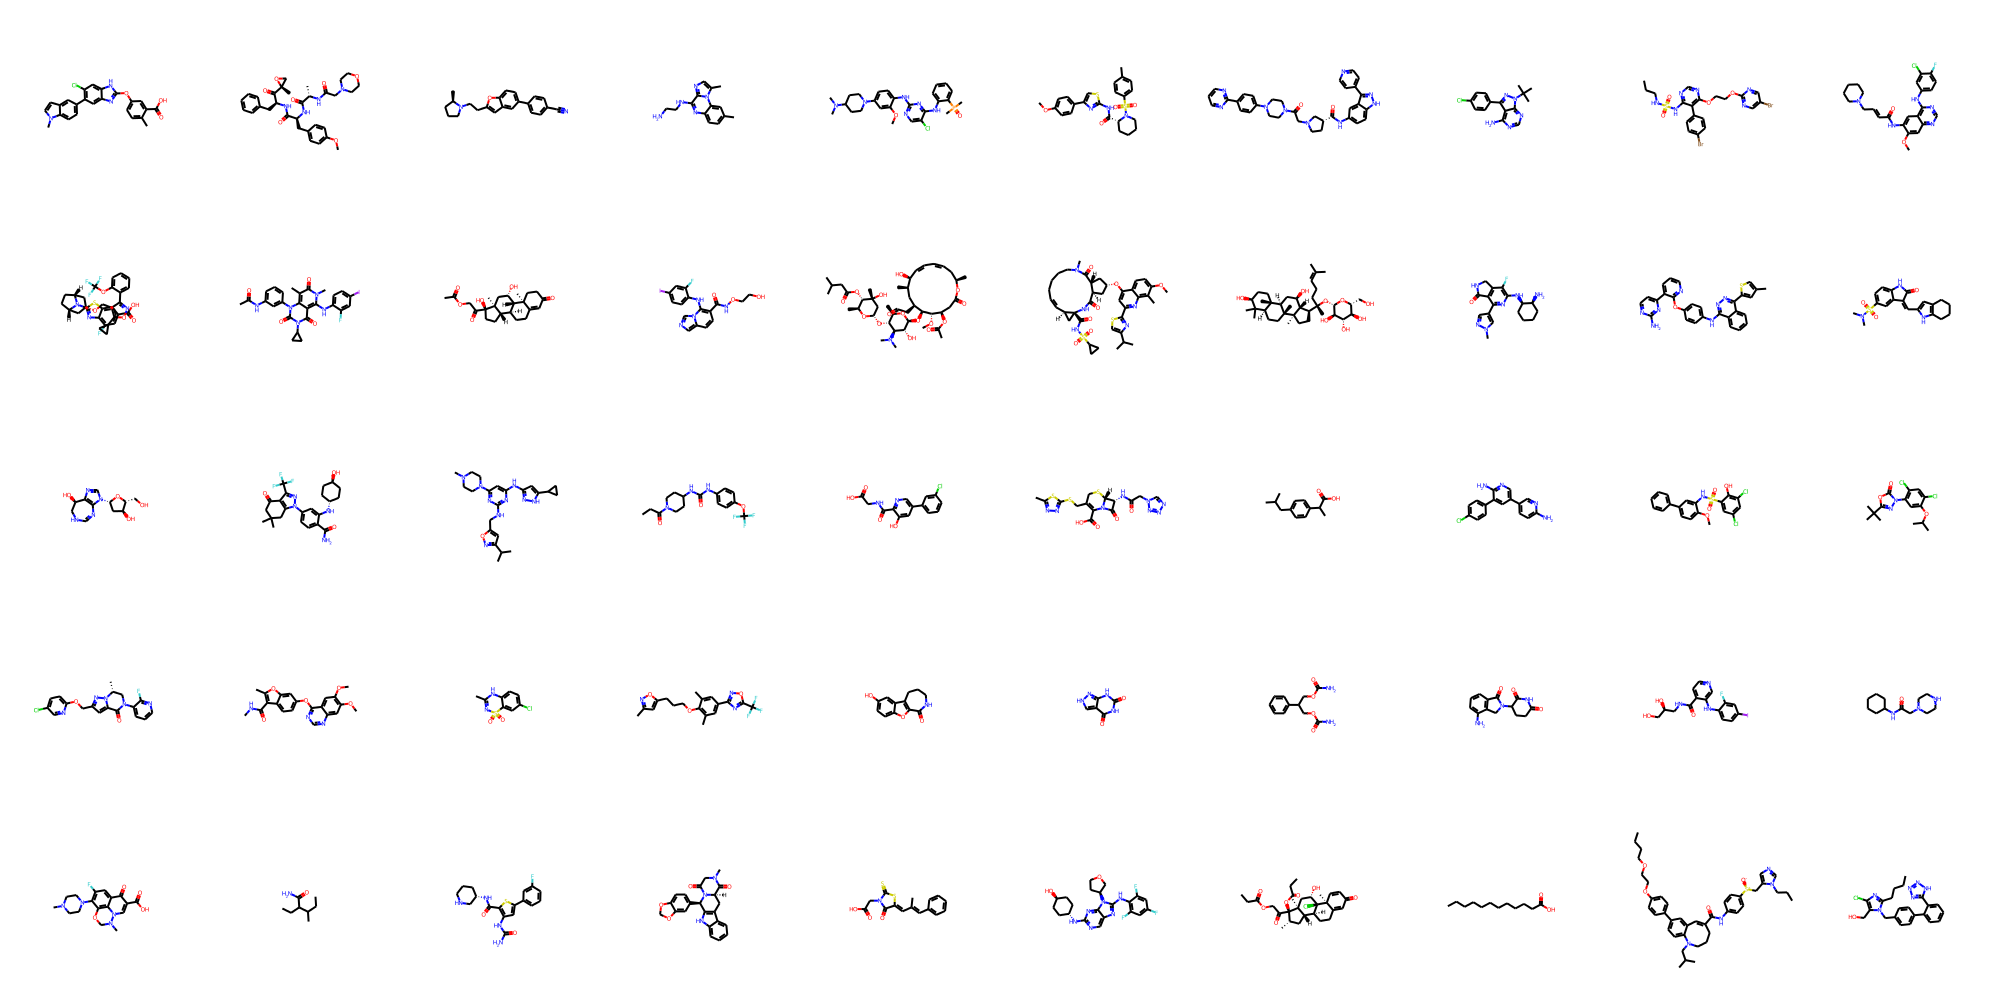

In [416]:
smiles_list = [

'Cc1ccc(Oc2nc3cc(-c4ccc5c(ccn5C)c4)c(Cl)cc3[nH]2)cc1C(=O)O',
'COc1ccc(C[C@H](NC(=O)[C@H](C)NC(=O)CN2CCOCC2)C(=O)N[C@@H](Cc2ccccc2)C(=O)[C@@]2(C)CO2)cc1',
'C[C@@H]1CCCN1CCc1cc2cc(-c3ccc(C#N)cc3)ccc2o1',
'Cc1ccc2nc(NCCN)c3ncc(C)n3c2c1',
'COc1cc(N2CCC(N(C)C)CC2)ccc1Nc1ncc(Cl)c(Nc2ccccc2P(C)(C)=O)n1',
'COc1ccc(-c2csc(NC(=O)[C@H]3CCCCN3S(=O)(=O)c3ccc(C)cc3)n2)cc1',
'O=C(Nc1ccc2[nH]nc(-c3ccncc3)c2c1)[C@@H]1CCN(CC(=O)N2CCN(c3ccc(-c4ncccn4)cc3)CC2)C1',
'CC(C)(C)n1nc(-c2ccc(Cl)cc2)c2c(N)ncnc21',
'CCCNS(=O)(=O)Nc1ncnc(OCCOc2ncc(Br)cn2)c1-c1ccc(Br)cc1',
'COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCCCC1',
'O=C(O)c1cc(F)c2nc(N3[C@H]4CC[C@@H]3C[C@H](OCc3c(-c5ccccc5OC(F)(F)F)noc3C3CC3)C4)sc2c1',
'CC(=O)Nc1cccc(-n2c(=O)n(C3CC3)c(=O)c3c(Nc4ccc(I)cc4F)n(C)c(=O)c(C)c32)c1',
'CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3[C@@H](O)C[C@@]21C',
'O=C(NOCCO)c1ccc2cncn2c1Nc1ccc(I)cc1F',
'CO[C@@H]1[C@@H](O[C@@H]2O[C@H](C)[C@@H](O[C@H]3C[C@@](C)(O)[C@@H](OC(=O)CC(C)C)[C@H](C)O3)[C@H](N(C)C)[C@H]2O)[C@@H](CC=O)C[C@@H](C)[C@@H](O)/C=C/C=C/C[C@@H](C)OC(=O)C[C@H]1OC(C)=O',
'COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)NS(=O)(=O)C6CC6)C[C@H]5/C=C\CCCCN(C)C(=O)[C@@H]4C3)cc(-c3nc(C(C)C)cs3)nc2c1C',
'CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O)[C@H]1CC[C@]2(C)[C@@H]1[C@H](O)C[C@@H]1[C@@]3(C)CC[C@H](O)C(C)(C)[C@@H]3CC[C@]12C',
'Cn1cc(-c2nc(N[C@@H]3CCCC[C@@H]3N)c(F)c3c2C(=O)NC3)cn1',
'Cc1csc(-c2nnc(Nc3ccc(Oc4ncccc4-c4ccnc(N)n4)cc3)c3ccccc23)c1',
'CN(C)S(=O)(=O)c1ccc2c(c1)/C(=C/c1cc3c([nH]1)CCCC3)C(=O)N2',
'OC[C@H]1O[C@@H](n2cnc3c2N=CNC[C@H]3O)C[C@@H]1O',
'CC1(C)CC(=O)c2c(C(F)(F)F)nn(-c3ccc(C(N)=O)c(N[C@H]4CC[C@H](O)CC4)c3)c2C1',
'CC(C)c1cc(CNc2nc(Nc3cc(C4CC4)[nH]n3)cc(N3CCN(C)CC3)n2)on1',
'CCC(=O)N1CCC(NC(=O)Nc2ccc(OC(F)(F)F)cc2)CC1',
'O=C(O)CNC(=O)c1ncc(-c2cccc(Cl)c2)cc1O',
'Cc1nnc(SCC2=C(C(=O)O)N3C(=O)[C@@H](NC(=O)Cn4cnnn4)[C@H]3SC2)s1',
'CC(C)Cc1ccc(C(C)C(=O)O)cc1',
'Nc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cn1',
'COc1ccc(-c2ccccc2)cc1NS(=O)(=O)c1cc(Cl)cc(Cl)c1O',
'CC(C)Oc1cc(-n2nc(C(C)(C)C)oc2=O)c(Cl)cc1Cl',
'C[C@@H]1CN(c2cccnc2F)C(=O)c2cc(COc3ccc(Cl)cn3)nn21',
'CNC(=O)c1c(C)oc2cc(Oc3ncnc4cc(OC)c(OC)cc34)ccc12',
'CC1=NS(=O)(=O)c2cc(Cl)ccc2N1',
'Cc1cc(CCCOc2c(C)cc(-c3noc(C(F)(F)F)n3)cc2C)on1',
'O=C1NCCCc2c1oc1ccc(O)cc21',
'O=c1[nH]c(=O)c2c[nH]nc2[nH]1',
'NC(=O)OCC(COC(N)=O)c1ccccc1',
'Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O',
'O=C(NC[C@H](O)CO)c1ccncc1Nc1ccc(I)cc1F',
'O=C(CN1CCNCC1)NC1CCCCC1',
'CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn4c3c2OCN4C)CC1',
'CCC(C)C(CC)C(N)=O',
'NC(=O)Nc1cc(-c2cccc(F)c2)sc1C(=O)N[C@H]1CCCNC1',
'CN1CC(=O)N2[C@H](Cc3c([nH]c4ccccc34)[C@H]2c2ccc3c(c2)OCO3)C1=O',
'CC(/C=C1\SC(=S)N(CC(=O)O)C1=O)=C\c1ccccc1',
'O[C@H]1CC[C@H](Nc2ncc3nc(Nc4c(F)cc(F)cc4F)n([C@H]4CCOC4)c3n2)CC1',
'CCC(=O)OCC(=O)[C@@]1(OC(=O)CC)[C@@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(Cl)[C@@H](O)C[C@@]21C',
'CCCCCCCCCCCC(=O)O',
'CCCCOCCOc1ccc(-c2ccc3c(c2)/C=C(/C(=O)Nc2ccc([S@@+]([O-])Cc4cncn4CCC)cc2)CCCN3CC(C)C)cc1',
'CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1',
'Cc1ccc(Oc2nc3cc(-c4ccc5c(ccn5C)c4)c(Cl)cc3[nH]2)cc1C(=O)O',
'COc1ccc(C[C@H](NC(=O)[C@H](C)NC(=O)CN2CCOCC2)C(=O)N[C@@H](Cc2ccccc2)C(=O)[C@@]2(C)CO2)cc1',
'C[C@@H]1CCCN1CCc1cc2cc(-c3ccc(C#N)cc3)ccc2o1',
'Cc1ccc2nc(NCCN)c3ncc(C)n3c2c1',
'COc1cc(N2CCC(N(C)C)CC2)ccc1Nc1ncc(Cl)c(Nc2ccccc2P(C)(C)=O)n1',
'COc1ccc(-c2csc(NC(=O)[C@H]3CCCCN3S(=O)(=O)c3ccc(C)cc3)n2)cc1',
'O=C(Nc1ccc2[nH]nc(-c3ccncc3)c2c1)[C@@H]1CCN(CC(=O)N2CCN(c3ccc(-c4ncccn4)cc3)CC2)C1',
'CC(C)(C)n1nc(-c2ccc(Cl)cc2)c2c(N)ncnc21',
'CCCNS(=O)(=O)Nc1ncnc(OCCOc2ncc(Br)cn2)c1-c1ccc(Br)cc1',
'COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCCCC1',
'O=C(O)c1cc(F)c2nc(N3[C@H]4CC[C@@H]3C[C@H](OCc3c(-c5ccccc5OC(F)(F)F)noc3C3CC3)C4)sc2c1',
'CC(=O)Nc1cccc(-n2c(=O)n(C3CC3)c(=O)c3c(Nc4ccc(I)cc4F)n(C)c(=O)c(C)c32)c1',
'CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3[C@@H](O)C[C@@]21C',
'O=C(NOCCO)c1ccc2cncn2c1Nc1ccc(I)cc1F',
'CO[C@@H]1[C@@H](O[C@@H]2O[C@H](C)[C@@H](O[C@H]3C[C@@](C)(O)[C@@H](OC(=O)CC(C)C)[C@H](C)O3)[C@H](N(C)C)[C@H]2O)[C@@H](CC=O)C[C@@H](C)[C@@H](O)/C=C/C=C/C[C@@H](C)OC(=O)C[C@H]1OC(C)=O',
'COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)NS(=O)(=O)C6CC6)C[C@H]5/C=C\CCCCN(C)C(=O)[C@@H]4C3)cc(-c3nc(C(C)C)cs3)nc2c1C',
'CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O)[C@H]1CC[C@]2(C)[C@@H]1[C@H](O)C[C@@H]1[C@@]3(C)CC[C@H](O)C(C)(C)[C@@H]3CC[C@]12C',
'Cn1cc(-c2nc(N[C@@H]3CCCC[C@@H]3N)c(F)c3c2C(=O)NC3)cn1',
'Cc1csc(-c2nnc(Nc3ccc(Oc4ncccc4-c4ccnc(N)n4)cc3)c3ccccc23)c1',
'CN(C)S(=O)(=O)c1ccc2c(c1)/C(=C/c1cc3c([nH]1)CCCC3)C(=O)N2',
'OC[C@H]1O[C@@H](n2cnc3c2N=CNC[C@H]3O)C[C@@H]1O',
'CC1(C)CC(=O)c2c(C(F)(F)F)nn(-c3ccc(C(N)=O)c(N[C@H]4CC[C@H](O)CC4)c3)c2C1',
'CC(C)c1cc(CNc2nc(Nc3cc(C4CC4)[nH]n3)cc(N3CCN(C)CC3)n2)on1',
'CCC(=O)N1CCC(NC(=O)Nc2ccc(OC(F)(F)F)cc2)CC1',
'O=C(O)CNC(=O)c1ncc(-c2cccc(Cl)c2)cc1O',
'Cc1nnc(SCC2=C(C(=O)O)N3C(=O)[C@@H](NC(=O)Cn4cnnn4)[C@H]3SC2)s1',
'CC(C)Cc1ccc(C(C)C(=O)O)cc1',
'Nc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cn1',
'COc1ccc(-c2ccccc2)cc1NS(=O)(=O)c1cc(Cl)cc(Cl)c1O',
'CC(C)Oc1cc(-n2nc(C(C)(C)C)oc2=O)c(Cl)cc1Cl',
'C[C@@H]1CN(c2cccnc2F)C(=O)c2cc(COc3ccc(Cl)cn3)nn21',
'CNC(=O)c1c(C)oc2cc(Oc3ncnc4cc(OC)c(OC)cc34)ccc12',
'CC1=NS(=O)(=O)c2cc(Cl)ccc2N1',
'Cc1cc(CCCOc2c(C)cc(-c3noc(C(F)(F)F)n3)cc2C)on1',
'O=C1NCCCc2c1oc1ccc(O)cc21',
'O=c1[nH]c(=O)c2c[nH]nc2[nH]1',
'NC(=O)OCC(COC(N)=O)c1ccccc1',
'Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O',
'O=C(NC[C@H](O)CO)c1ccncc1Nc1ccc(I)cc1F',
'O=C(CN1CCNCC1)NC1CCCCC1',
'CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn4c3c2OCN4C)CC1',
'CCC(C)C(CC)C(N)=O',
'NC(=O)Nc1cc(-c2cccc(F)c2)sc1C(=O)N[C@H]1CCCNC1',
'CN1CC(=O)N2[C@H](Cc3c([nH]c4ccccc34)[C@H]2c2ccc3c(c2)OCO3)C1=O',
'CC(/C=C1\SC(=S)N(CC(=O)O)C1=O)=C\c1ccccc1',
'O[C@H]1CC[C@H](Nc2ncc3nc(Nc4c(F)cc(F)cc4F)n([C@H]4CCOC4)c3n2)CC1',
'CCC(=O)OCC(=O)[C@@]1(OC(=O)CC)[C@@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(Cl)[C@@H](O)C[C@@]21C',
'CCCCCCCCCCCC(=O)O',
'CCCCOCCOc1ccc(-c2ccc3c(c2)/C=C(/C(=O)Nc2ccc([S@@+]([O-])Cc4cncn4CCC)cc2)CCCN3CC(C)C)cc1',
'CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



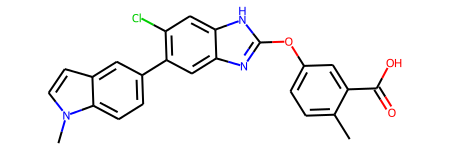

In [417]:
M1 = mol_list [0]
M1

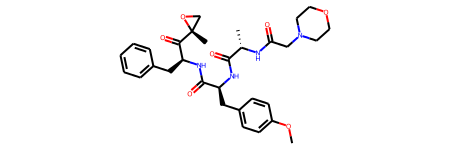

In [418]:
M2 = mol_list [1]
M2

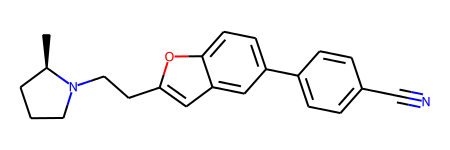

In [419]:
M3 = mol_list [2]
M3

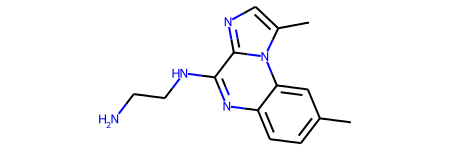

In [420]:
M4 = mol_list [3]
M4

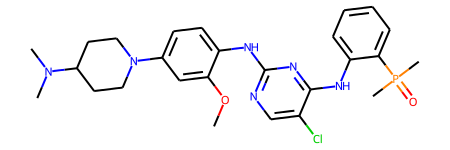

In [421]:
M5 = mol_list [4]
M5

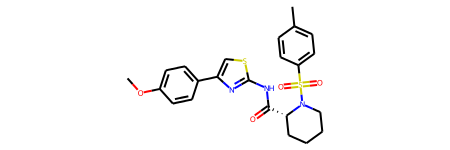

In [422]:
M6 = mol_list [5]
M6

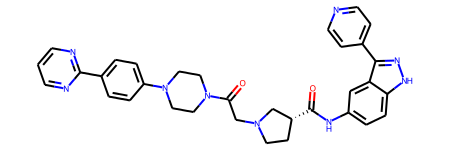

In [423]:
M7 = mol_list [6]
M7

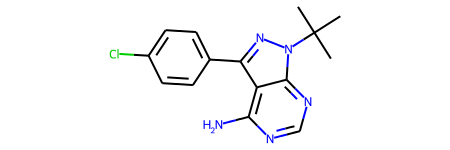

In [424]:
M8 = mol_list [7]
M8

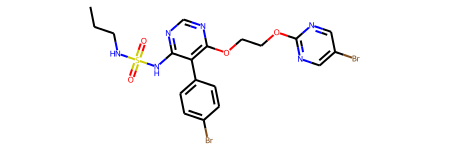

In [425]:
M9 = mol_list [8]
M9

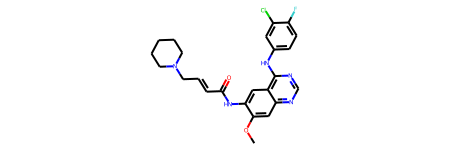

In [426]:
M10 = mol_list [9]
M10

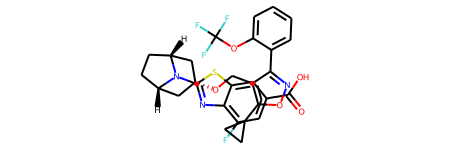

In [427]:
M11 = mol_list [10]
M11

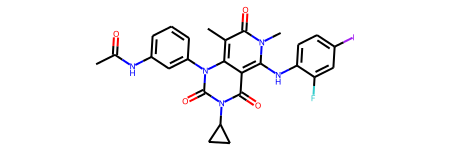

In [428]:
M12 = mol_list [11]
M12

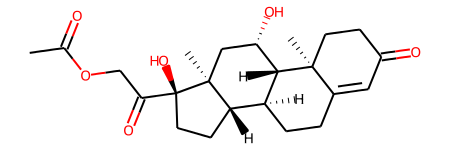

In [429]:
M13 = mol_list [12]
M13

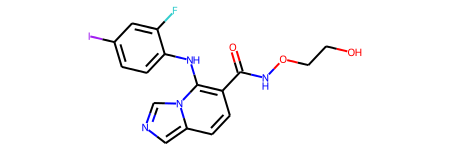

In [430]:
M14 = mol_list [13]
M14

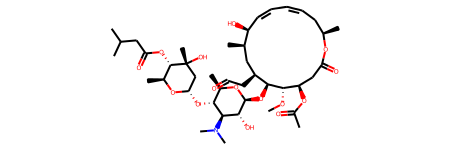

In [431]:
M15 = mol_list [14]
M15

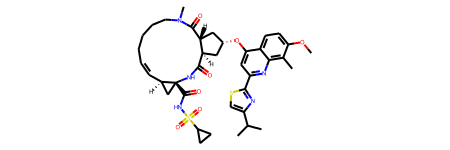

In [432]:
M16 = mol_list [15]
M16

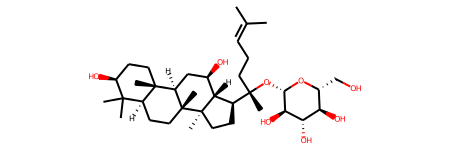

In [433]:
M17 = mol_list [16]
M17

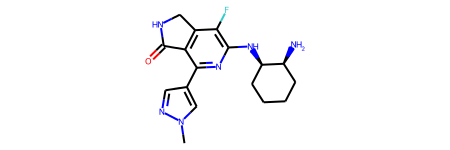

In [434]:
M18 = mol_list [17]
M18

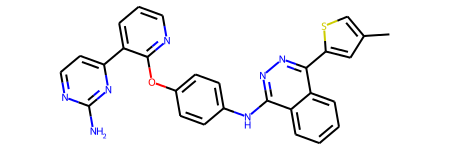

In [435]:
M19 = mol_list [18]
M19

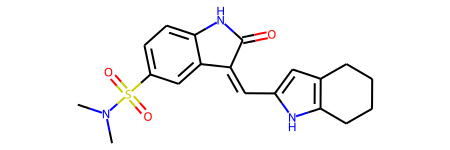

In [436]:
M20 = mol_list [19]
M20

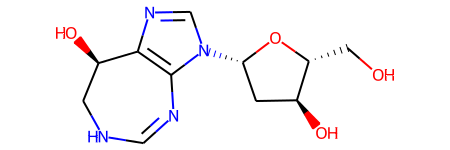

In [437]:
M21 = mol_list [20]
M21

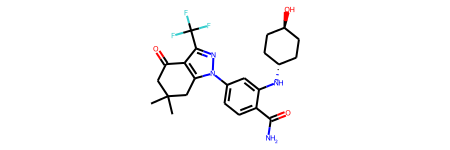

In [438]:
M22 = mol_list [21]
M22

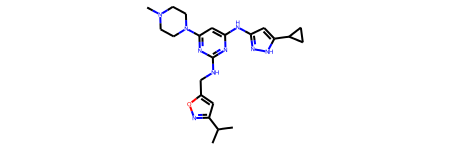

In [439]:
M23 = mol_list [22]
M23

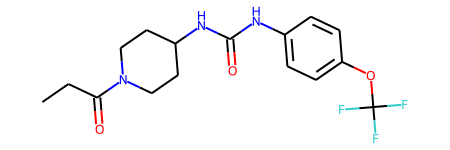

In [440]:
M24 = mol_list [23]
M24

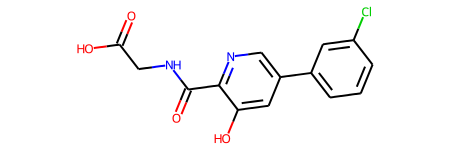

In [441]:
M25 = mol_list [24]
M25

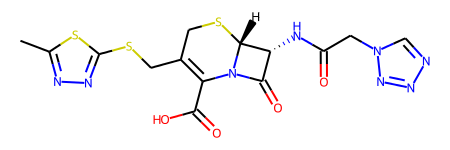

In [442]:
M26 = mol_list [25]
M26

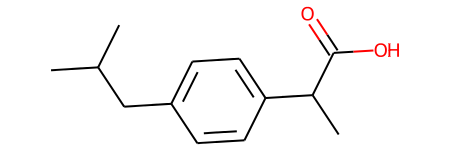

In [443]:
M27 = mol_list [26]
M27

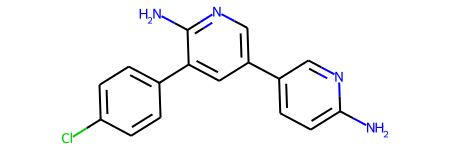

In [444]:
M28 = mol_list [27]
M28

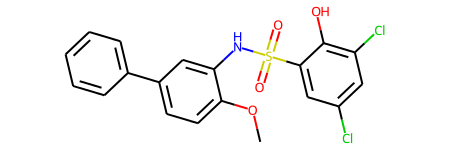

In [445]:
M29 = mol_list [28]
M29

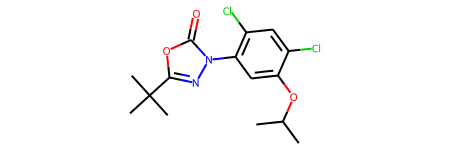

In [446]:
M30 = mol_list [29]
M30

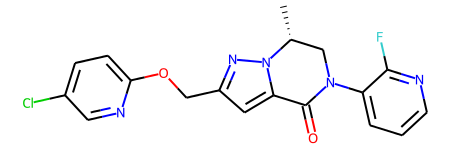

In [447]:
M31 = mol_list [30]
M31

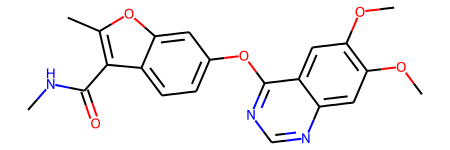

In [448]:
M32 = mol_list [31]
M32

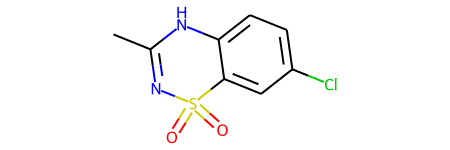

In [449]:
M33 = mol_list [32]
M33

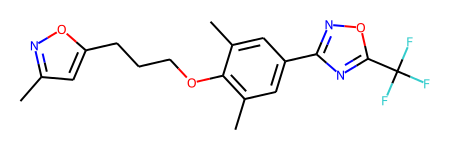

In [450]:
M34 = mol_list [33]
M34

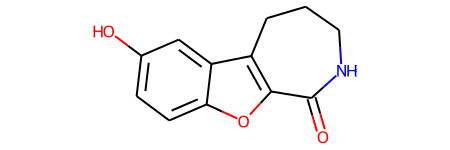

In [451]:
M35 = mol_list [34]
M35

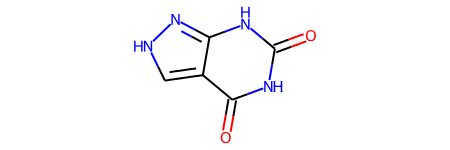

In [452]:
M36 = mol_list [35]
M36

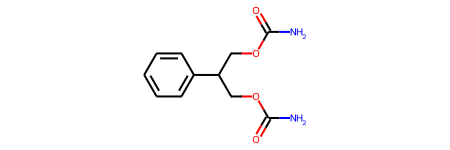

In [453]:
M37= mol_list [36]
M37

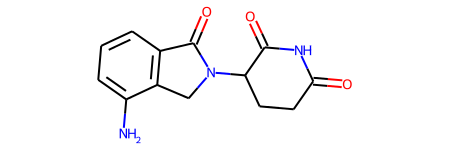

In [454]:
M38= mol_list [37]
M38

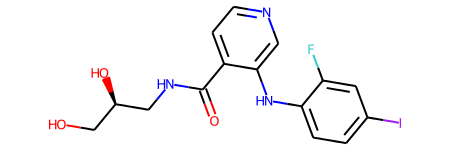

In [455]:
M39= mol_list [38]
M39

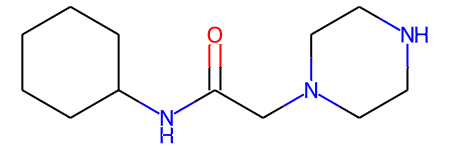

In [456]:
M40= mol_list [39]
M40

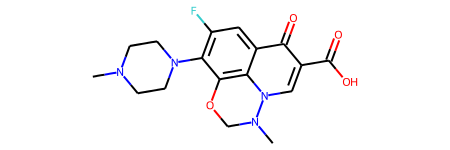

In [457]:
M41= mol_list [40]
M41

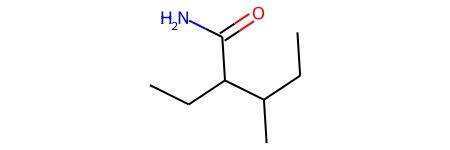

In [458]:
M42= mol_list [41]
M42

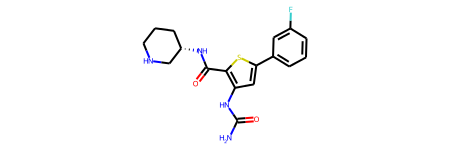

In [459]:
M43= mol_list [42]
M43

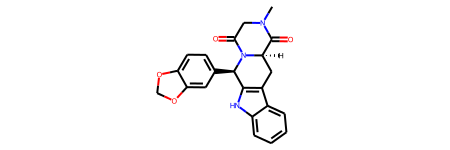

In [460]:
M44= mol_list [43]
M44

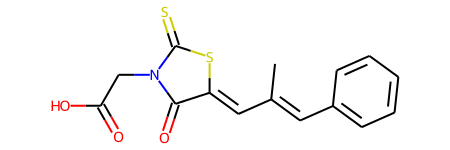

In [461]:
M45= mol_list [44]
M45

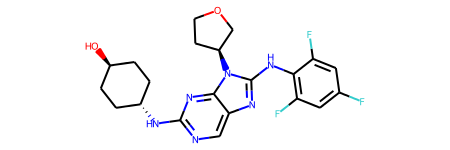

In [462]:
M46= mol_list [45]
M46

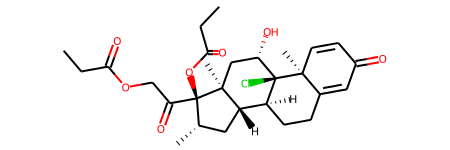

In [463]:
M47= mol_list [46]
M47

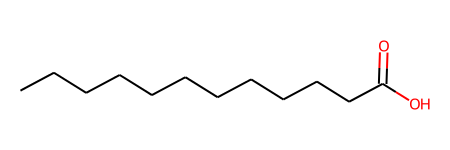

In [464]:
M48= mol_list [47]
M48

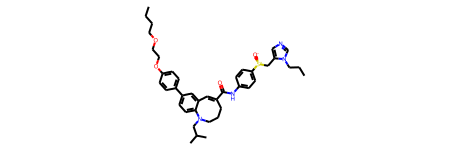

In [465]:
M49= mol_list [48]
M49

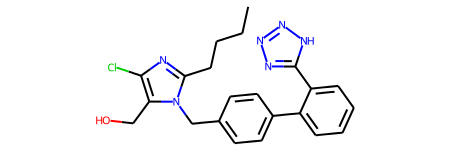

In [466]:
M50= mol_list [49]
M50

In [467]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[23,
 33,
 45,
 47,
 73,
 77,
 90,
 100,
 119,
 121,
 133,
 136,
 167,
 204,
 260,
 322,
 323,
 329,
 346,
 350,
 352,
 356,
 366,
 367,
 373,
 378,
 385,
 389,
 456,
 459,
 469,
 561,
 574,
 593,
 597,
 608,
 611,
 621,
 650,
 659,
 667,
 695,
 698,
 718,
 721,
 726,
 761,
 807,
 831,
 849,
 863,
 875,
 893,
 896,
 927,
 935,
 967,
 997]

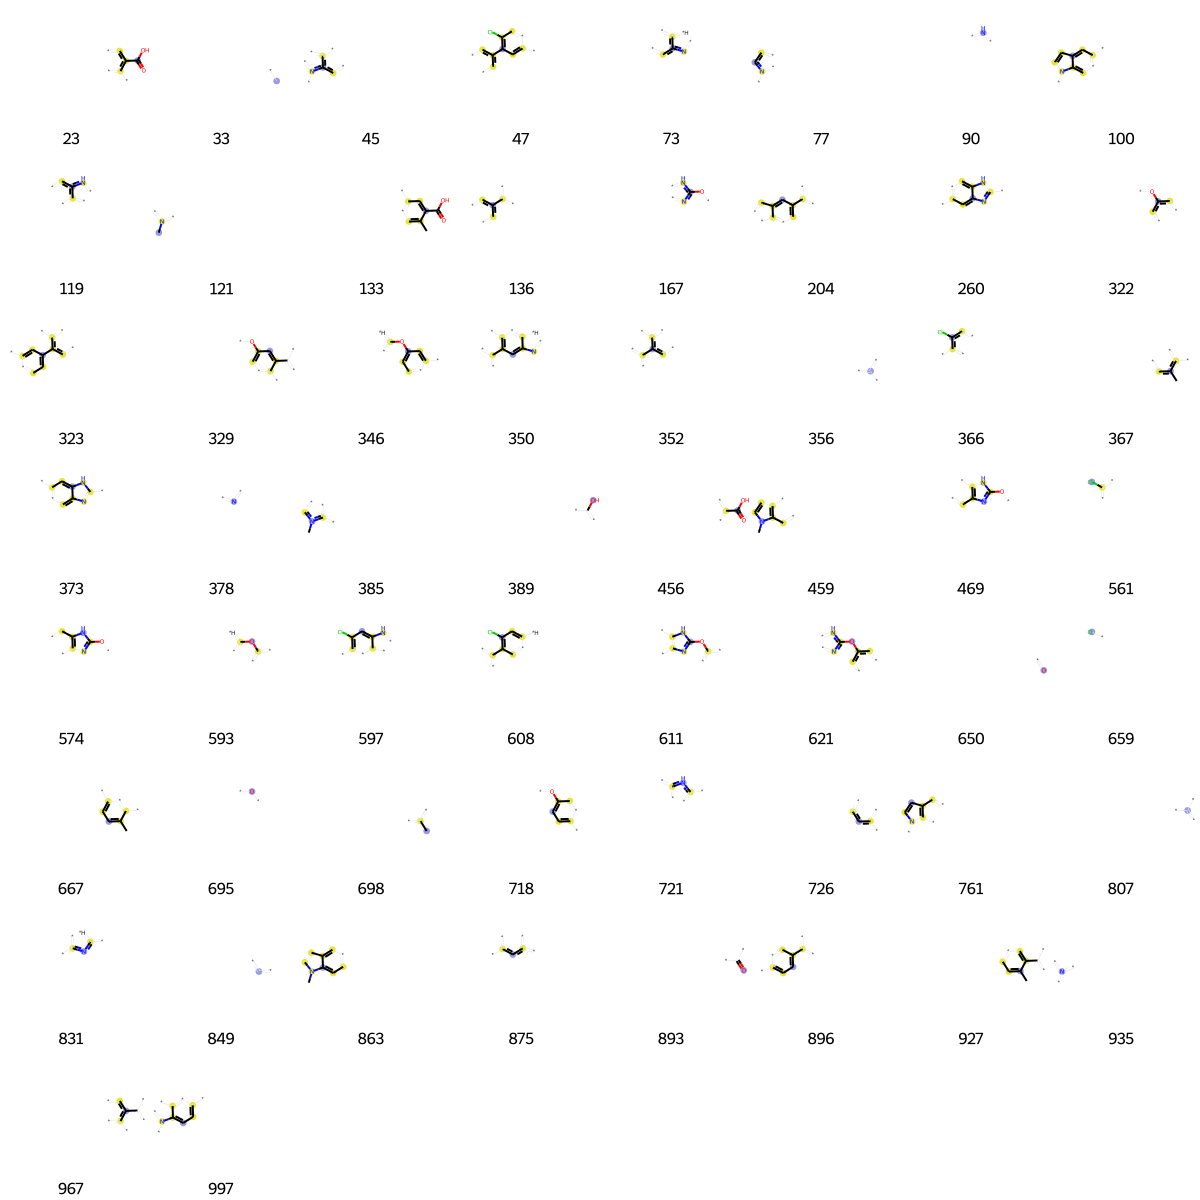

In [468]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [469]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 15,
 33,
 36,
 41,
 42,
 64,
 79,
 80,
 82,
 86,
 117,
 125,
 128,
 143,
 154,
 175,
 200,
 250,
 277,
 283,
 288,
 310,
 322,
 352,
 356,
 381,
 389,
 417,
 456,
 512,
 523,
 573,
 592,
 599,
 650,
 656,
 695,
 700,
 718,
 726,
 730,
 736,
 767,
 781,
 805,
 807,
 825,
 831,
 841,
 849,
 857,
 881,
 893,
 896,
 926,
 935,
 950,
 982,
 989,
 992,
 1017]

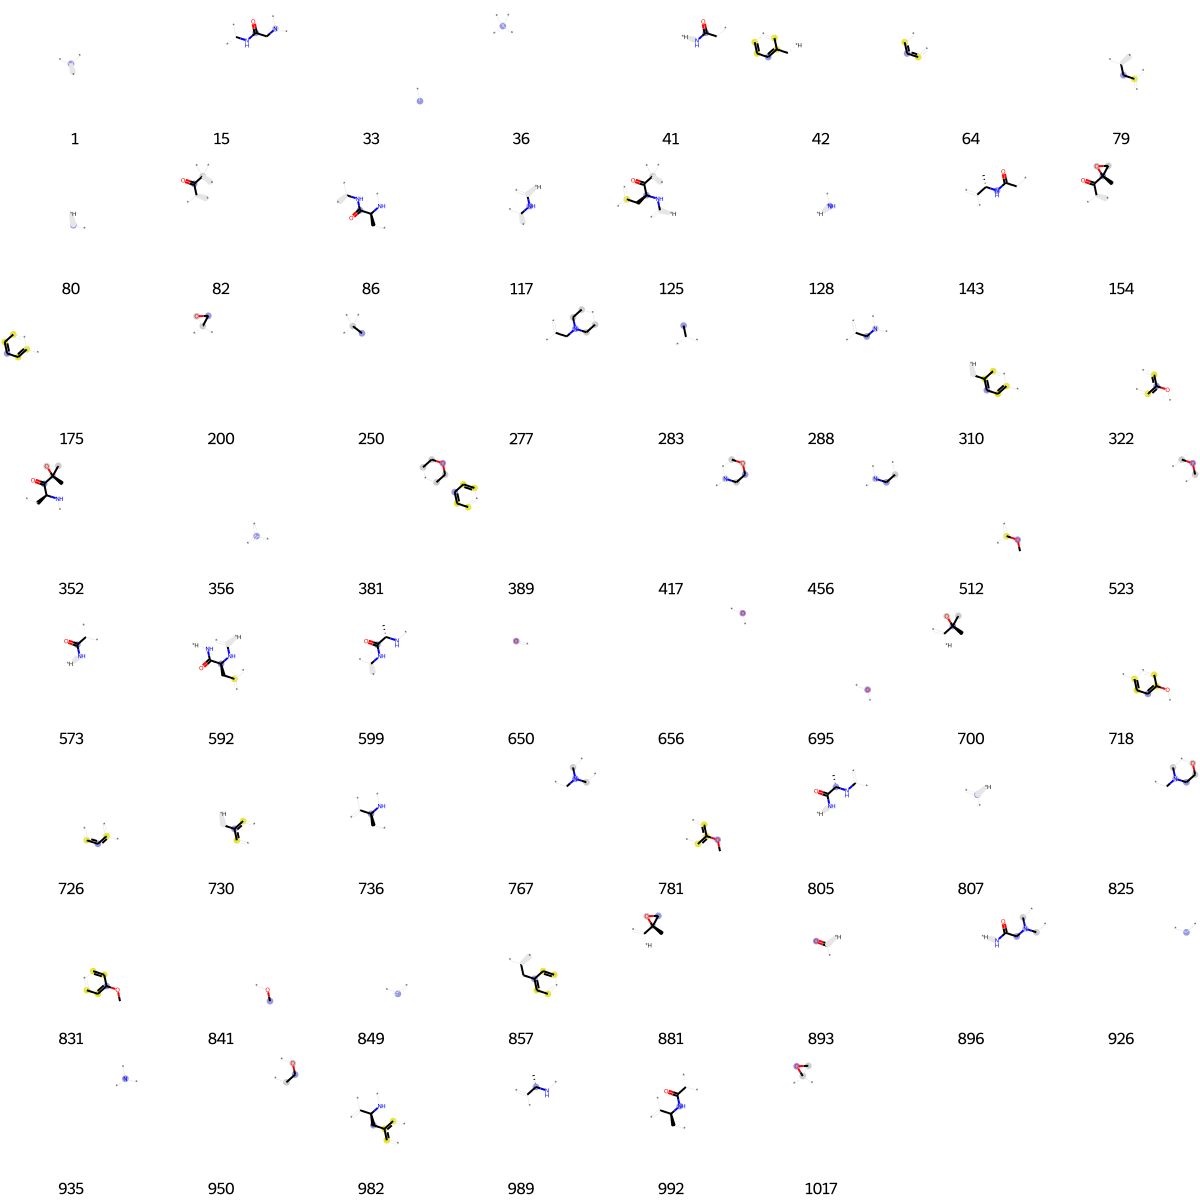

In [470]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [471]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[4,
 33,
 34,
 80,
 102,
 112,
 121,
 136,
 204,
 219,
 285,
 300,
 301,
 305,
 356,
 360,
 437,
 446,
 456,
 545,
 580,
 656,
 674,
 677,
 690,
 719,
 726,
 734,
 741,
 784,
 785,
 786,
 790,
 831,
 849,
 863,
 875,
 888,
 896,
 910,
 926,
 930,
 935,
 940,
 961,
 998,
 1015,
 1019]

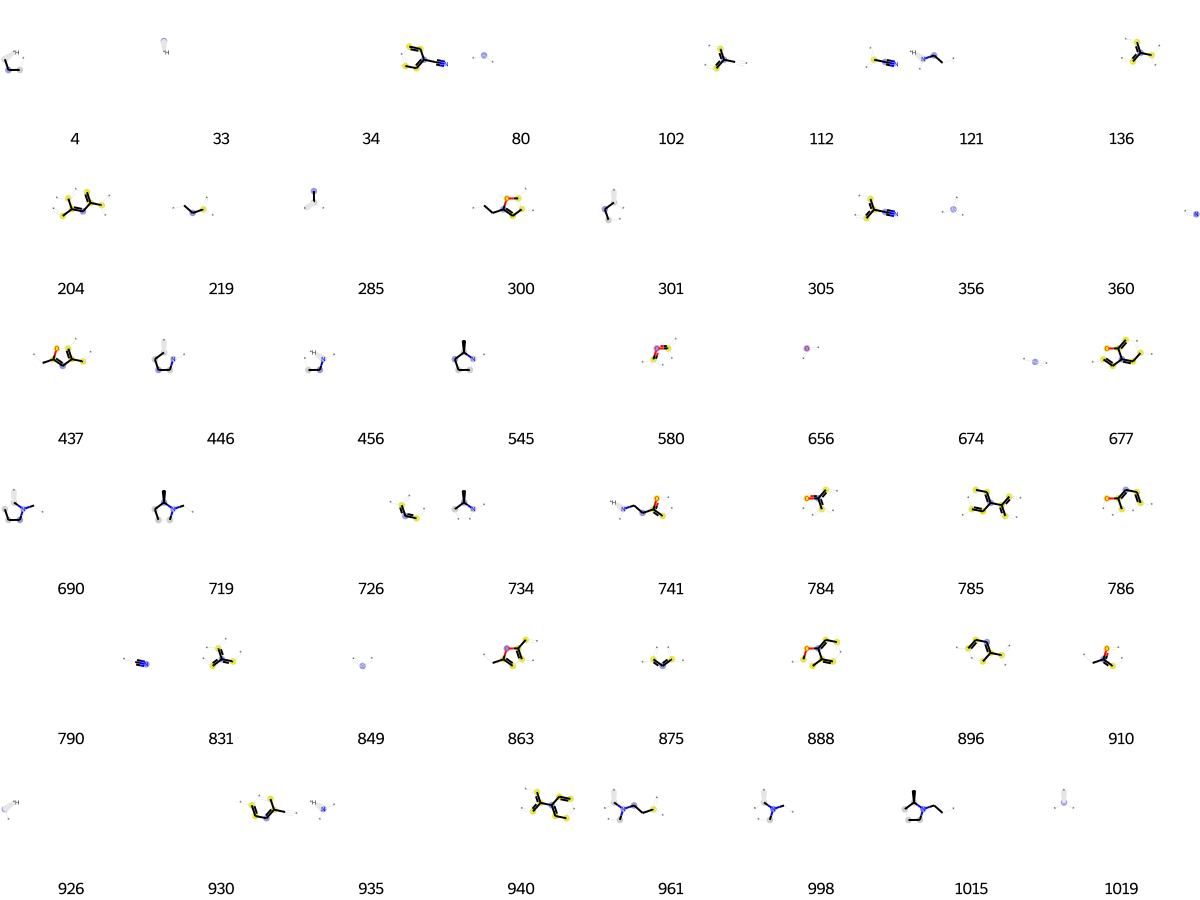

In [472]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [473]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 45,
 73,
 80,
 128,
 140,
 147,
 207,
 235,
 238,
 356,
 357,
 378,
 392,
 410,
 415,
 428,
 459,
 511,
 548,
 626,
 667,
 672,
 698,
 708,
 726,
 736,
 770,
 777,
 799,
 816,
 831,
 849,
 875,
 883,
 892,
 897,
 935,
 961,
 981,
 1013]

In [474]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[33,
 51,
 64,
 65,
 76,
 84,
 128,
 139,
 175,
 192,
 200,
 233,
 249,
 301,
 317,
 335,
 342,
 356,
 366,
 378,
 391,
 407,
 411,
 428,
 449,
 456,
 458,
 486,
 491,
 496,
 511,
 512,
 544,
 555,
 558,
 561,
 601,
 650,
 659,
 672,
 687,
 695,
 708,
 719,
 721,
 726,
 756,
 801,
 809,
 831,
 832,
 841,
 849,
 875,
 881,
 926,
 935,
 946,
 1002,
 1019]

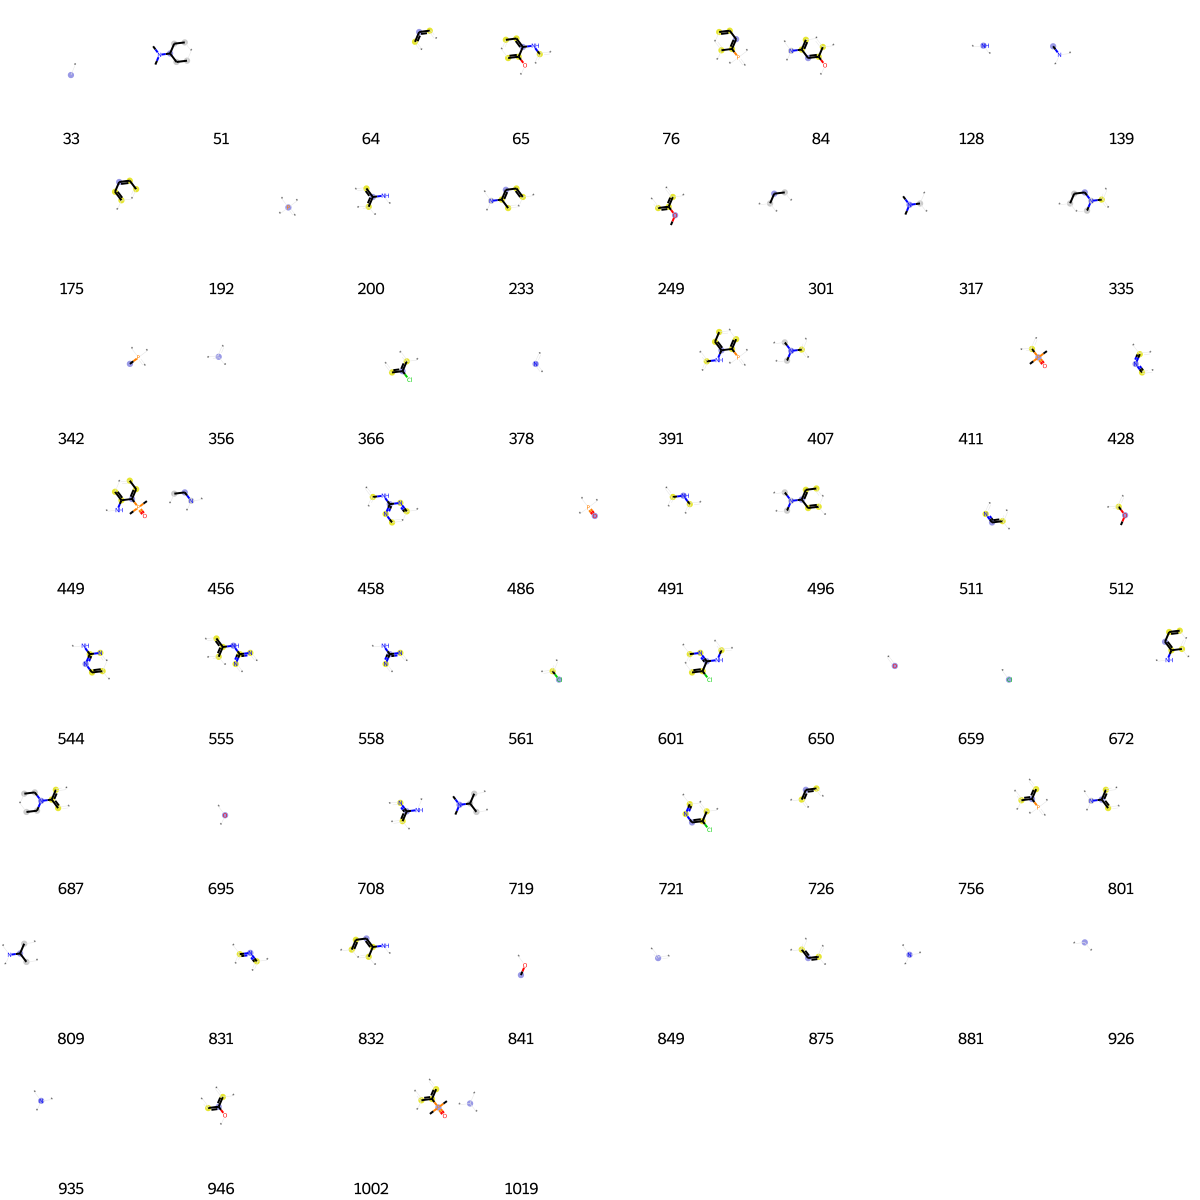

In [475]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [476]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[4,
 33,
 117,
 128,
 136,
 190,
 235,
 240,
 242,
 281,
 301,
 319,
 322,
 350,
 354,
 356,
 374,
 378,
 385,
 419,
 452,
 456,
 512,
 531,
 543,
 552,
 650,
 668,
 675,
 688,
 689,
 695,
 698,
 702,
 715,
 718,
 726,
 781,
 792,
 799,
 800,
 807,
 811,
 831,
 841,
 849,
 890,
 893,
 896,
 926,
 935,
 947,
 974,
 980,
 1019]

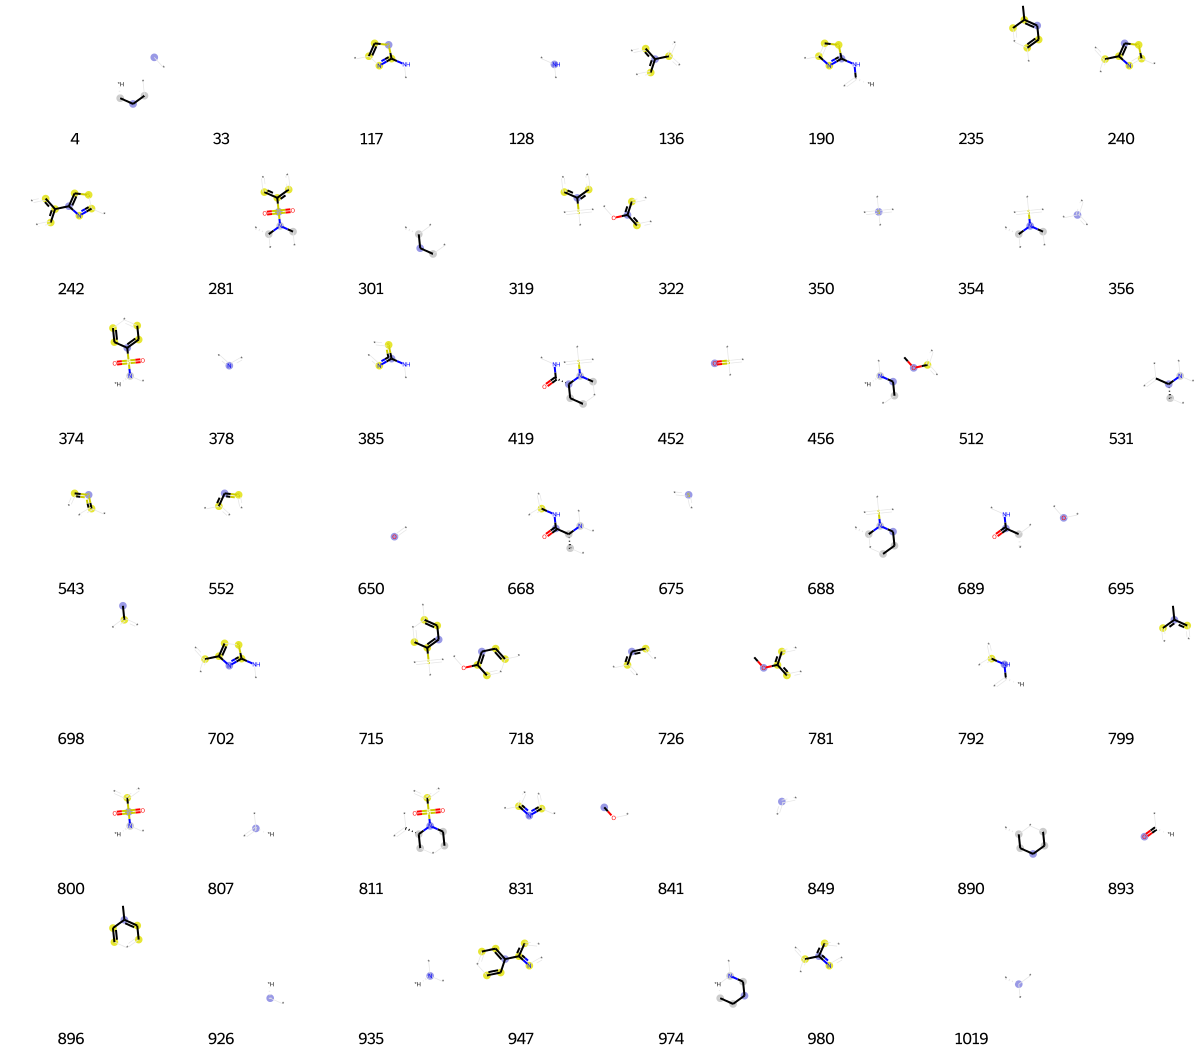

In [477]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [478]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[64,
 74,
 80,
 88,
 90,
 119,
 122,
 128,
 136,
 168,
 184,
 191,
 233,
 237,
 263,
 288,
 289,
 301,
 323,
 333,
 356,
 361,
 378,
 381,
 383,
 407,
 428,
 448,
 456,
 471,
 484,
 552,
 565,
 568,
 574,
 579,
 587,
 650,
 687,
 689,
 726,
 739,
 760,
 767,
 785,
 792,
 800,
 801,
 807,
 813,
 842,
 843,
 849,
 875,
 893,
 896,
 915,
 922,
 926,
 935,
 974,
 980,
 985,
 1009,
 1019,
 1021]

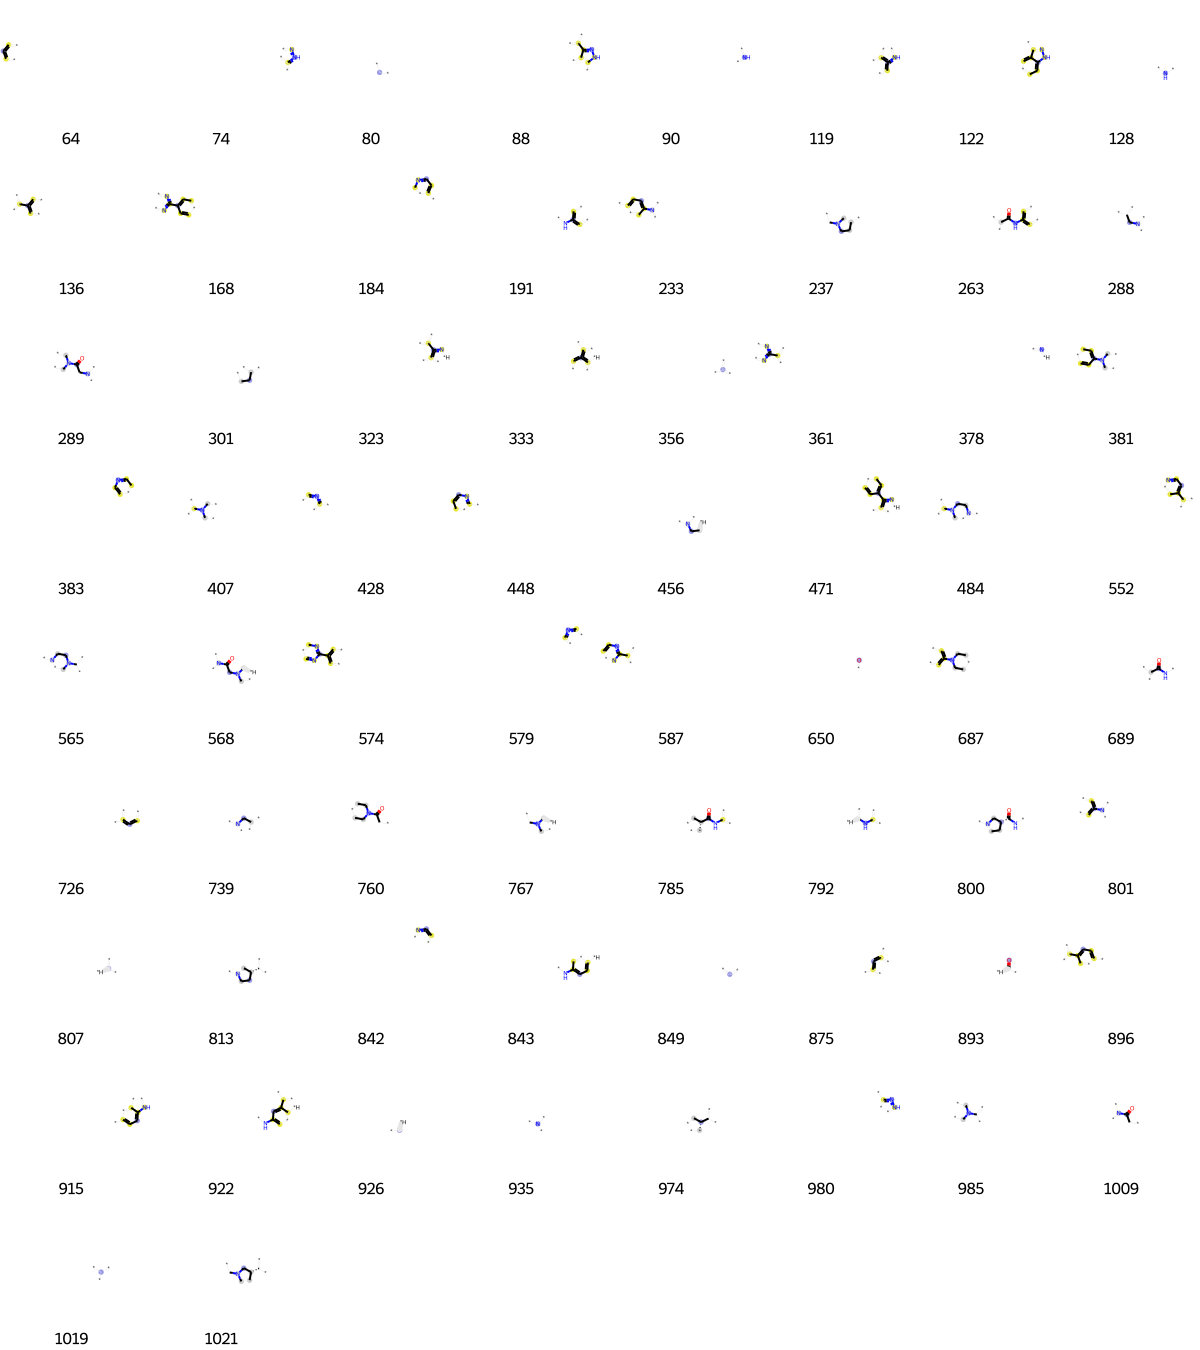

In [479]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [480]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[24,
 33,
 46,
 114,
 136,
 147,
 209,
 216,
 267,
 313,
 323,
 353,
 356,
 378,
 392,
 408,
 428,
 433,
 435,
 459,
 471,
 489,
 548,
 561,
 659,
 672,
 726,
 786,
 816,
 849,
 896,
 932,
 935,
 960,
 989]

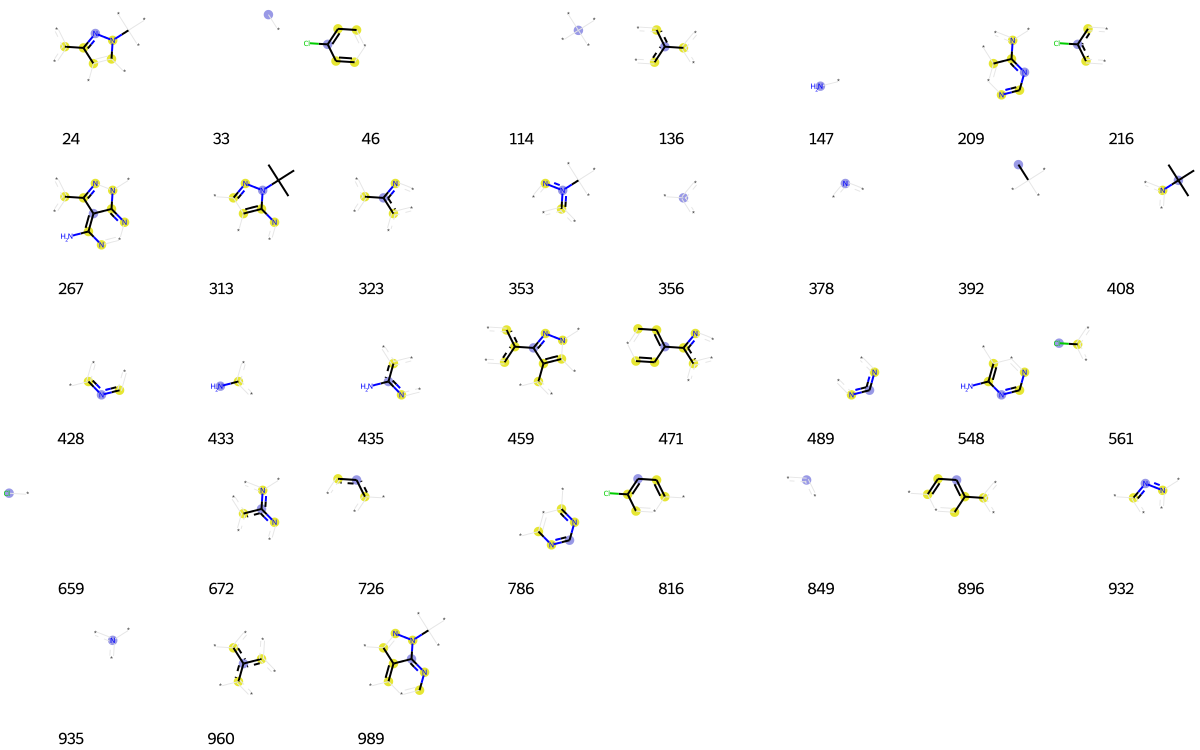

In [481]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [482]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[13,
 30,
 33,
 77,
 80,
 128,
 133,
 136,
 143,
 196,
 204,
 246,
 294,
 299,
 343,
 350,
 356,
 371,
 378,
 379,
 391,
 401,
 423,
 428,
 452,
 458,
 489,
 511,
 569,
 602,
 607,
 624,
 625,
 650,
 667,
 676,
 695,
 708,
 712,
 723,
 726,
 728,
 743,
 786,
 794,
 814,
 849,
 896,
 898,
 909,
 944]

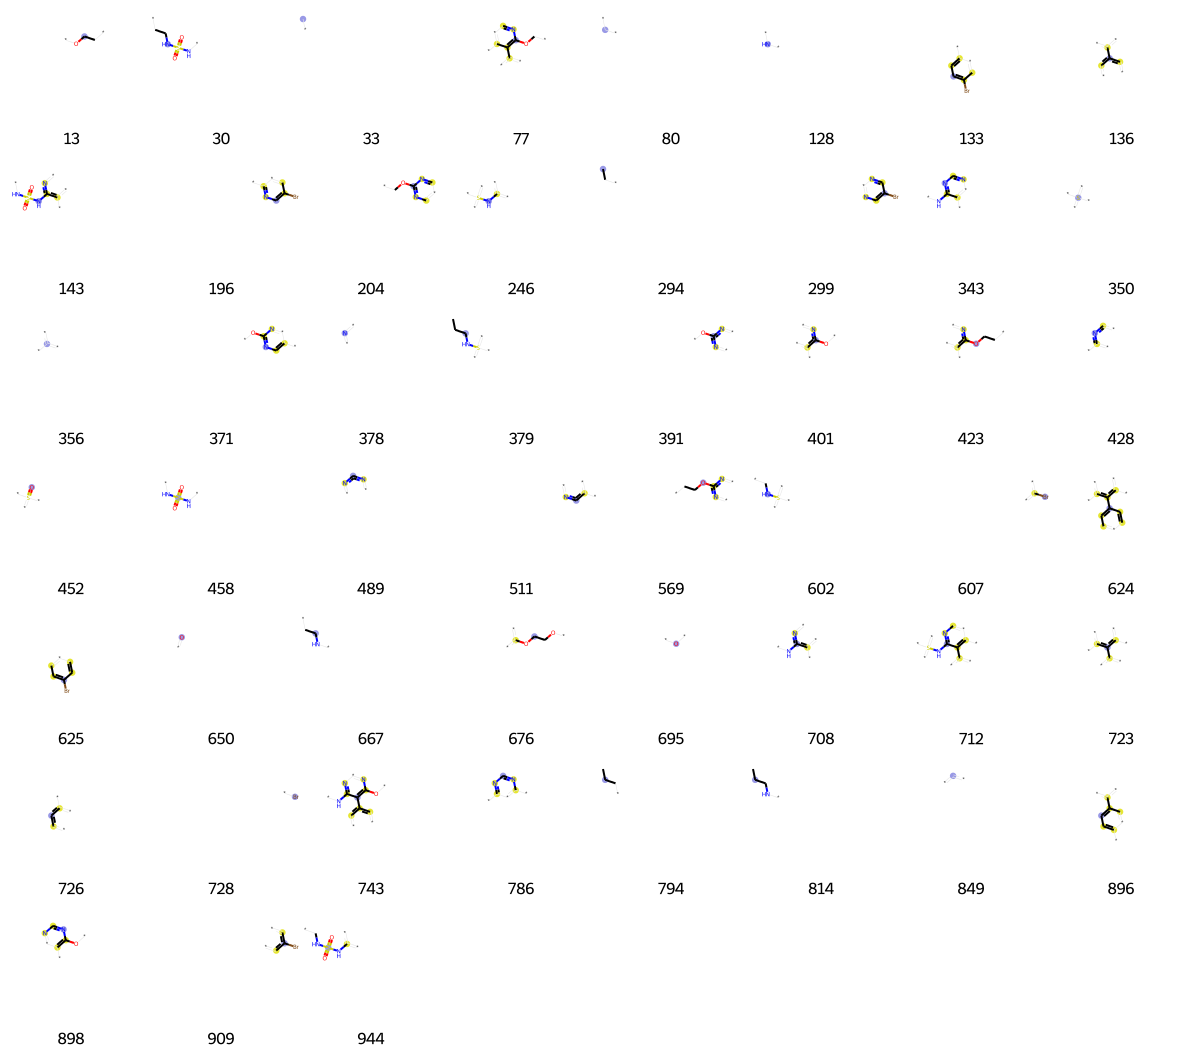

In [483]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [484]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[2,
 4,
 31,
 33,
 34,
 73,
 80,
 128,
 133,
 157,
 191,
 200,
 202,
 216,
 249,
 329,
 332,
 333,
 343,
 356,
 366,
 378,
 398,
 406,
 419,
 428,
 441,
 456,
 464,
 465,
 479,
 489,
 491,
 512,
 532,
 557,
 561,
 650,
 659,
 673,
 694,
 695,
 699,
 708,
 726,
 767,
 780,
 786,
 792,
 794,
 807,
 816,
 841,
 843,
 849,
 875,
 876,
 888,
 893,
 894,
 904,
 926,
 935,
 946,
 974,
 1015,
 1019]

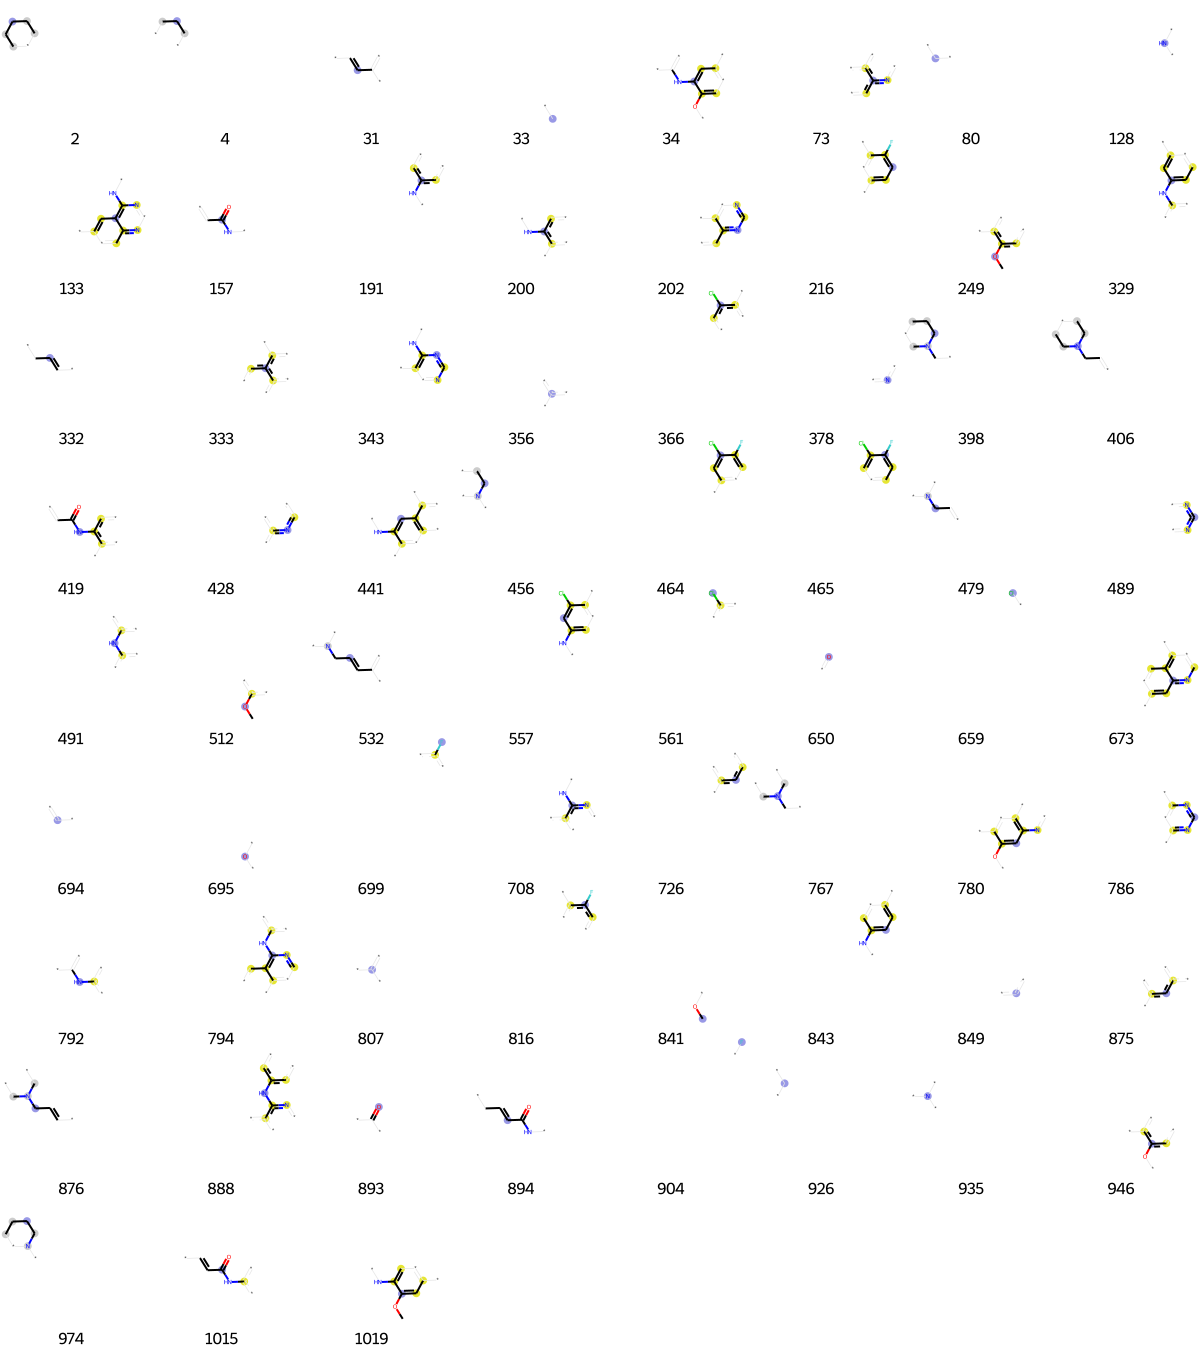

In [485]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [486]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[64,
 80,
 87,
 114,
 119,
 125,
 126,
 143,
 162,
 163,
 169,
 175,
 191,
 248,
 268,
 301,
 312,
 323,
 336,
 338,
 351,
 352,
 356,
 361,
 378,
 380,
 385,
 386,
 389,
 408,
 429,
 456,
 499,
 518,
 548,
 572,
 577,
 579,
 581,
 650,
 655,
 656,
 675,
 695,
 699,
 700,
 702,
 726,
 745,
 751,
 799,
 807,
 816,
 823,
 831,
 849,
 875,
 885,
 886,
 892,
 893,
 899,
 904,
 926,
 935,
 946,
 976,
 984,
 996,
 1010,
 1019,
 1023]

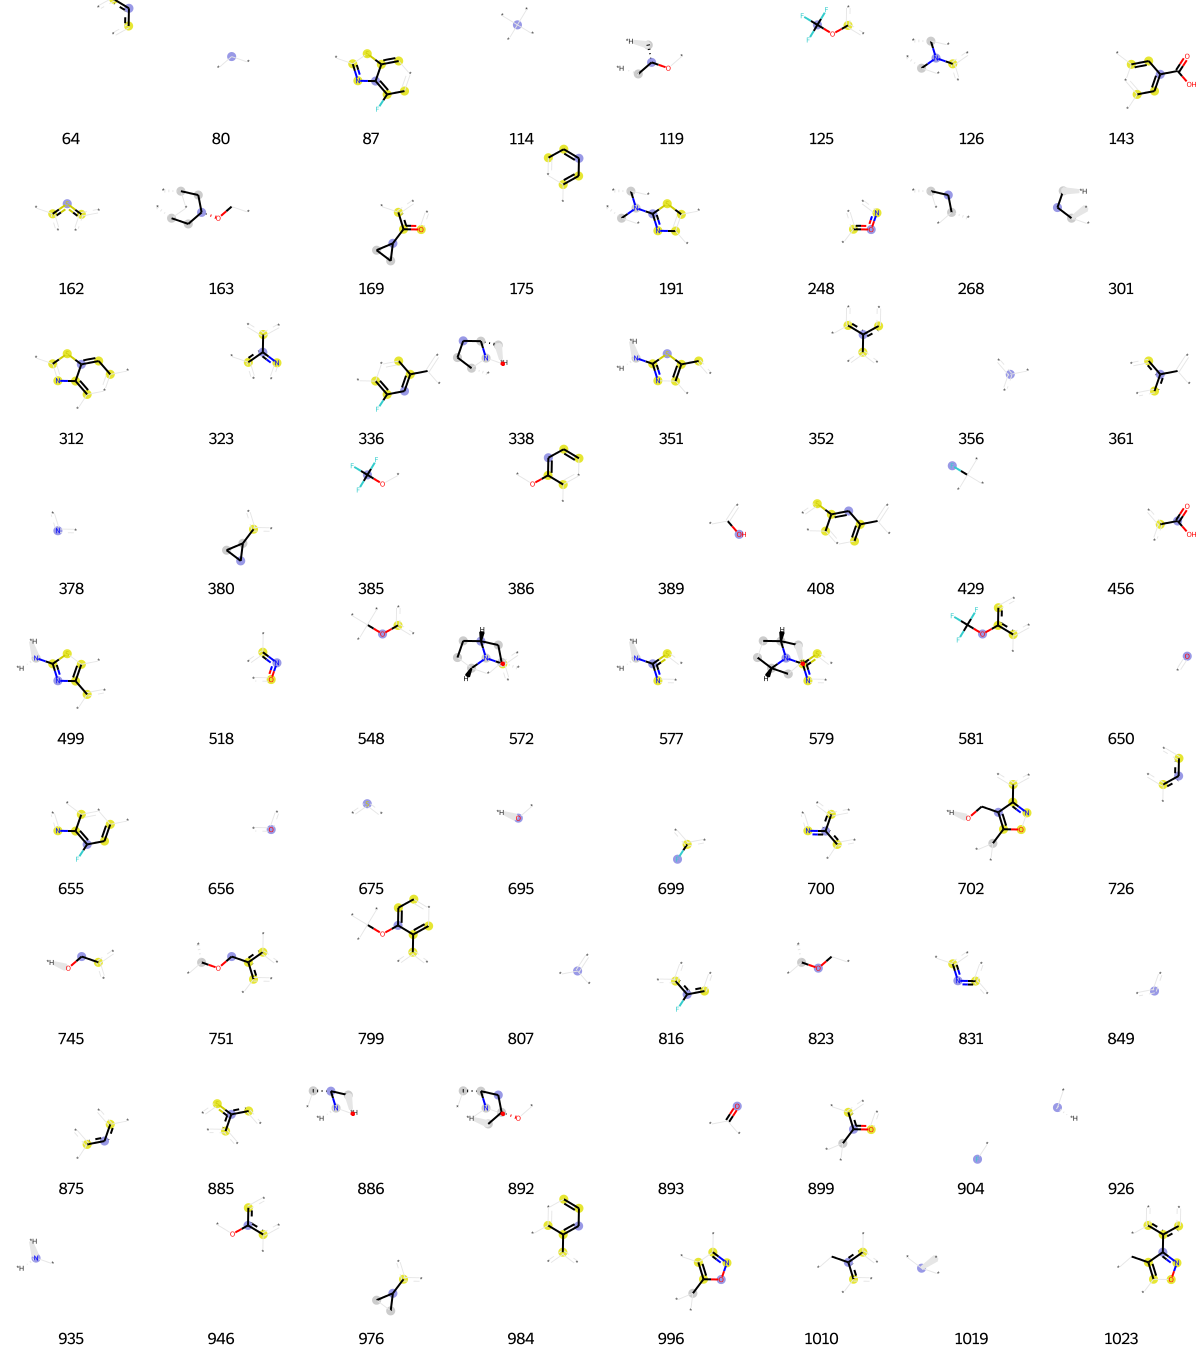

In [487]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [488]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[15,
 25,
 33,
 64,
 71,
 121,
 122,
 128,
 172,
 184,
 191,
 200,
 244,
 245,
 252,
 270,
 301,
 303,
 314,
 338,
 356,
 414,
 416,
 417,
 421,
 459,
 470,
 475,
 491,
 504,
 530,
 564,
 570,
 592,
 595,
 621,
 649,
 650,
 661,
 683,
 698,
 699,
 703,
 726,
 771,
 792,
 801,
 807,
 816,
 832,
 849,
 870,
 875,
 886,
 891,
 893,
 904,
 926,
 935,
 947,
 960,
 969,
 1017,
 1019,
 1022]

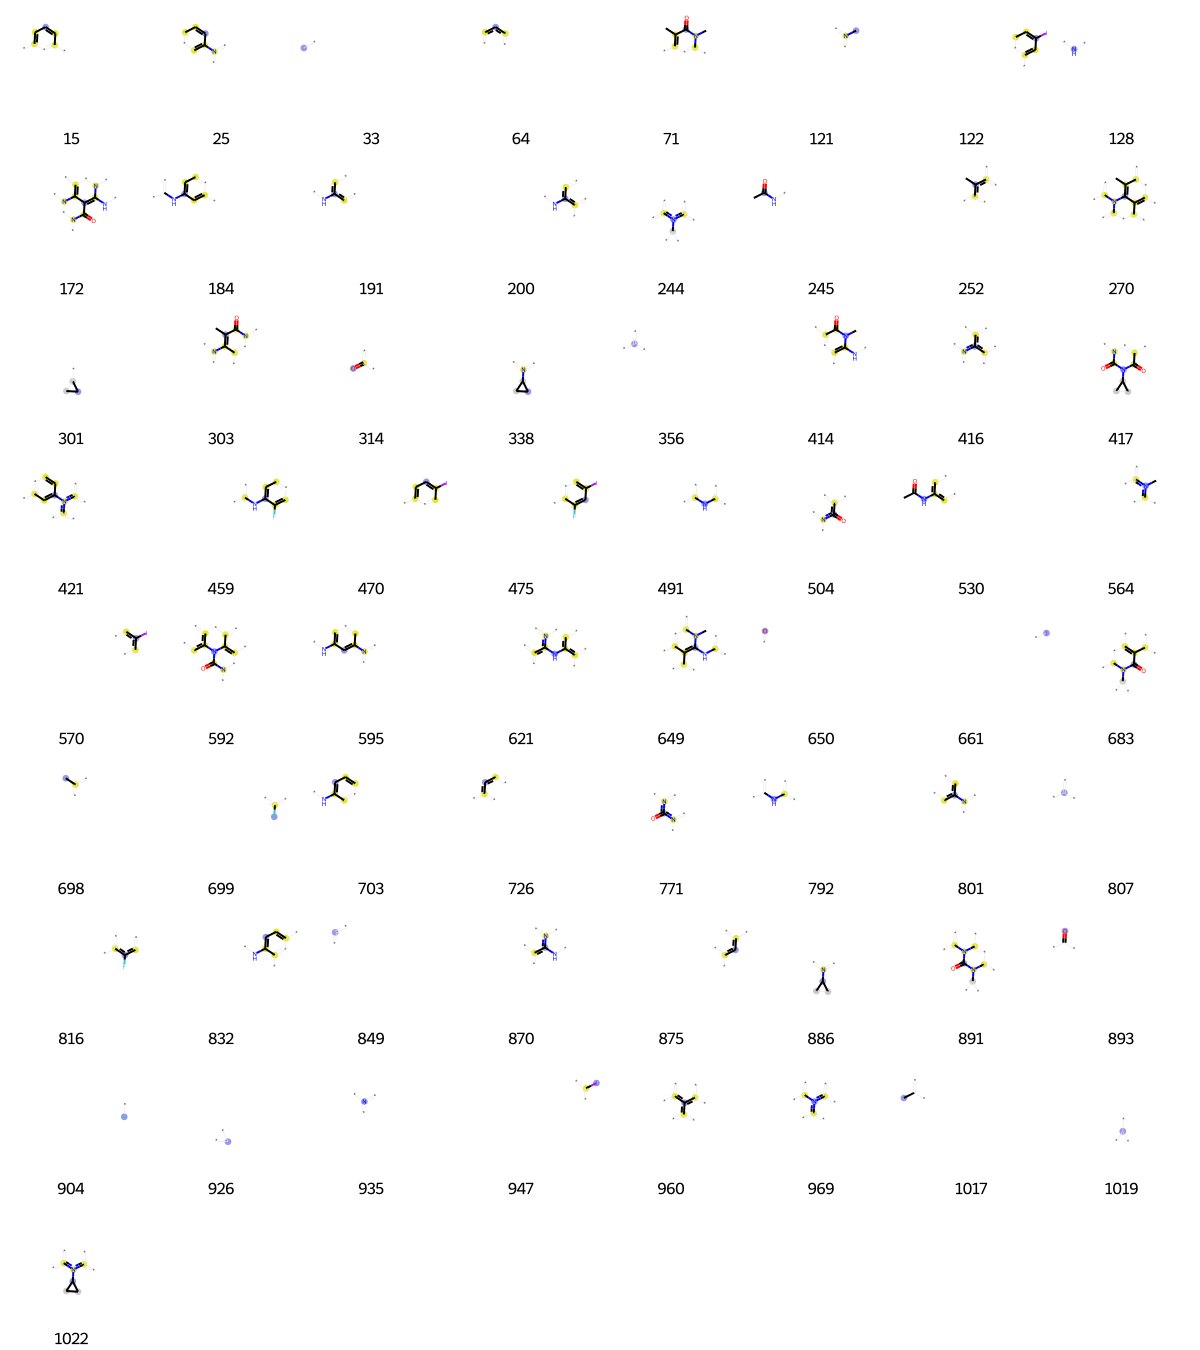

In [489]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [490]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[11,
 33,
 36,
 51,
 80,
 84,
 88,
 130,
 138,
 147,
 182,
 195,
 233,
 242,
 250,
 262,
 283,
 301,
 314,
 315,
 356,
 408,
 412,
 465,
 479,
 493,
 504,
 507,
 519,
 520,
 529,
 580,
 622,
 639,
 650,
 679,
 695,
 714,
 738,
 773,
 807,
 841,
 846,
 849,
 860,
 893,
 897,
 914,
 926,
 973,
 980,
 1009,
 1017,
 1019]

In [491]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[13,
 67,
 74,
 80,
 104,
 122,
 128,
 147,
 167,
 200,
 222,
 345,
 356,
 378,
 395,
 447,
 459,
 470,
 473,
 475,
 486,
 491,
 511,
 518,
 526,
 570,
 579,
 584,
 608,
 621,
 647,
 650,
 661,
 695,
 699,
 726,
 768,
 807,
 816,
 832,
 836,
 849,
 870,
 875,
 891,
 893,
 904,
 923,
 932,
 935,
 945,
 947,
 967,
 1021]

In [492]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 11,
 17,
 24,
 33,
 36,
 53,
 59,
 73,
 80,
 102,
 104,
 107,
 115,
 130,
 139,
 181,
 206,
 210,
 212,
 226,
 231,
 232,
 233,
 236,
 242,
 248,
 250,
 256,
 266,
 268,
 277,
 279,
 283,
 285,
 293,
 299,
 314,
 317,
 348,
 356,
 357,
 362,
 463,
 468,
 471,
 485,
 521,
 530,
 533,
 589,
 591,
 598,
 650,
 652,
 653,
 656,
 663,
 679,
 687,
 694,
 695,
 700,
 711,
 722,
 739,
 750,
 798,
 807,
 823,
 835,
 841,
 843,
 846,
 849,
 856,
 862,
 869,
 881,
 893,
 897,
 898,
 912,
 926,
 936,
 937,
 967,
 970,
 996,
 1004,
 1017,
 1019]

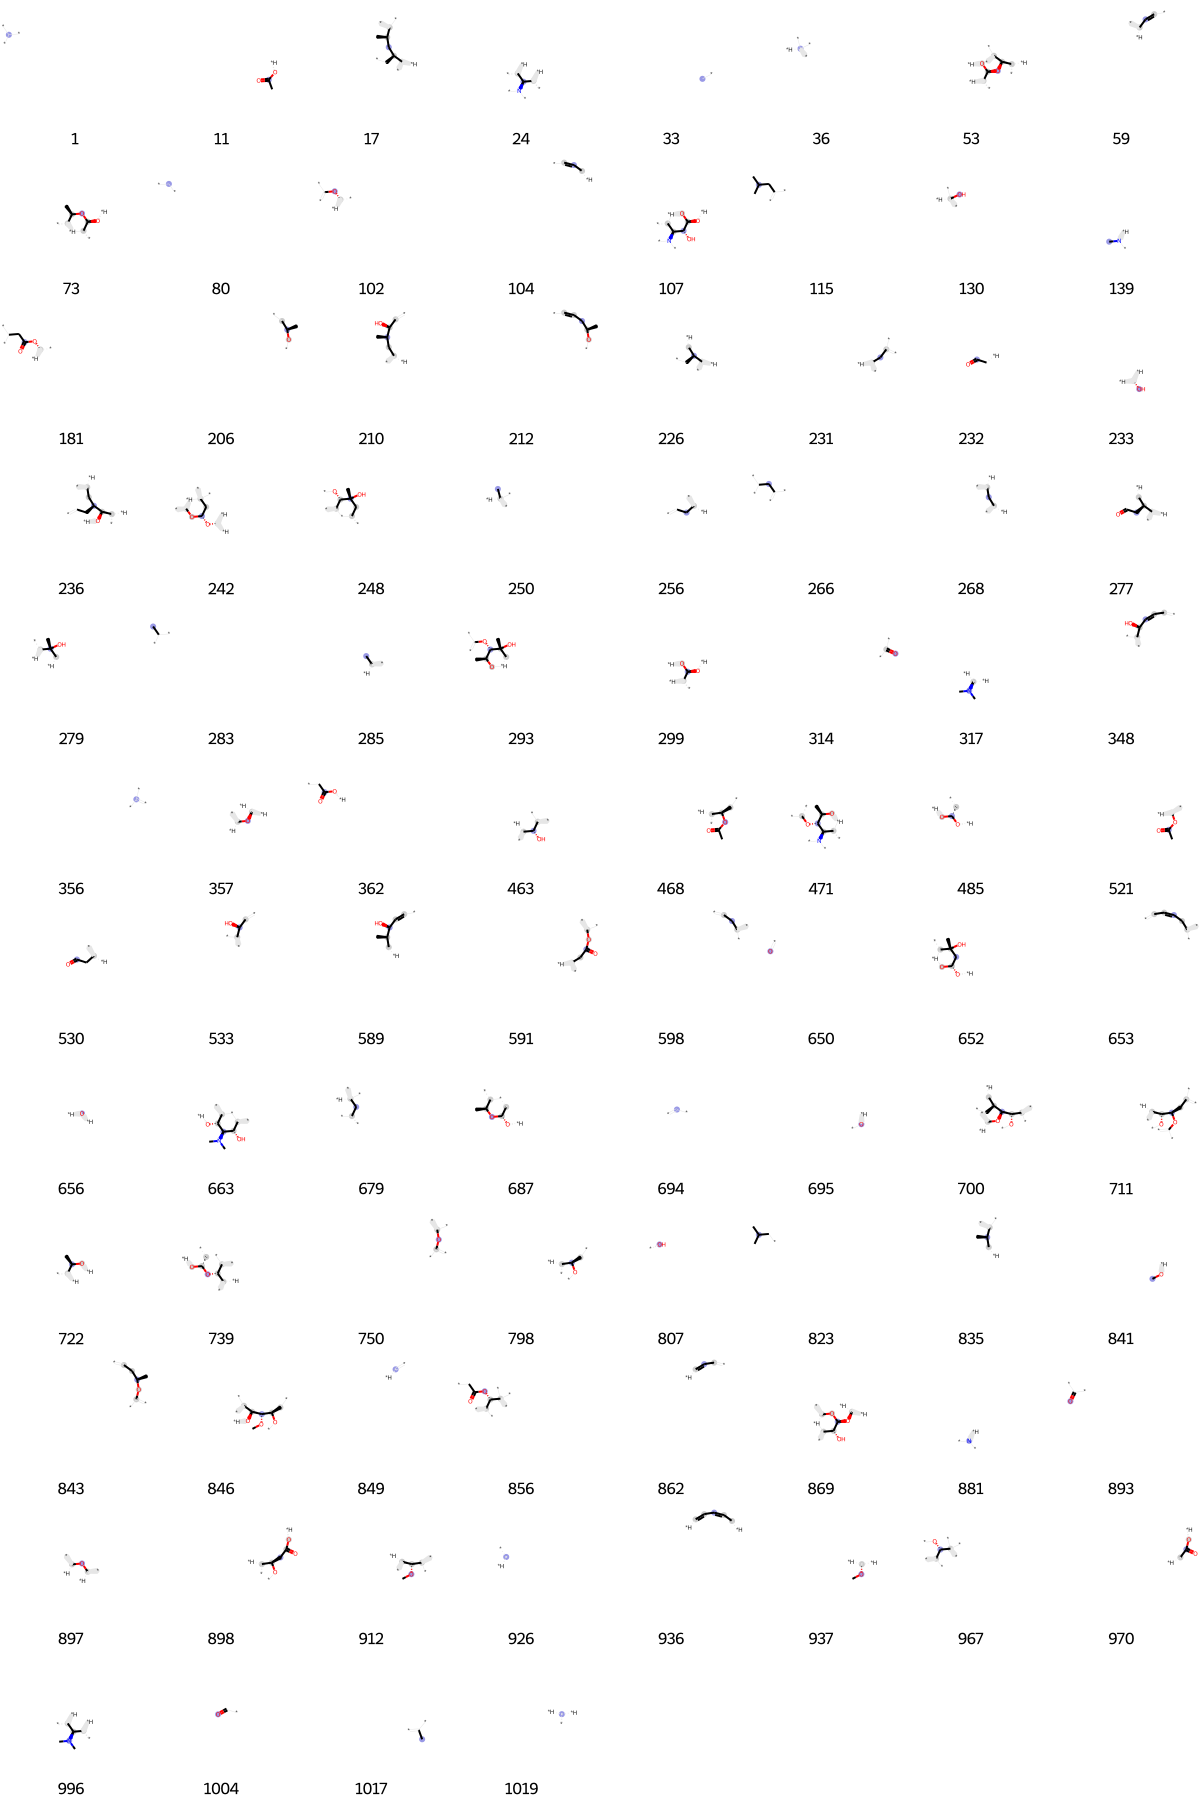

In [493]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [494]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 4,
 5,
 10,
 26,
 33,
 36,
 39,
 51,
 59,
 90,
 94,
 97,
 104,
 119,
 121,
 123,
 128,
 132,
 189,
 241,
 249,
 252,
 257,
 268,
 283,
 296,
 301,
 307,
 310,
 314,
 333,
 350,
 356,
 371,
 378,
 381,
 383,
 393,
 397,
 402,
 420,
 435,
 452,
 455,
 456,
 483,
 501,
 512,
 518,
 524,
 525,
 543,
 552,
 598,
 620,
 628,
 650,
 666,
 669,
 675,
 679,
 688,
 695,
 698,
 700,
 709,
 726,
 765,
 781,
 807,
 820,
 826,
 831,
 841,
 849,
 852,
 875,
 882,
 884,
 893,
 895,
 907,
 910,
 911,
 925,
 926,
 935,
 946,
 953,
 954,
 955,
 964,
 974,
 980,
 999,
 1019]

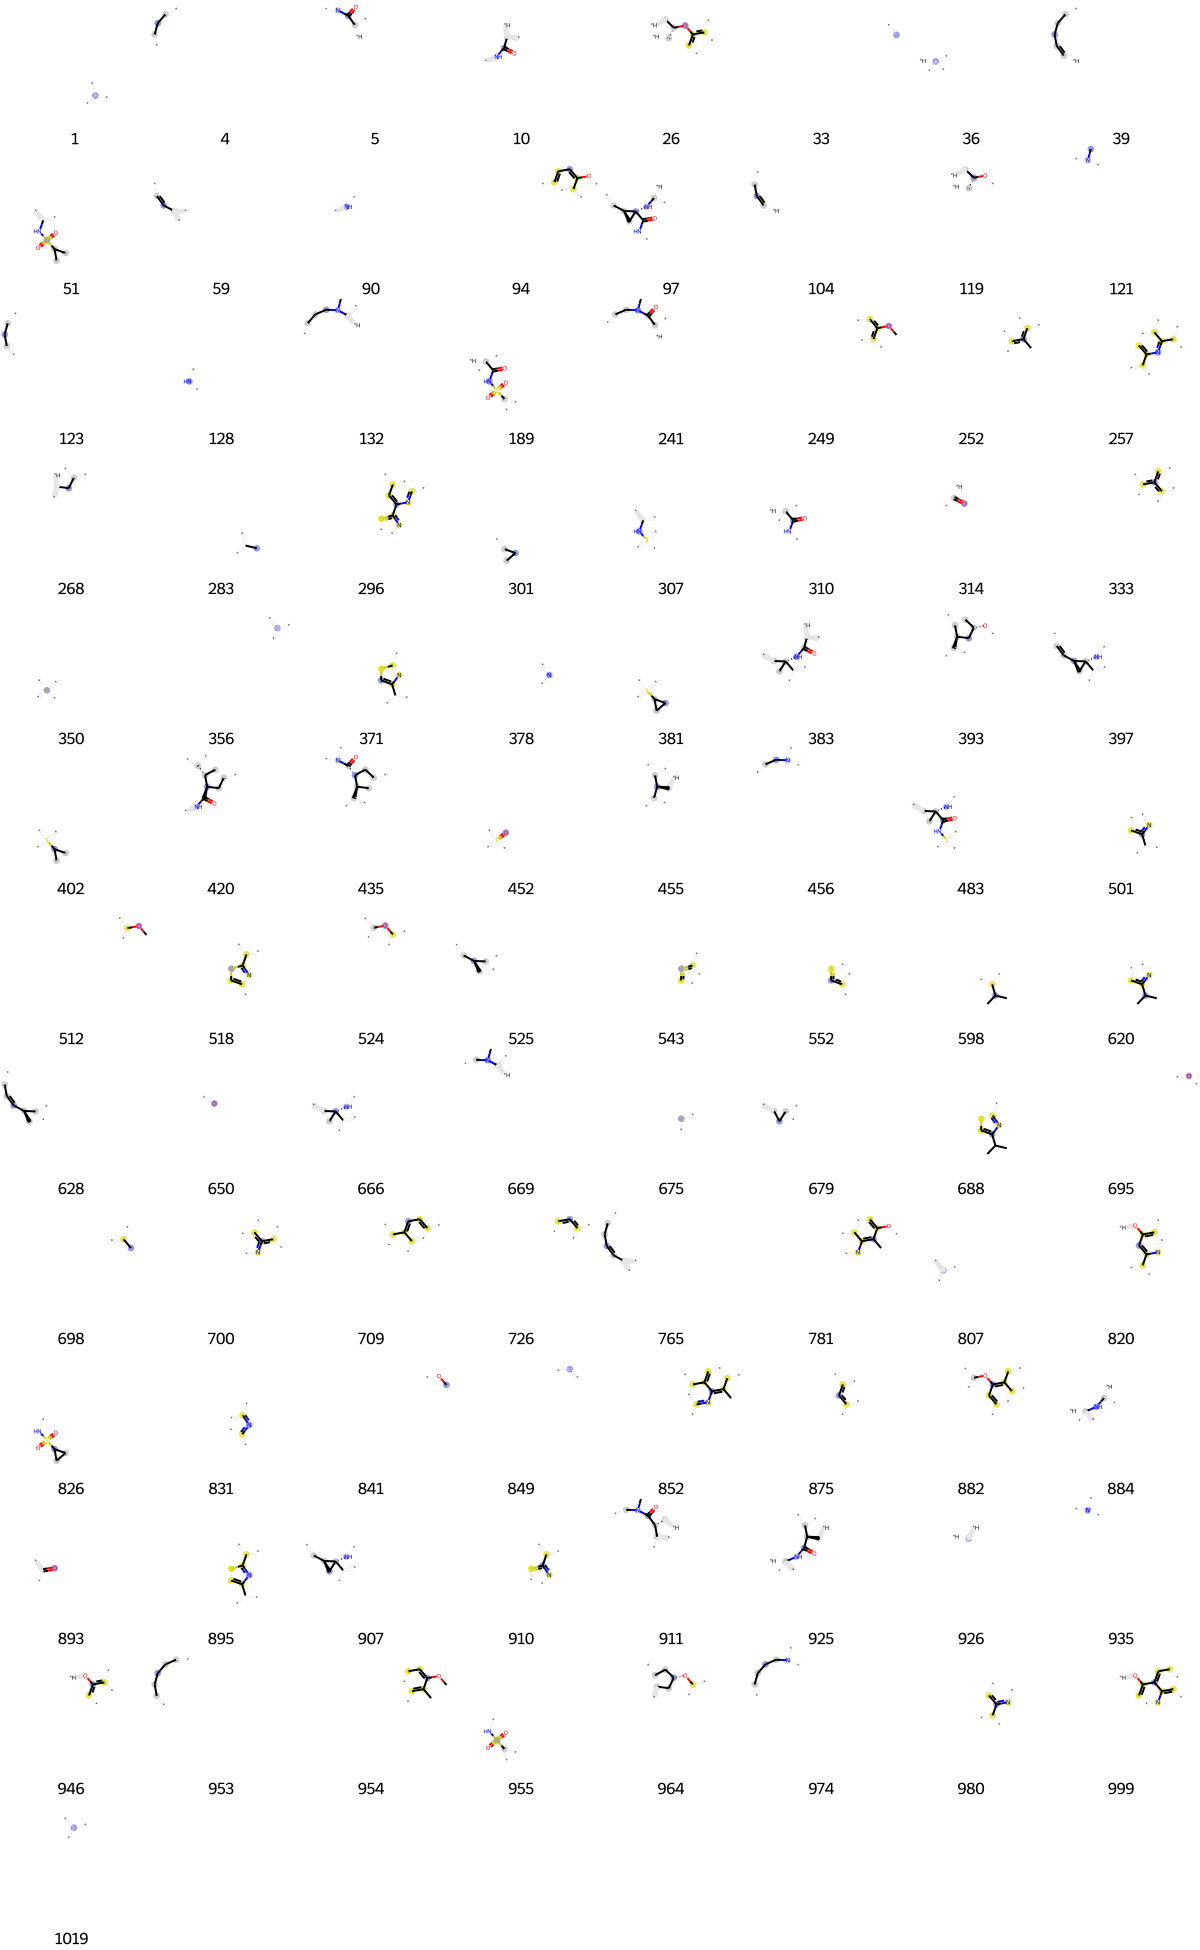

In [495]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [496]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[13,
 25,
 31,
 33,
 36,
 50,
 80,
 101,
 114,
 138,
 175,
 210,
 222,
 233,
 250,
 267,
 268,
 282,
 284,
 299,
 301,
 392,
 401,
 411,
 412,
 453,
 463,
 478,
 479,
 489,
 492,
 549,
 550,
 555,
 558,
 608,
 610,
 612,
 656,
 666,
 694,
 695,
 740,
 760,
 788,
 807,
 820,
 849,
 865,
 880,
 889,
 897,
 904,
 921,
 926,
 927,
 953,
 991,
 1009,
 1017,
 1019]

In [497]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 33,
 43,
 90,
 121,
 128,
 136,
 147,
 226,
 264,
 267,
 275,
 301,
 314,
 322,
 323,
 327,
 356,
 361,
 378,
 379,
 421,
 433,
 464,
 511,
 549,
 565,
 629,
 633,
 650,
 675,
 699,
 708,
 723,
 738,
 808,
 831,
 842,
 849,
 852,
 863,
 868,
 873,
 890,
 895,
 904,
 908,
 926,
 935,
 965,
 1012,
 1015,
 1019]

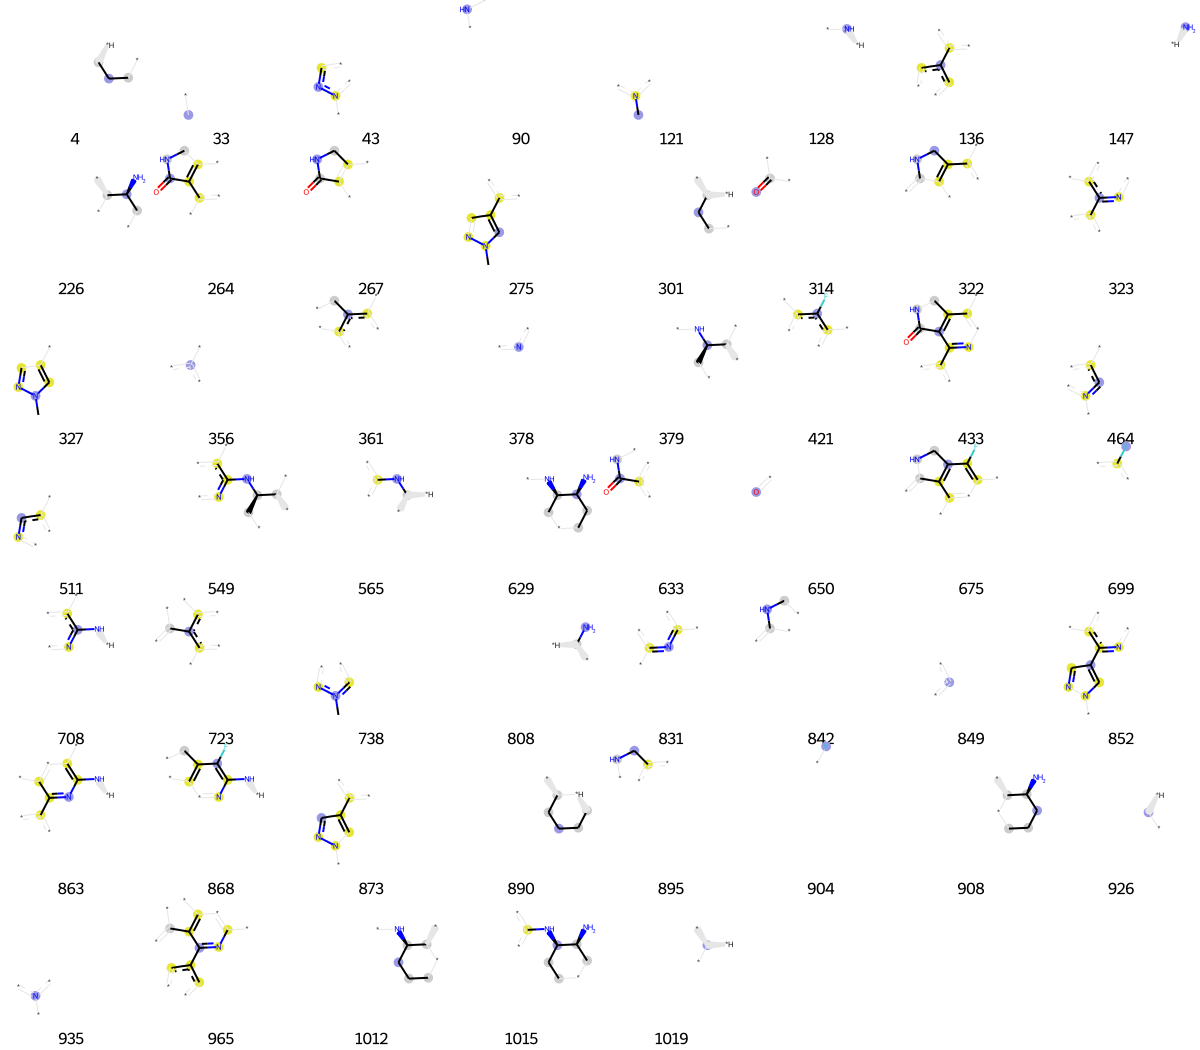

In [498]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [499]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[19,
 33,
 61,
 62,
 64,
 113,
 123,
 128,
 140,
 147,
 160,
 161,
 175,
 191,
 193,
 310,
 322,
 323,
 333,
 352,
 356,
 366,
 378,
 383,
 401,
 409,
 428,
 433,
 448,
 491,
 500,
 530,
 543,
 544,
 549,
 550,
 552,
 573,
 593,
 623,
 638,
 675,
 695,
 698,
 708,
 718,
 726,
 751,
 787,
 799,
 821,
 831,
 842,
 843,
 849,
 875,
 888,
 909,
 913,
 976,
 980,
 984,
 1008]

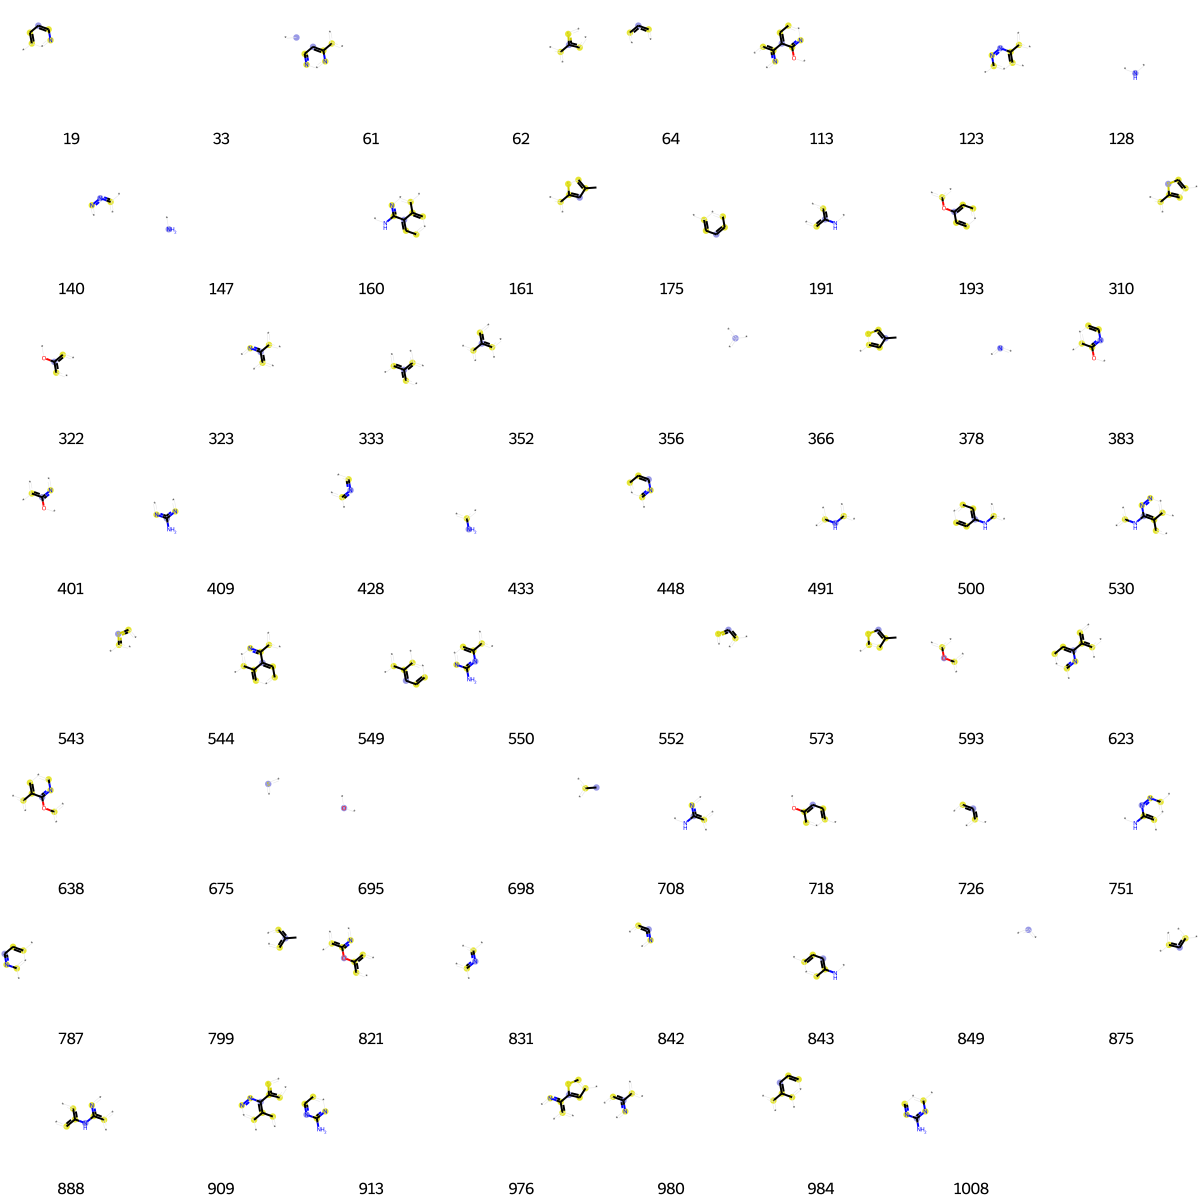

In [500]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [501]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[4,
 18,
 32,
 33,
 36,
 74,
 90,
 96,
 104,
 107,
 112,
 139,
 142,
 206,
 212,
 281,
 310,
 314,
 319,
 350,
 352,
 356,
 357,
 362,
 388,
 452,
 506,
 527,
 556,
 633,
 650,
 676,
 686,
 694,
 714,
 715,
 721,
 726,
 763,
 785,
 815,
 849,
 863,
 875,
 881,
 926,
 958,
 966]

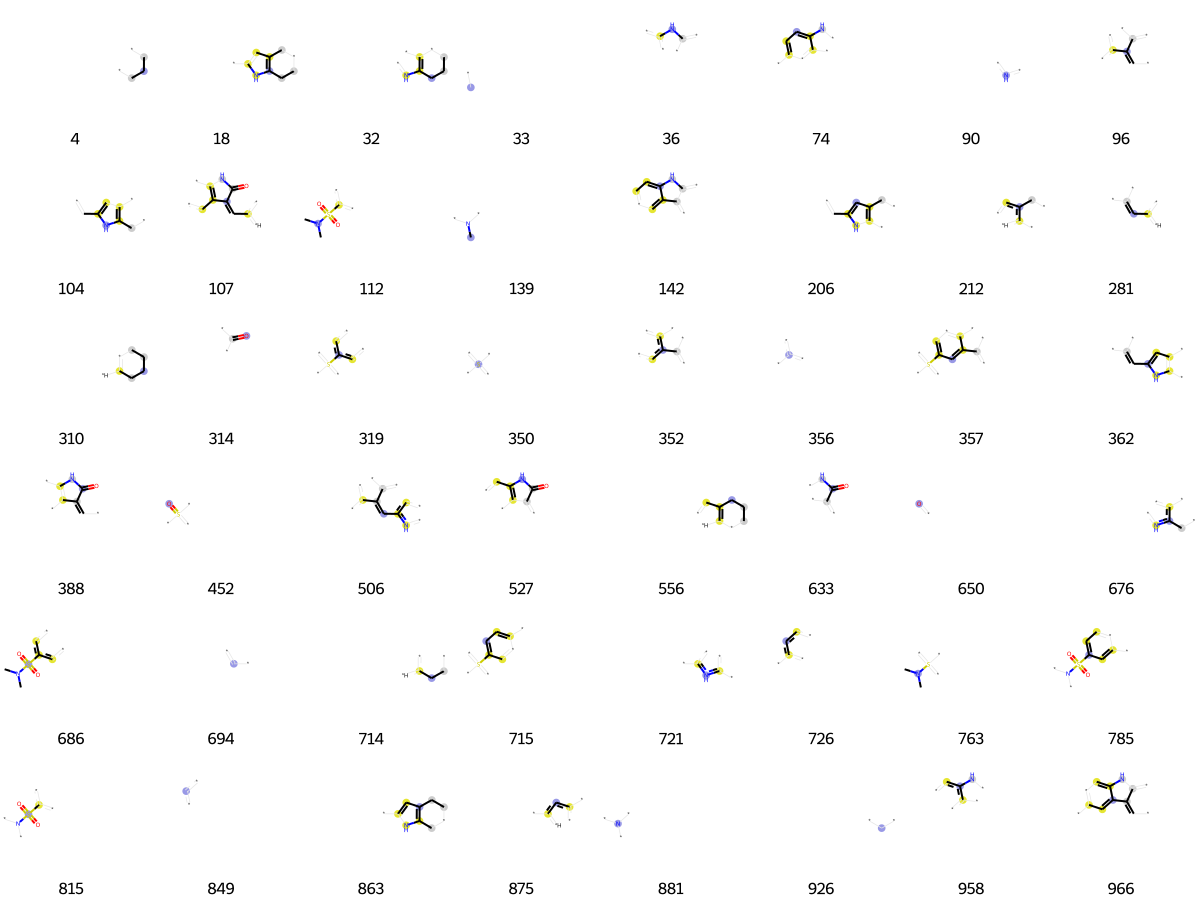

In [502]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [503]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[4,
 56,
 80,
 90,
 105,
 134,
 194,
 217,
 222,
 233,
 240,
 268,
 356,
 362,
 378,
 416,
 428,
 439,
 470,
 492,
 520,
 552,
 577,
 601,
 610,
 628,
 656,
 740,
 742,
 795,
 807,
 849,
 896,
 897,
 914,
 915,
 926,
 932,
 935,
 941,
 974,
 1019]

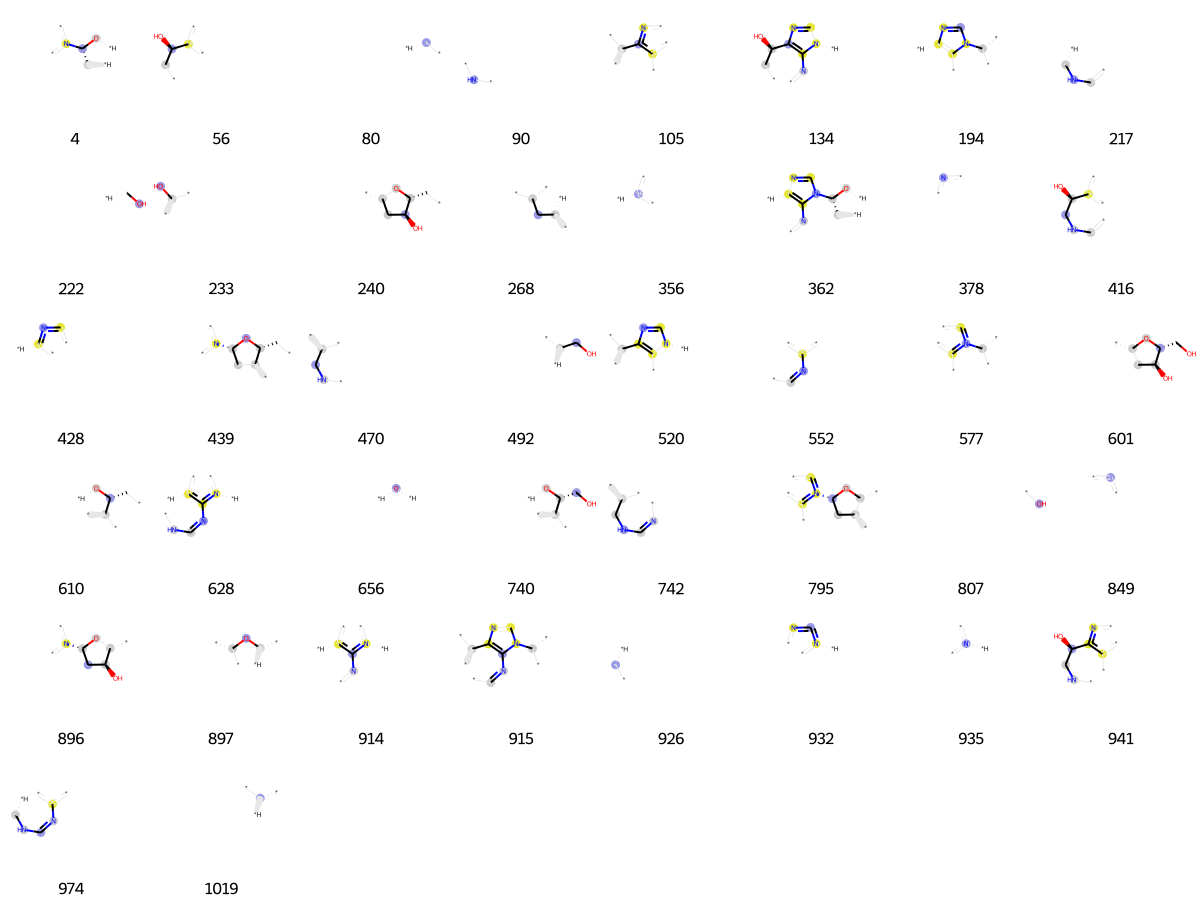

In [504]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [505]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[9,
 20,
 33,
 36,
 64,
 67,
 110,
 114,
 119,
 128,
 140,
 147,
 149,
 194,
 200,
 233,
 250,
 277,
 301,
 309,
 314,
 356,
 378,
 398,
 429,
 463,
 524,
 549,
 565,
 590,
 610,
 612,
 650,
 683,
 723,
 726,
 735,
 751,
 771,
 801,
 802,
 806,
 807,
 809,
 828,
 849,
 875,
 886,
 893,
 904,
 910,
 924,
 926,
 932,
 935,
 940,
 967,
 976,
 1019]

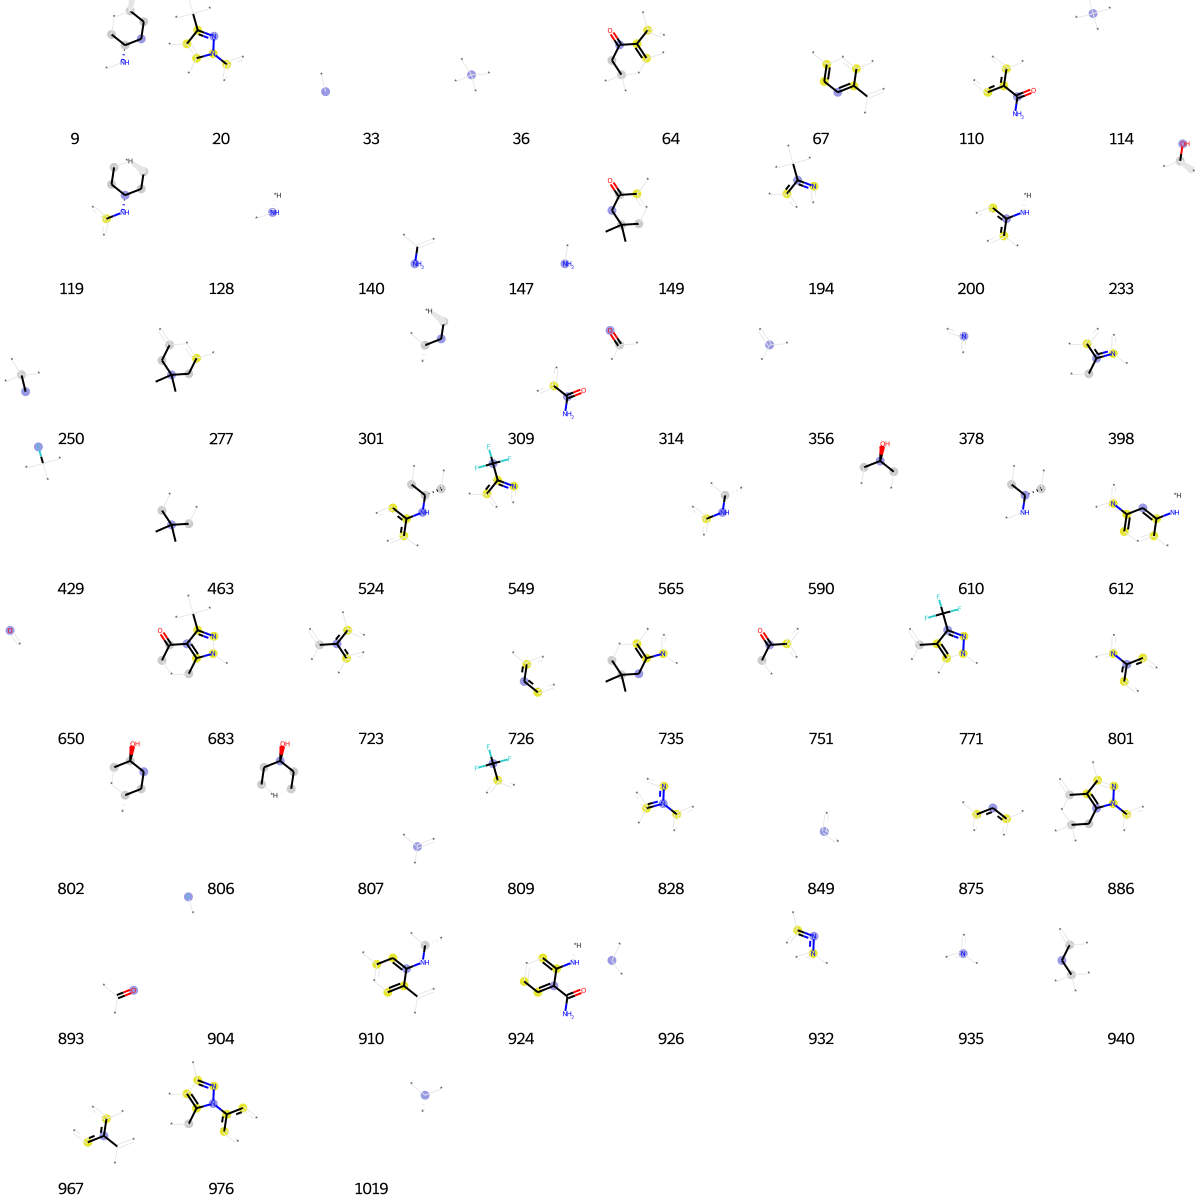

In [506]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [507]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 14,
 33,
 74,
 75,
 80,
 90,
 92,
 121,
 128,
 151,
 167,
 197,
 207,
 208,
 212,
 248,
 250,
 255,
 268,
 283,
 301,
 356,
 360,
 378,
 380,
 390,
 392,
 407,
 428,
 456,
 476,
 484,
 491,
 501,
 514,
 518,
 527,
 539,
 558,
 569,
 598,
 615,
 620,
 656,
 717,
 798,
 831,
 849,
 875,
 910,
 926,
 935,
 937,
 951,
 976,
 980,
 1019,
 1020]

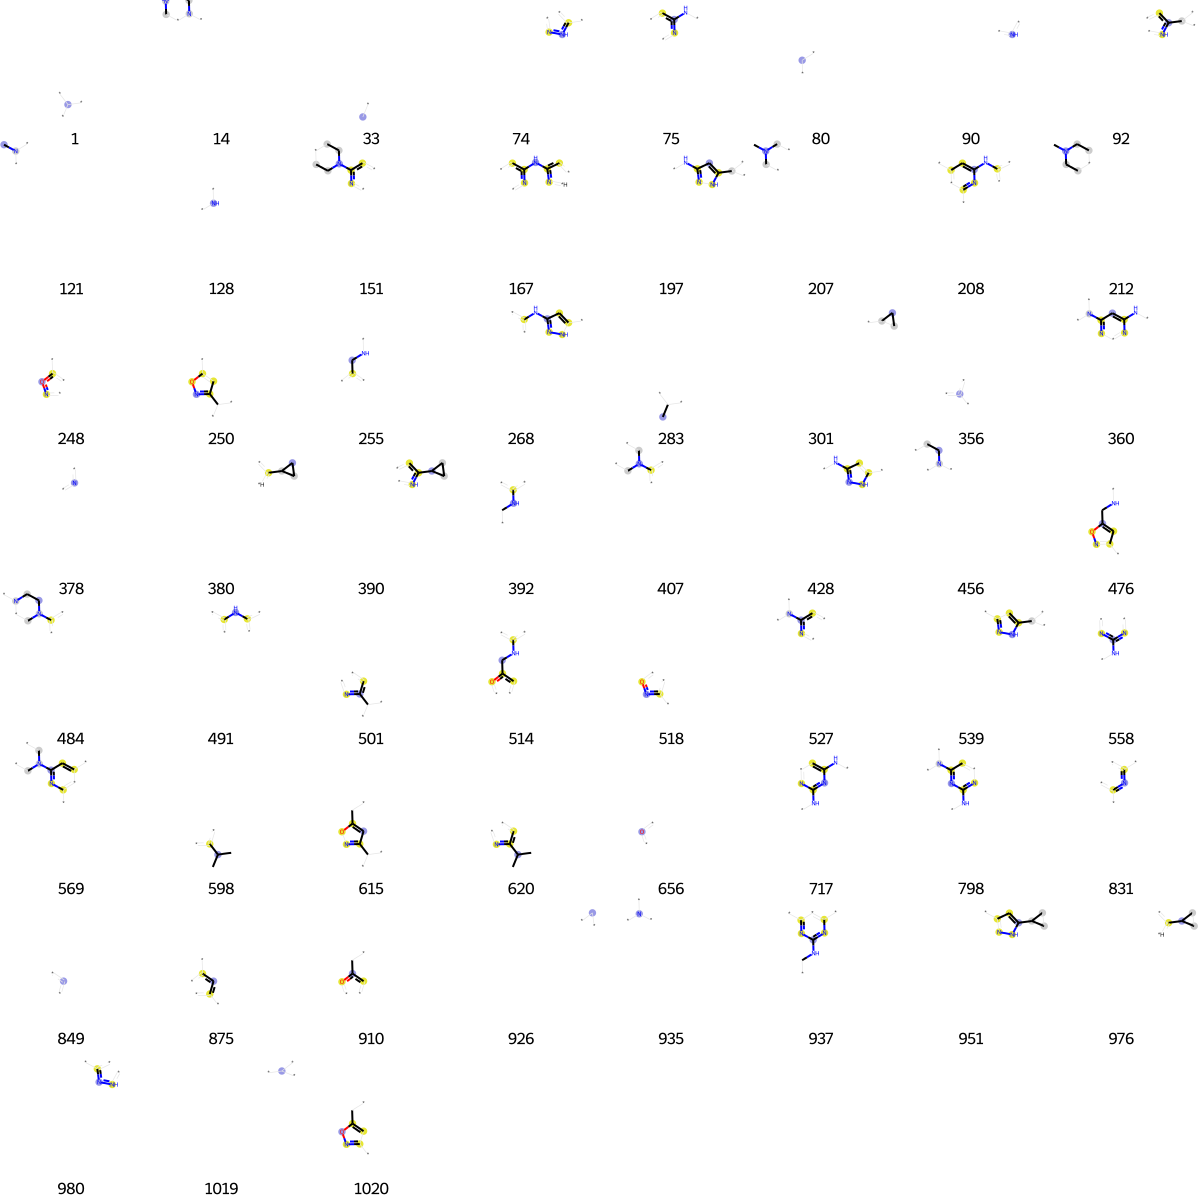

In [508]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [509]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 53,
 76,
 80,
 114,
 125,
 128,
 144,
 145,
 191,
 294,
 301,
 317,
 322,
 356,
 385,
 387,
 410,
 429,
 456,
 548,
 610,
 631,
 650,
 652,
 695,
 718,
 726,
 760,
 792,
 807,
 843,
 849,
 893,
 898,
 904,
 926,
 935,
 965,
 966,
 985,
 1009,
 1018,
 1019,
 1021]

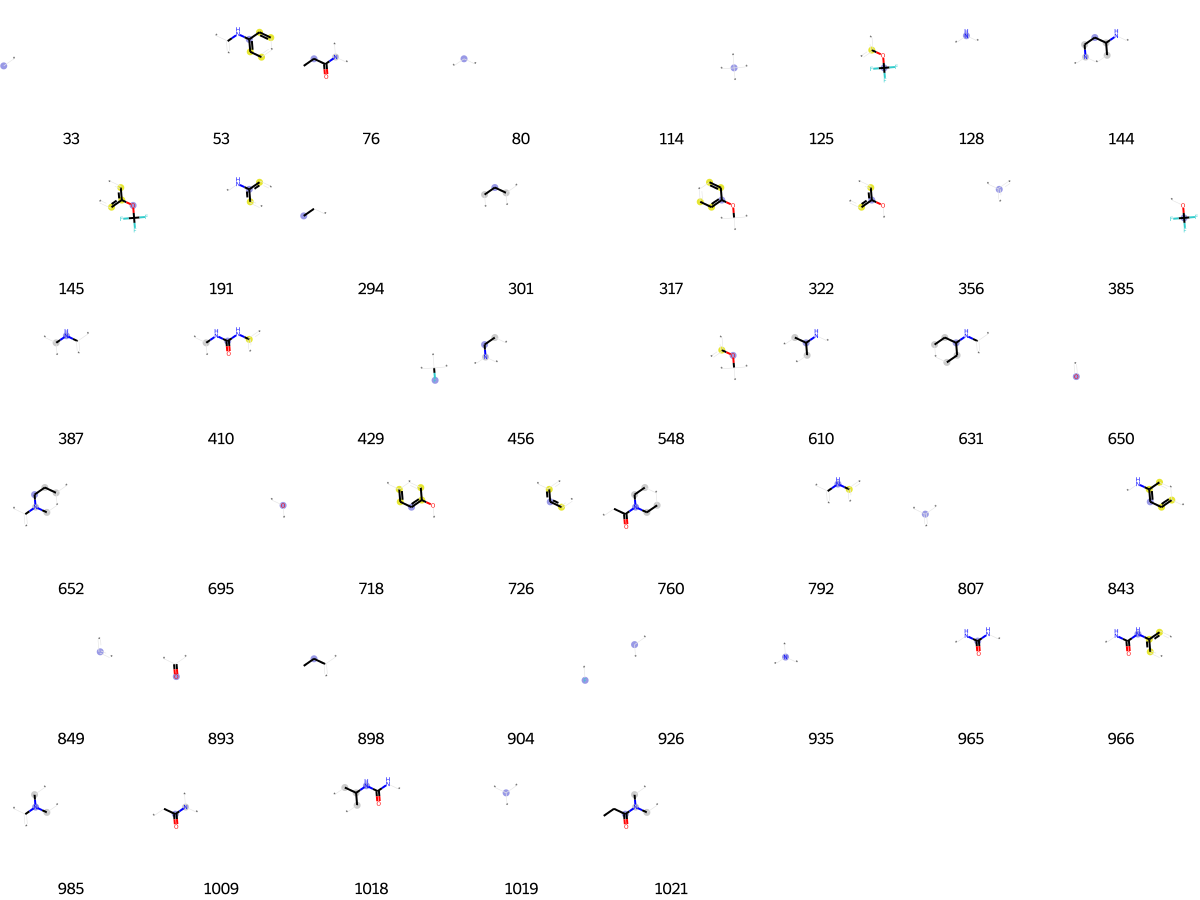

In [510]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [511]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[15,
 64,
 80,
 128,
 136,
 165,
 197,
 216,
 339,
 356,
 378,
 389,
 390,
 416,
 419,
 428,
 463,
 477,
 486,
 490,
 511,
 524,
 561,
 578,
 583,
 592,
 650,
 659,
 713,
 726,
 736,
 785,
 807,
 849,
 875,
 893,
 930,
 964,
 1006]

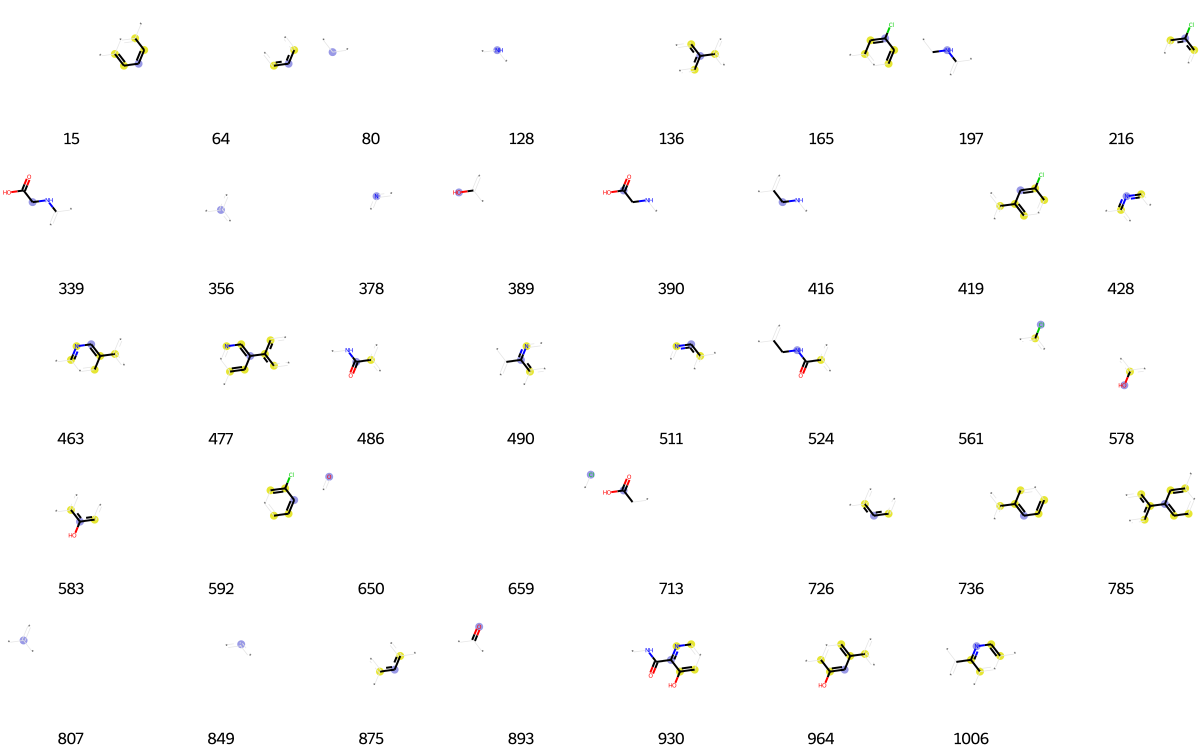

In [512]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [513]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[5,
 33,
 39,
 40,
 41,
 61,
 80,
 89,
 116,
 118,
 128,
 140,
 162,
 165,
 186,
 202,
 232,
 233,
 255,
 281,
 288,
 294,
 305,
 314,
 329,
 341,
 356,
 378,
 387,
 389,
 390,
 417,
 419,
 456,
 470,
 484,
 486,
 543,
 650,
 665,
 675,
 698,
 747,
 753,
 759,
 762,
 797,
 807,
 849,
 859,
 872,
 882,
 892,
 893,
 898,
 926,
 932,
 935,
 936,
 941,
 998,
 999,
 1019]

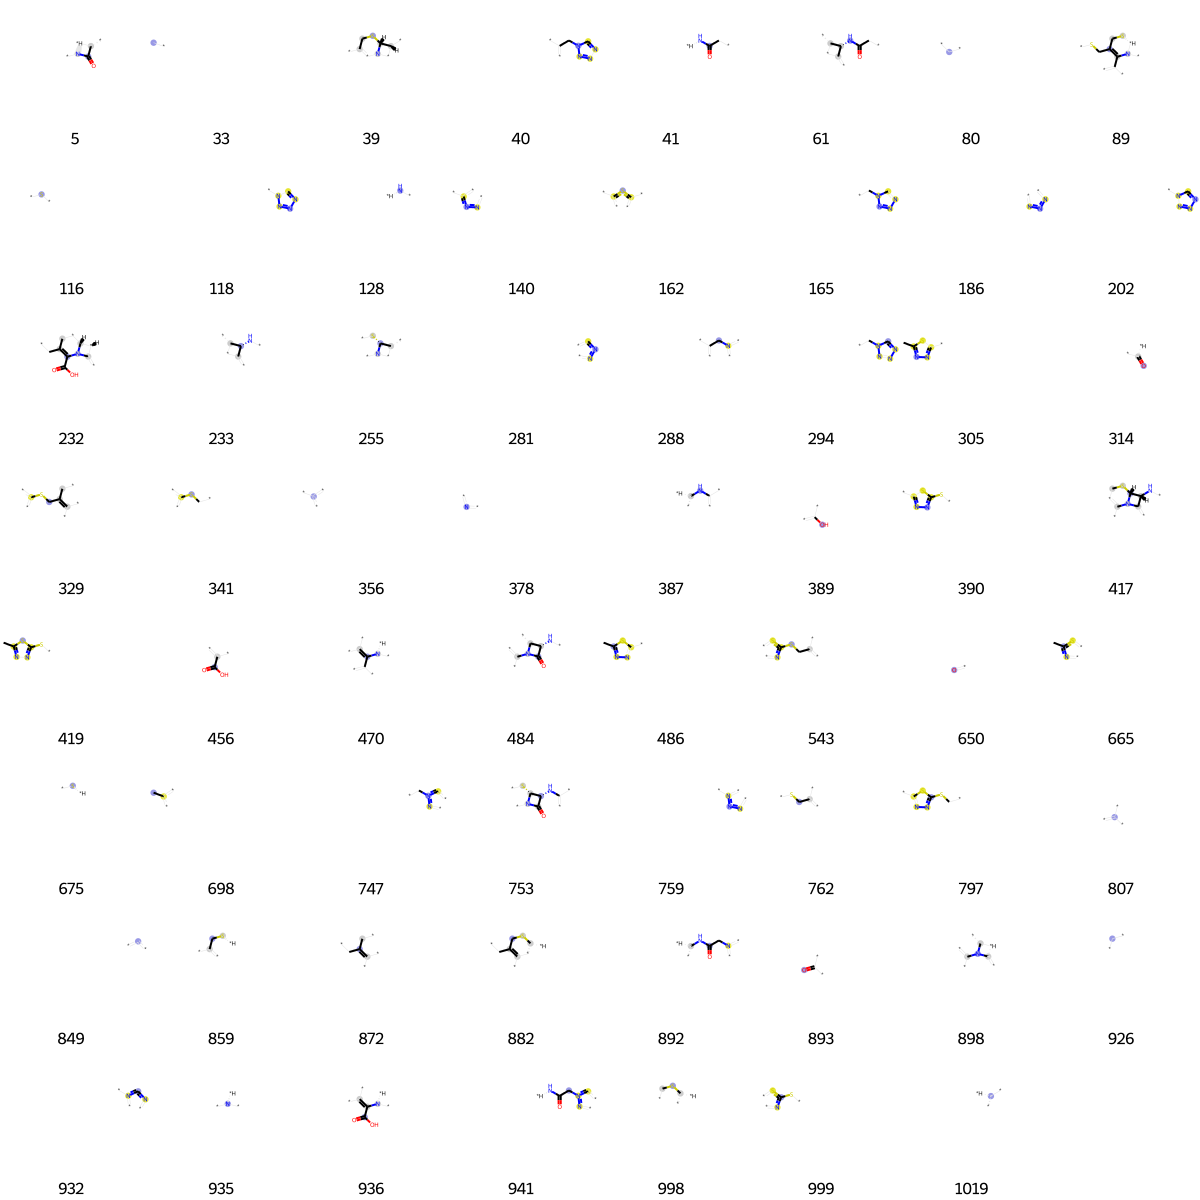

In [514]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [515]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 33,
 79,
 80,
 122,
 233,
 283,
 310,
 341,
 356,
 389,
 650,
 726,
 730,
 807,
 820,
 823,
 829,
 849,
 854,
 857,
 893,
 900,
 921,
 955]

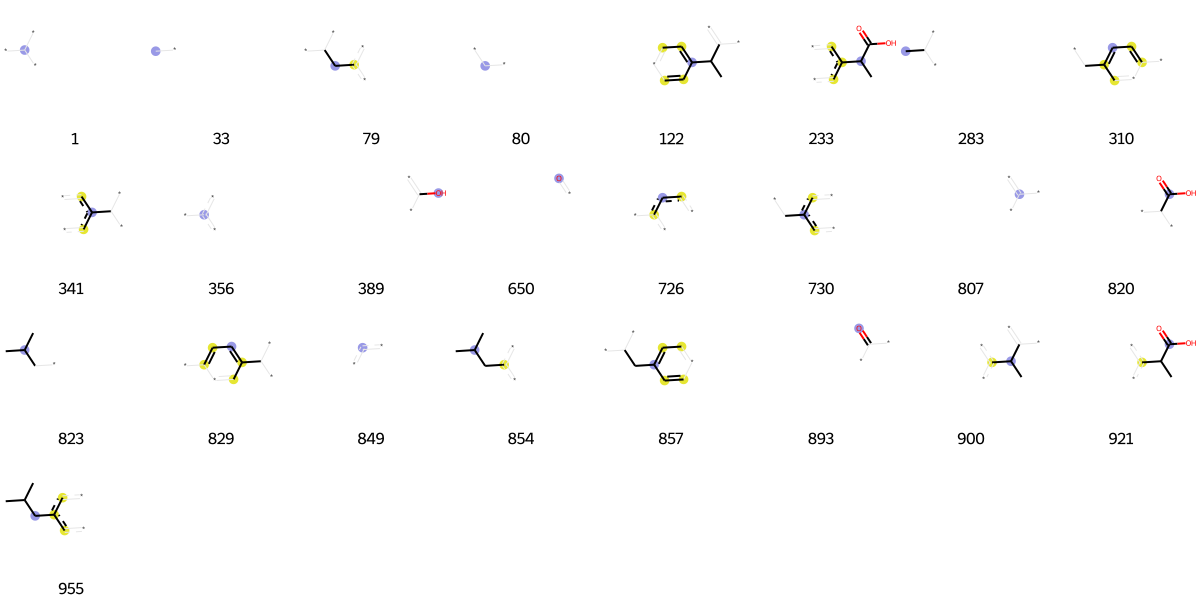

In [516]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [517]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[46,
 62,
 136,
 147,
 194,
 216,
 222,
 226,
 246,
 352,
 356,
 373,
 378,
 428,
 433,
 435,
 463,
 477,
 511,
 561,
 612,
 659,
 705,
 726,
 815,
 816,
 849,
 875,
 896,
 970]

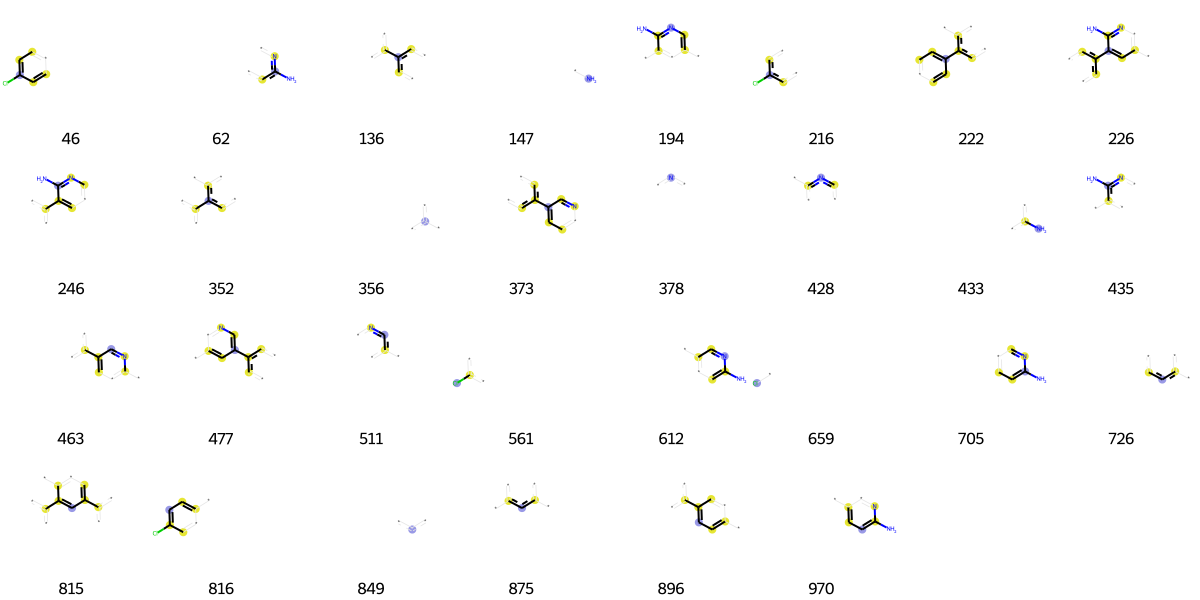

In [518]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [519]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[33,
 64,
 94,
 128,
 136,
 163,
 175,
 185,
 200,
 201,
 202,
 216,
 246,
 249,
 350,
 356,
 360,
 366,
 389,
 392,
 452,
 502,
 503,
 512,
 561,
 578,
 583,
 650,
 659,
 695,
 723,
 726,
 736,
 766,
 785,
 807,
 841,
 849,
 875,
 894,
 896,
 940,
 946,
 1006]

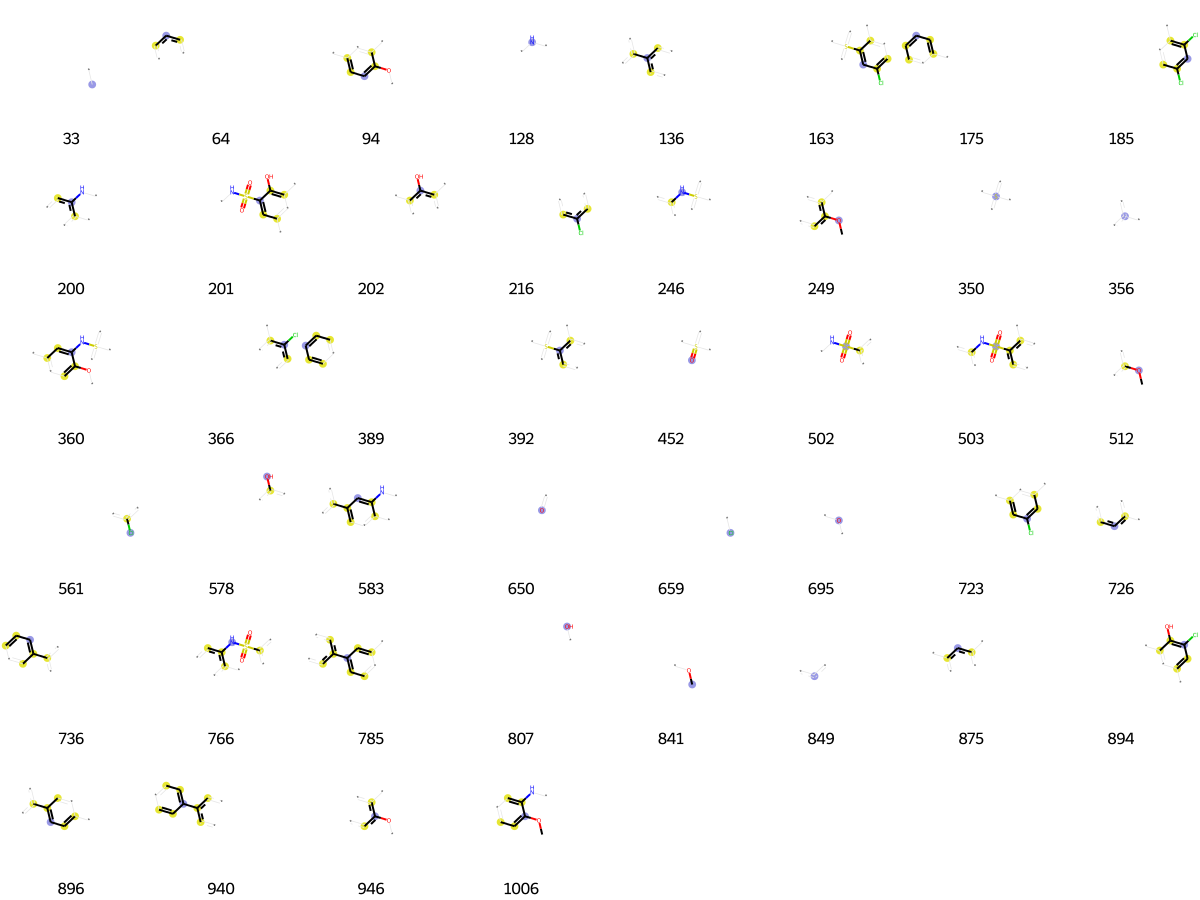

In [520]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [521]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 18,
 33,
 86,
 114,
 180,
 265,
 271,
 283,
 314,
 315,
 338,
 356,
 366,
 378,
 392,
 417,
 432,
 504,
 510,
 555,
 561,
 580,
 650,
 656,
 659,
 664,
 695,
 710,
 828,
 849,
 850,
 875,
 932,
 935,
 946,
 947,
 954,
 964,
 1004,
 1019]

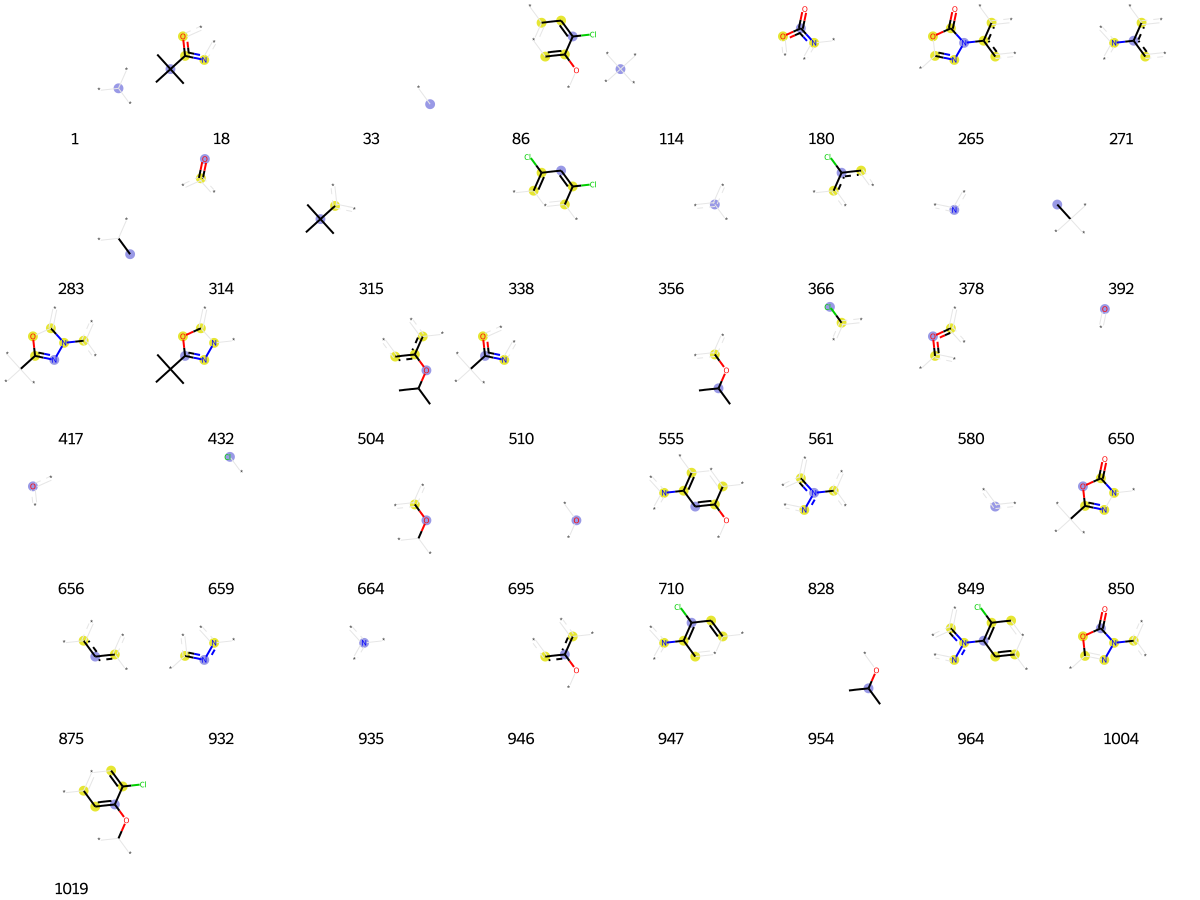

In [522]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [523]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[19,
 33,
 64,
 80,
 83,
 216,
 225,
 237,
 271,
 281,
 285,
 311,
 314,
 356,
 372,
 378,
 383,
 428,
 433,
 448,
 460,
 494,
 509,
 511,
 546,
 561,
 584,
 622,
 623,
 634,
 650,
 659,
 668,
 683,
 695,
 699,
 705,
 724,
 726,
 734,
 739,
 745,
 776,
 804,
 816,
 842,
 849,
 858,
 864,
 875,
 879,
 881,
 904,
 914,
 926,
 932,
 935,
 1019]

In [524]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 73,
 128,
 180,
 202,
 221,
 249,
 322,
 333,
 345,
 346,
 356,
 378,
 388,
 401,
 406,
 428,
 486,
 489,
 512,
 554,
 580,
 586,
 593,
 624,
 636,
 650,
 656,
 673,
 695,
 698,
 709,
 718,
 726,
 736,
 779,
 780,
 784,
 786,
 807,
 821,
 835,
 841,
 849,
 875,
 878,
 893,
 898,
 930,
 946,
 987]

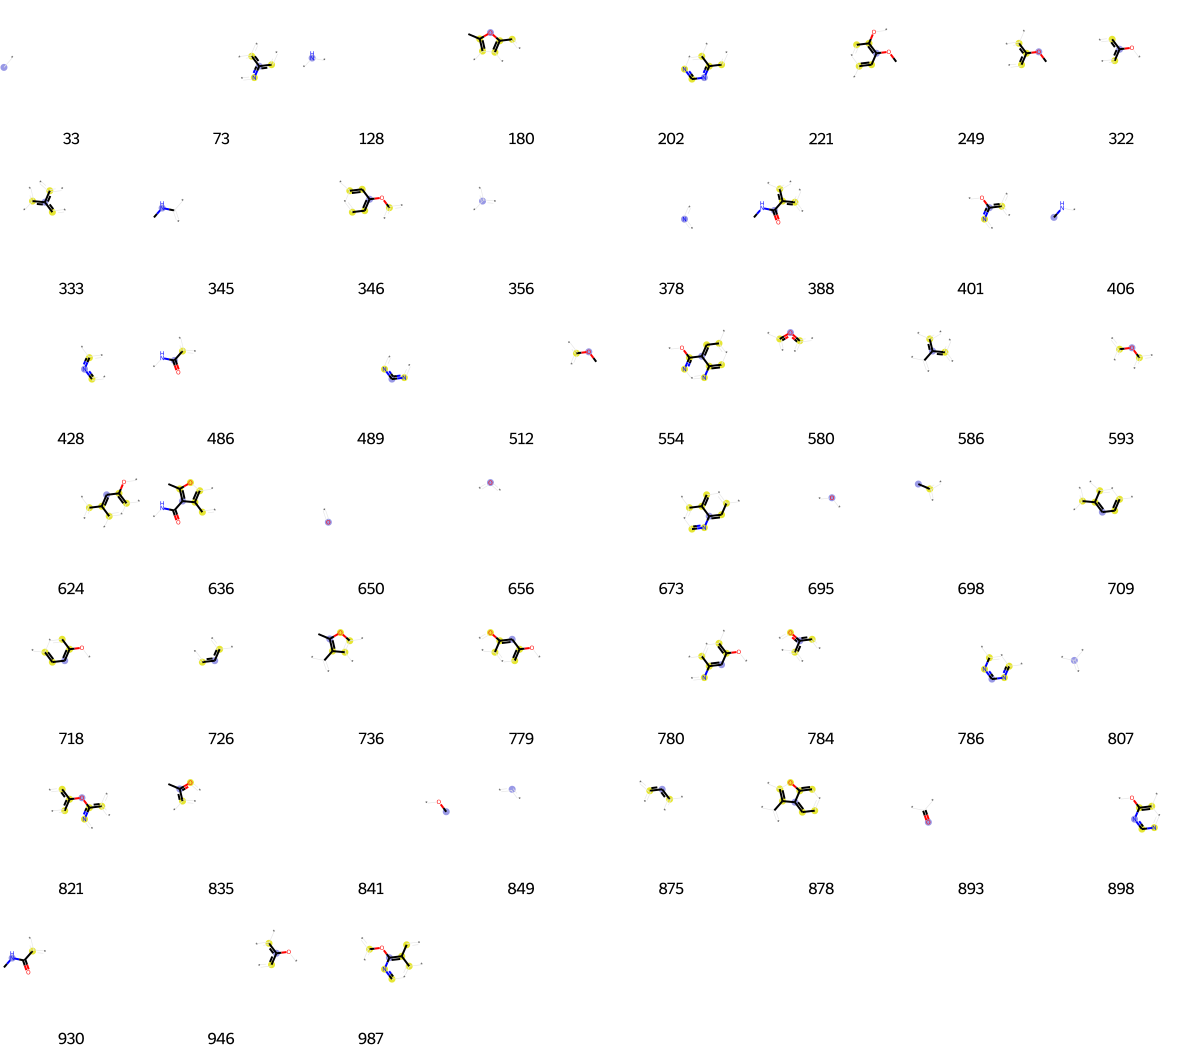

In [525]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [526]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[33,
 36,
 74,
 90,
 151,
 165,
 172,
 207,
 208,
 216,
 356,
 378,
 467,
 469,
 493,
 537,
 561,
 570,
 624,
 650,
 659,
 698,
 726,
 816,
 849,
 875,
 883,
 901,
 924,
 958]

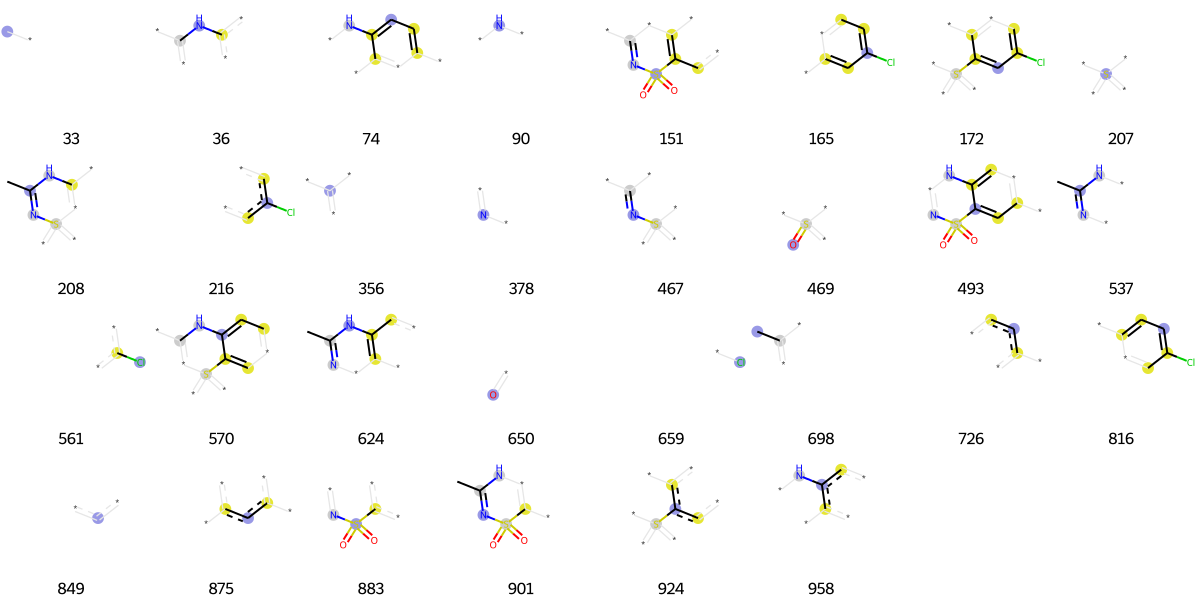

In [527]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [528]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[8,
 13,
 33,
 39,
 80,
 89,
 114,
 136,
 207,
 219,
 248,
 305,
 314,
 328,
 333,
 356,
 361,
 367,
 378,
 428,
 429,
 432,
 510,
 518,
 521,
 551,
 558,
 616,
 656,
 695,
 697,
 698,
 707,
 809,
 828,
 831,
 849,
 875,
 886,
 887,
 904,
 910,
 928,
 989,
 1020]

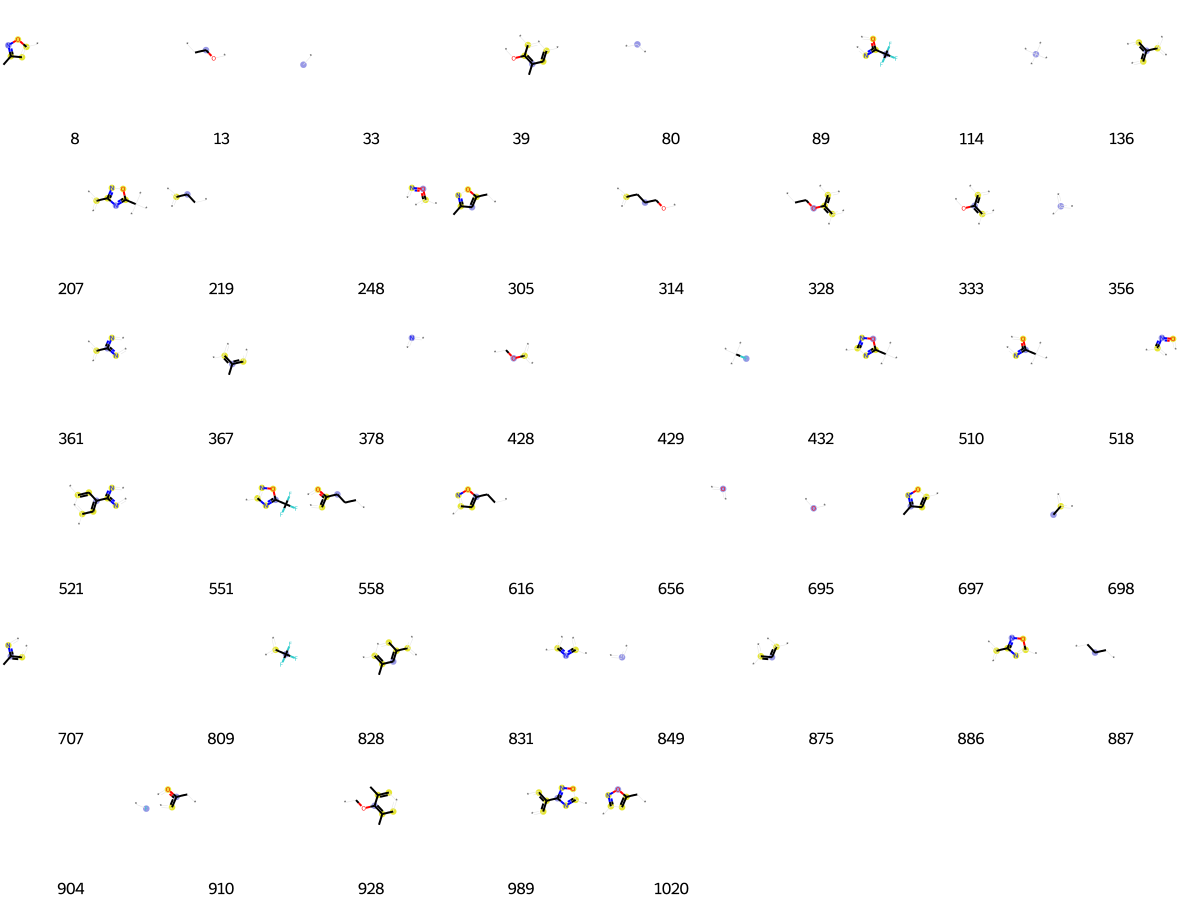

In [529]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [530]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[4,
 17,
 90,
 187,
 278,
 289,
 305,
 314,
 333,
 356,
 361,
 367,
 368,
 381,
 387,
 578,
 580,
 633,
 650,
 656,
 714,
 726,
 745,
 784,
 786,
 801,
 807,
 842,
 849,
 875,
 897,
 926,
 957,
 980,
 996,
 1004]

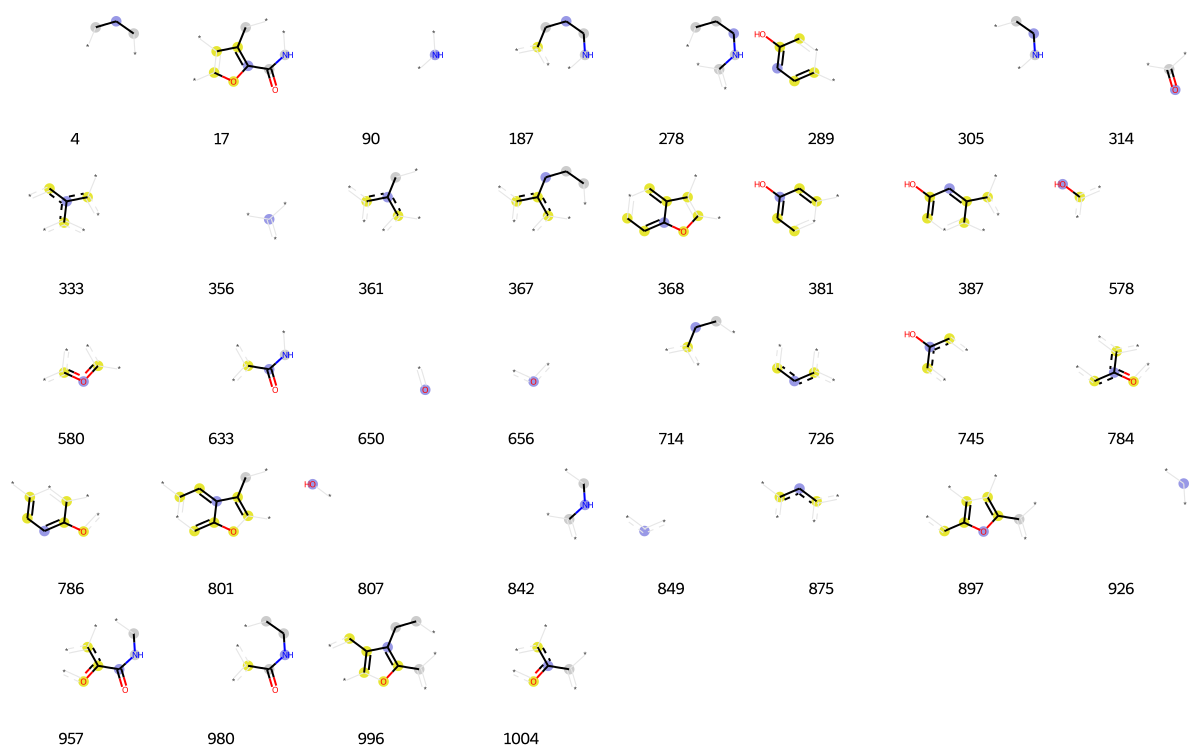

In [531]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [532]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[23,
 90,
 128,
 142,
 227,
 233,
 314,
 333,
 356,
 378,
 560,
 622,
 650,
 695,
 707,
 721,
 750,
 768,
 849,
 855,
 980,
 1002]

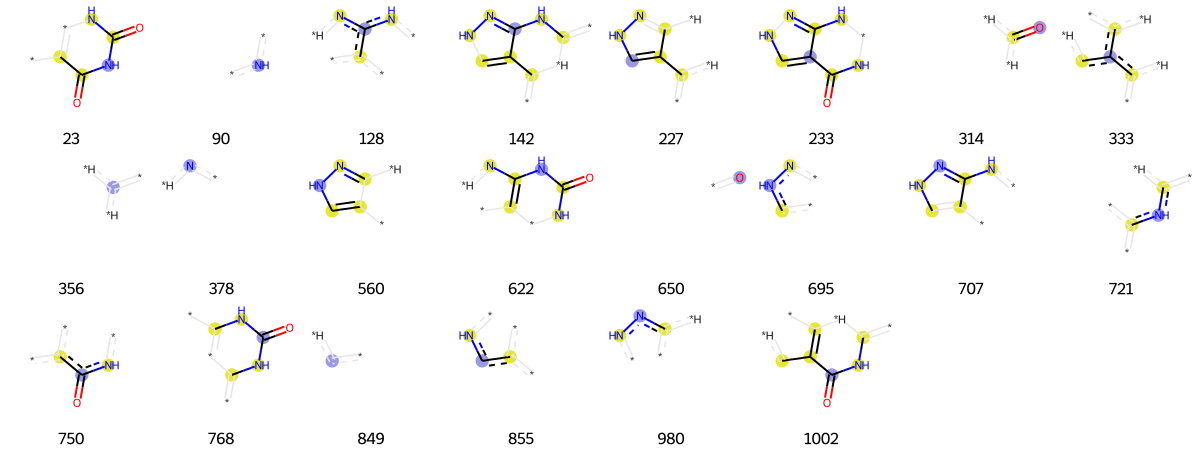

In [533]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [534]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 51,
 64,
 80,
 104,
 118,
 140,
 147,
 175,
 341,
 356,
 389,
 487,
 557,
 560,
 650,
 682,
 695,
 726,
 807,
 849,
 874,
 893,
 966]

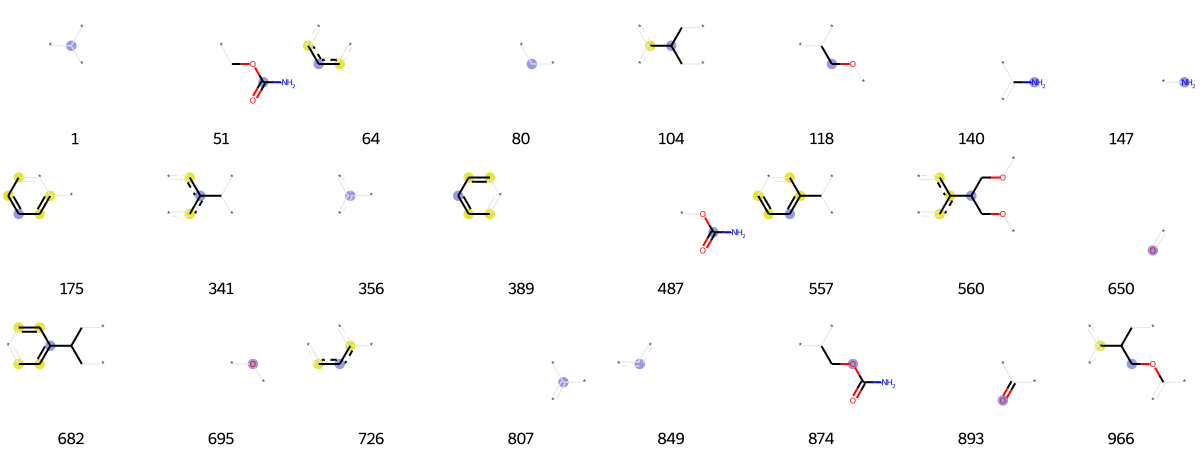

In [535]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [536]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[2,
 10,
 15,
 36,
 64,
 90,
 116,
 127,
 134,
 147,
 231,
 288,
 301,
 314,
 340,
 352,
 356,
 361,
 433,
 494,
 533,
 551,
 650,
 661,
 684,
 714,
 726,
 825,
 849,
 879,
 905,
 910,
 922,
 926,
 935,
 938,
 973,
 984,
 1019]

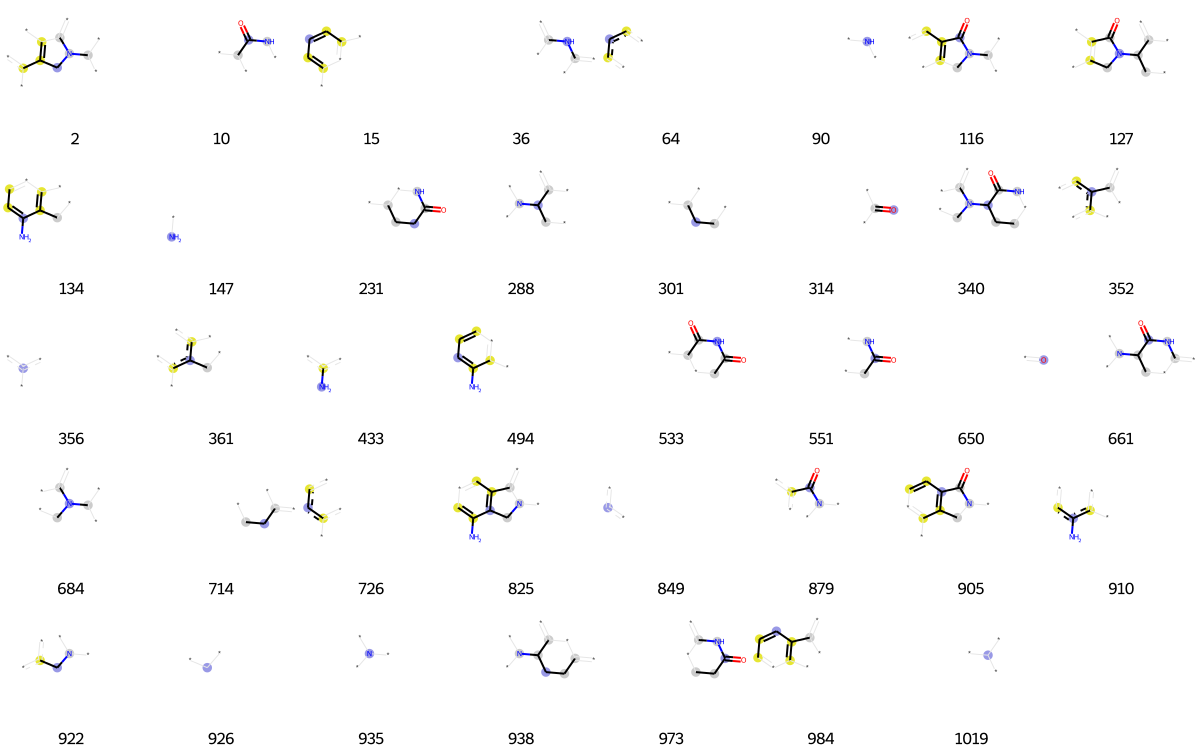

In [537]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [538]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[4,
 33,
 34,
 80,
 102,
 112,
 121,
 136,
 204,
 219,
 285,
 300,
 301,
 305,
 356,
 360,
 437,
 446,
 456,
 545,
 580,
 656,
 674,
 677,
 690,
 719,
 726,
 734,
 741,
 784,
 785,
 786,
 790,
 831,
 849,
 863,
 875,
 888,
 896,
 910,
 926,
 930,
 935,
 940,
 961,
 998,
 1015,
 1019]

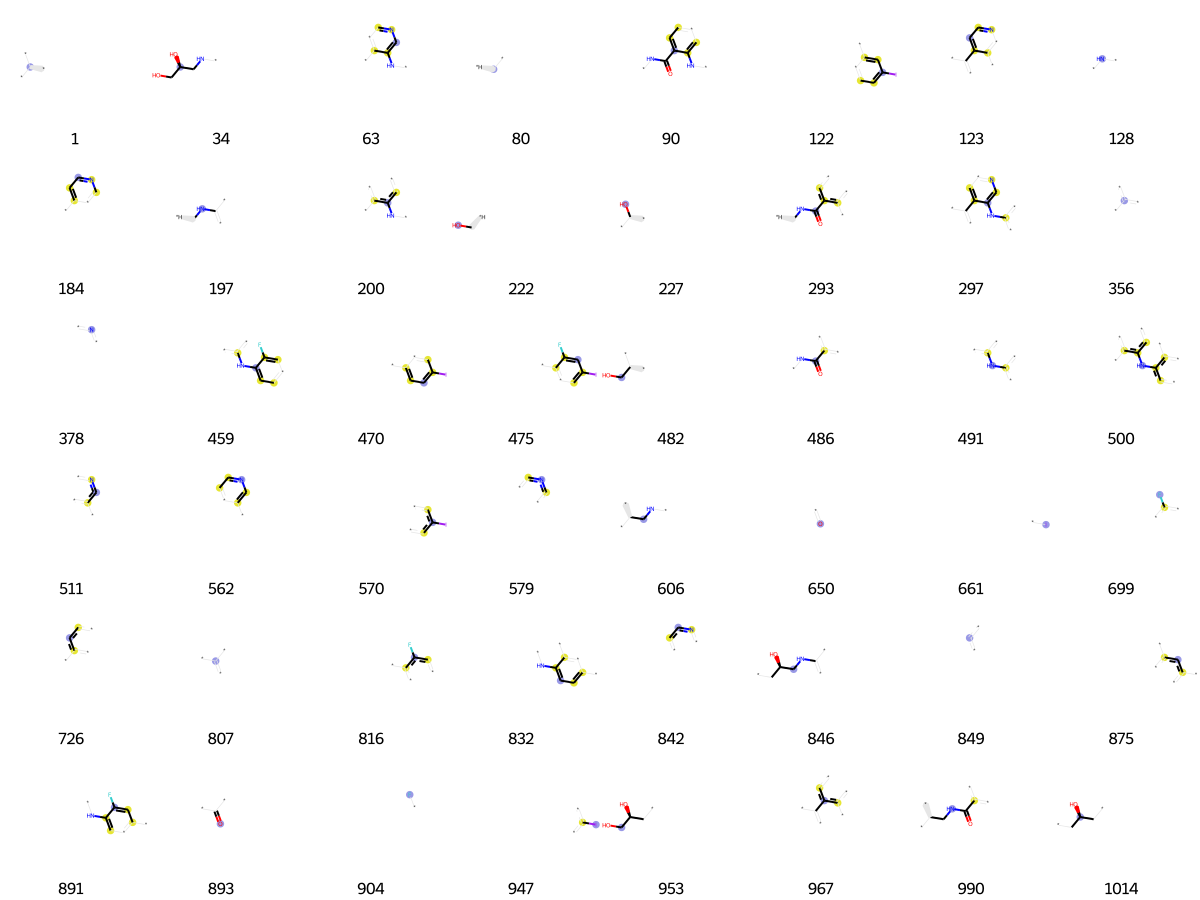

In [539]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [540]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[2,
 4,
 41,
 76,
 80,
 86,
 90,
 128,
 277,
 284,
 288,
 301,
 305,
 387,
 428,
 456,
 492,
 610,
 631,
 650,
 767,
 807,
 890,
 892,
 893,
 896,
 926,
 935,
 996,
 1019]

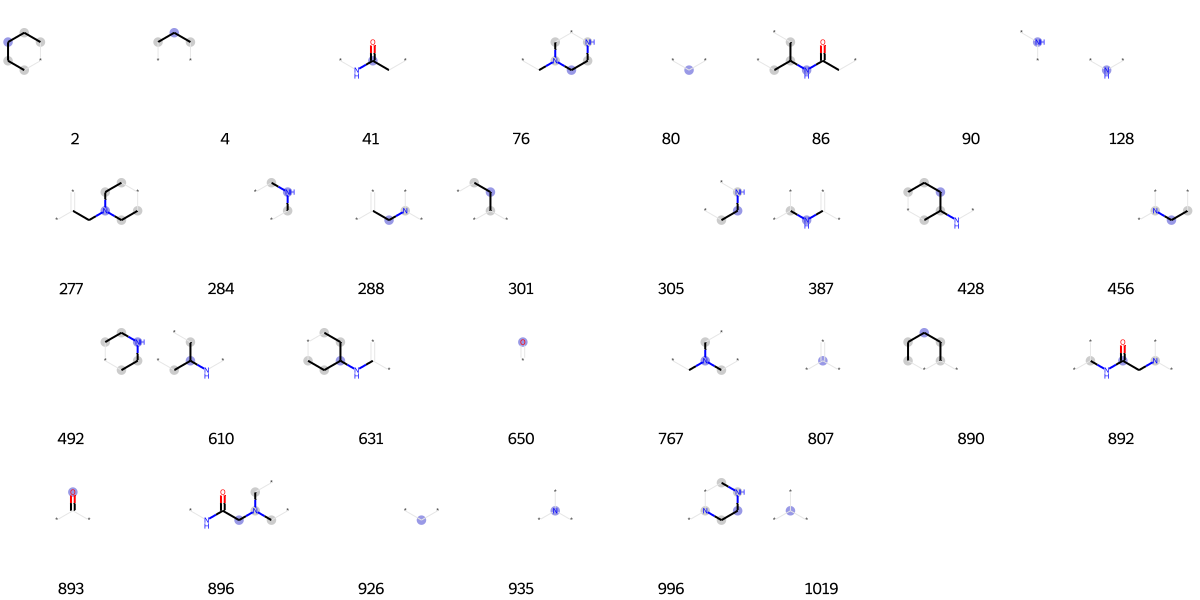

In [541]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [542]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[14,
 23,
 33,
 121,
 146,
 207,
 212,
 241,
 270,
 308,
 314,
 333,
 356,
 375,
 382,
 389,
 398,
 407,
 416,
 441,
 453,
 456,
 464,
 484,
 525,
 589,
 633,
 650,
 656,
 680,
 699,
 705,
 807,
 816,
 825,
 839,
 844,
 849,
 875,
 892,
 893,
 904,
 926,
 935,
 937,
 947,
 967,
 1009]

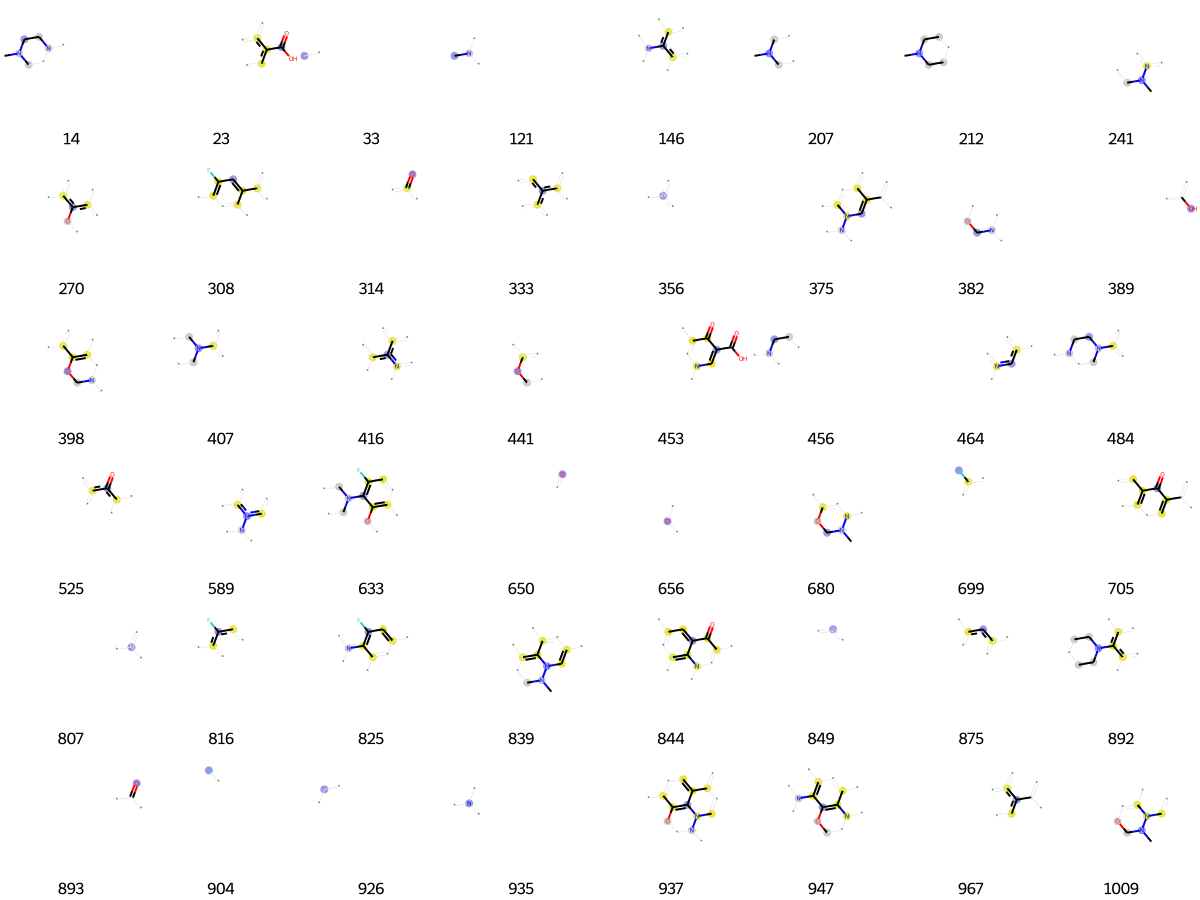

In [543]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [544]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 33,
 80,
 140,
 147,
 188,
 236,
 283,
 294,
 501,
 507,
 520,
 625,
 650,
 695,
 761,
 807,
 893,
 969]

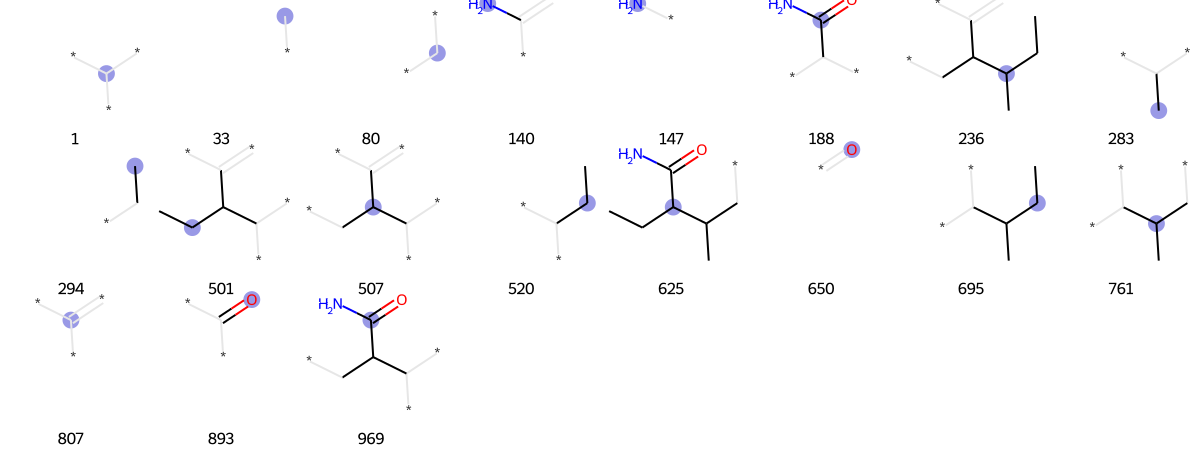

In [545]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [546]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[4,
 10,
 15,
 56,
 62,
 64,
 90,
 114,
 128,
 136,
 140,
 147,
 155,
 162,
 175,
 200,
 230,
 252,
 267,
 284,
 301,
 305,
 356,
 387,
 428,
 438,
 463,
 470,
 486,
 491,
 502,
 508,
 610,
 637,
 646,
 649,
 650,
 667,
 675,
 699,
 726,
 736,
 742,
 781,
 792,
 807,
 849,
 875,
 893,
 904,
 926,
 935,
 944,
 1019]

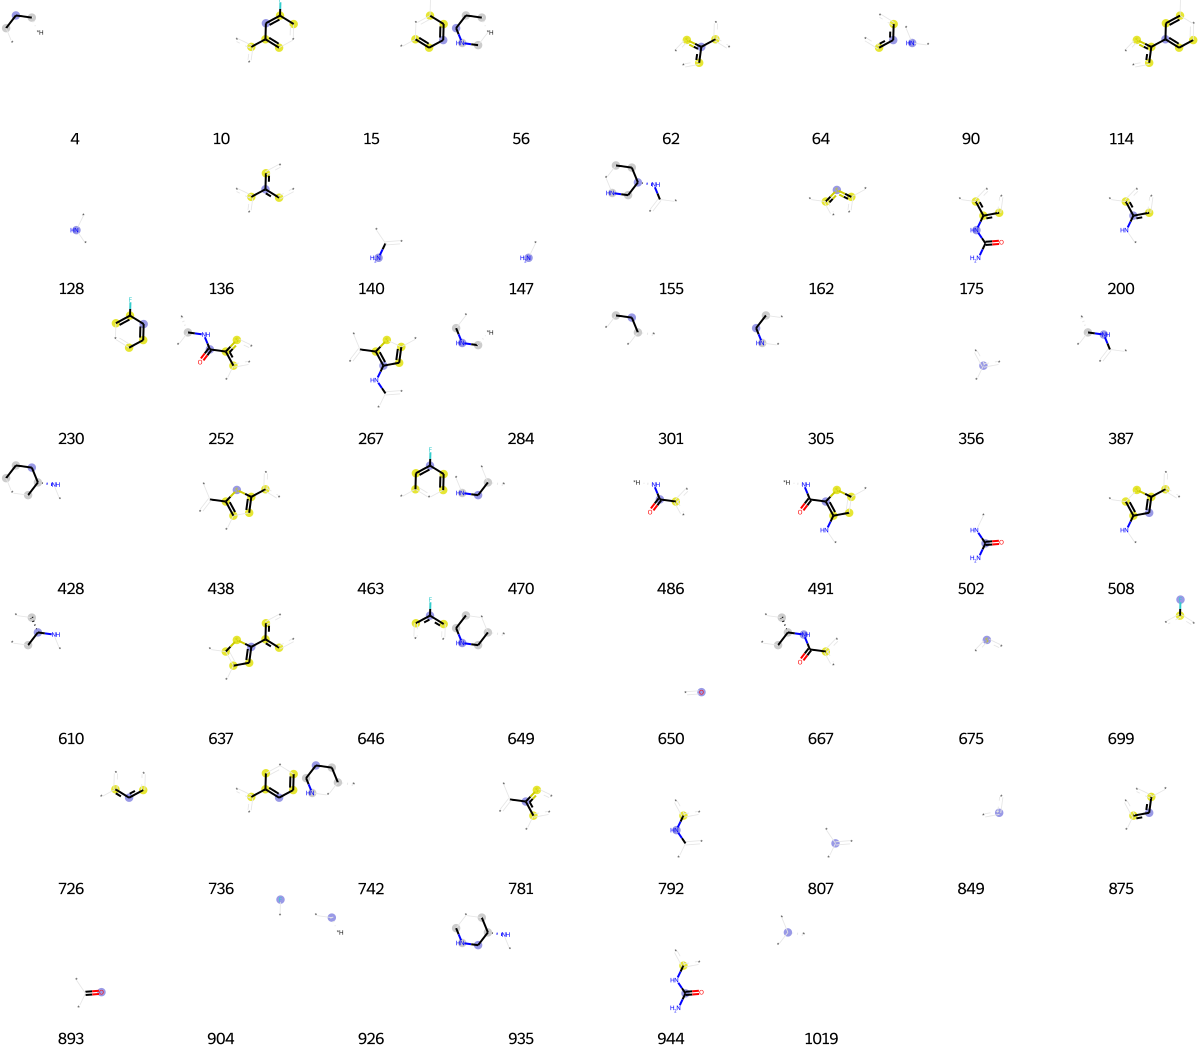

In [547]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [548]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[5,
 11,
 14,
 33,
 63,
 64,
 90,
 115,
 119,
 121,
 126,
 175,
 231,
 255,
 270,
 275,
 288,
 314,
 325,
 333,
 356,
 361,
 403,
 441,
 471,
 526,
 549,
 606,
 615,
 623,
 638,
 646,
 650,
 656,
 669,
 685,
 721,
 726,
 738,
 759,
 776,
 779,
 791,
 798,
 839,
 849,
 875,
 881,
 902,
 922,
 926,
 935,
 978,
 1019]

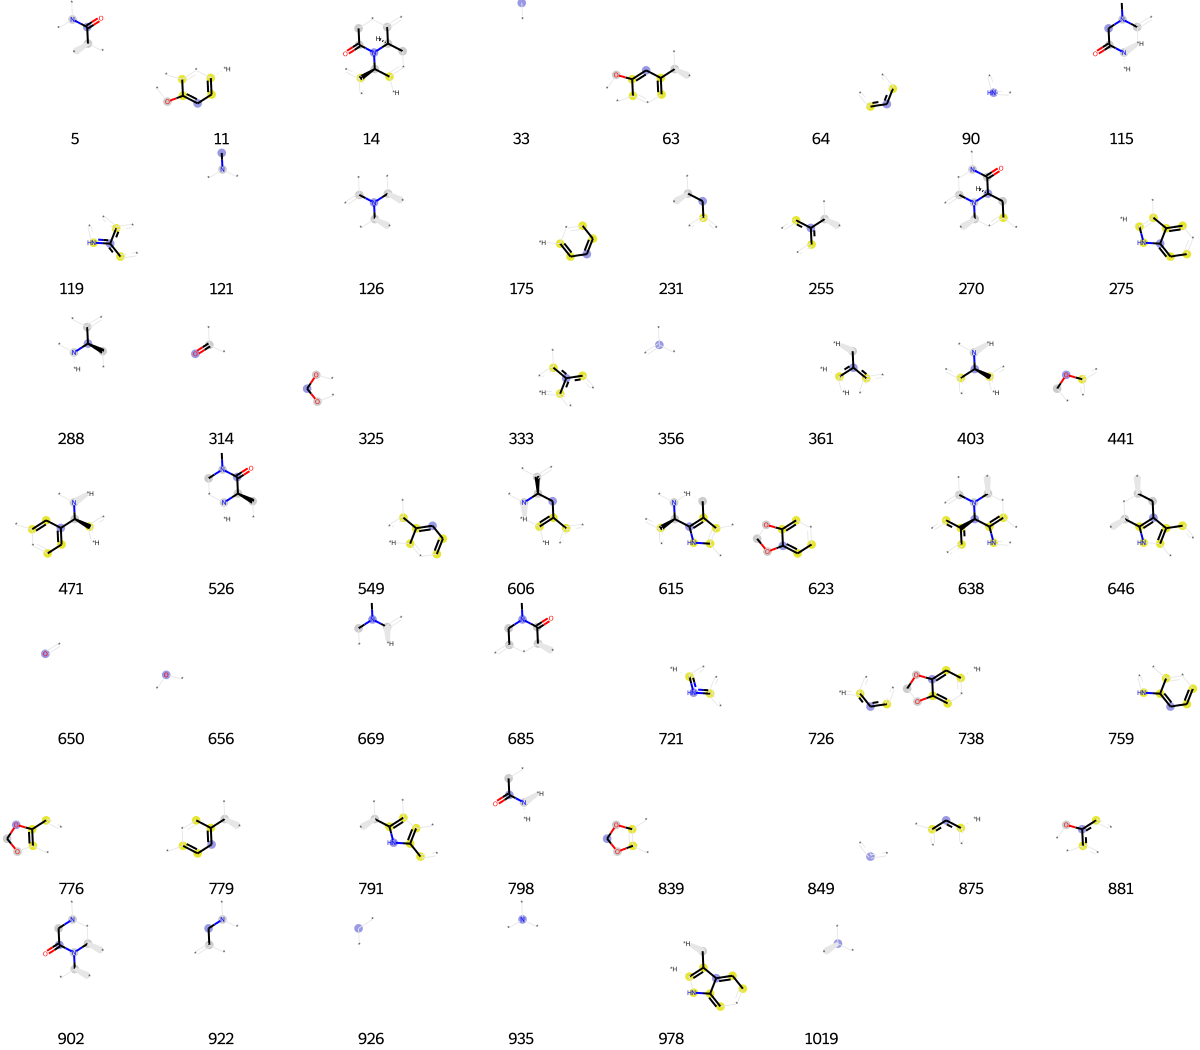

In [549]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [550]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[31,
 33,
 64,
 80,
 91,
 97,
 175,
 215,
 256,
 273,
 288,
 307,
 314,
 329,
 356,
 376,
 389,
 418,
 549,
 588,
 650,
 675,
 693,
 694,
 713,
 718,
 722,
 726,
 807,
 849,
 879,
 880,
 893,
 918,
 935,
 947,
 999,
 1009,
 1017,
 1020]

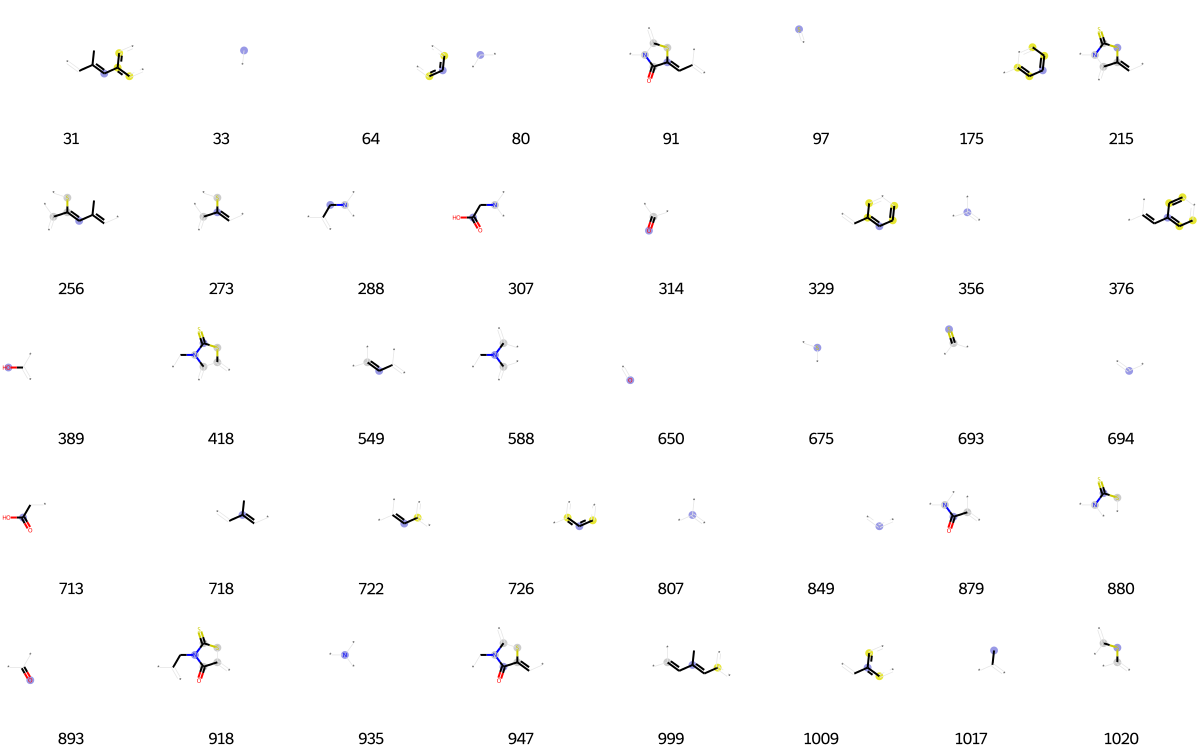

In [551]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [552]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[8,
 9,
 73,
 78,
 119,
 128,
 157,
 163,
 182,
 233,
 237,
 241,
 244,
 301,
 356,
 378,
 381,
 422,
 428,
 484,
 491,
 511,
 523,
 544,
 558,
 565,
 587,
 590,
 610,
 646,
 656,
 672,
 699,
 716,
 735,
 738,
 754,
 767,
 802,
 806,
 807,
 816,
 831,
 849,
 875,
 886,
 899,
 904,
 910,
 926,
 933,
 935,
 940,
 950,
 1019]

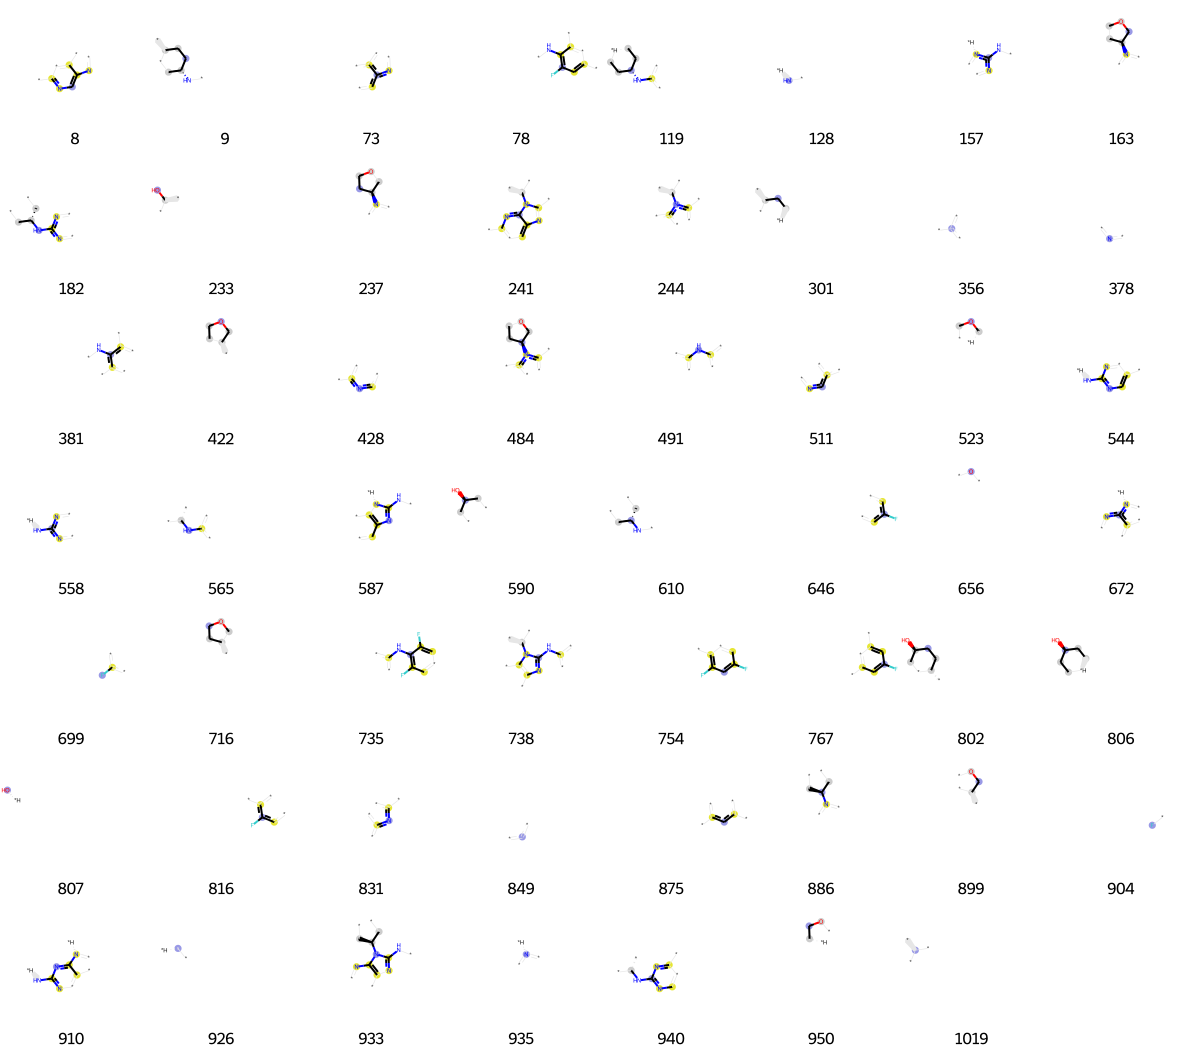

In [553]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [554]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 36,
 37,
 61,
 80,
 84,
 106,
 113,
 129,
 147,
 170,
 175,
 182,
 233,
 250,
 264,
 268,
 285,
 294,
 301,
 314,
 356,
 362,
 404,
 412,
 414,
 424,
 450,
 504,
 519,
 532,
 534,
 547,
 600,
 611,
 631,
 639,
 650,
 659,
 679,
 687,
 693,
 695,
 711,
 714,
 760,
 767,
 787,
 807,
 826,
 849,
 866,
 893,
 898,
 926,
 942,
 951,
 967,
 973,
 980,
 997,
 1002,
 1019]

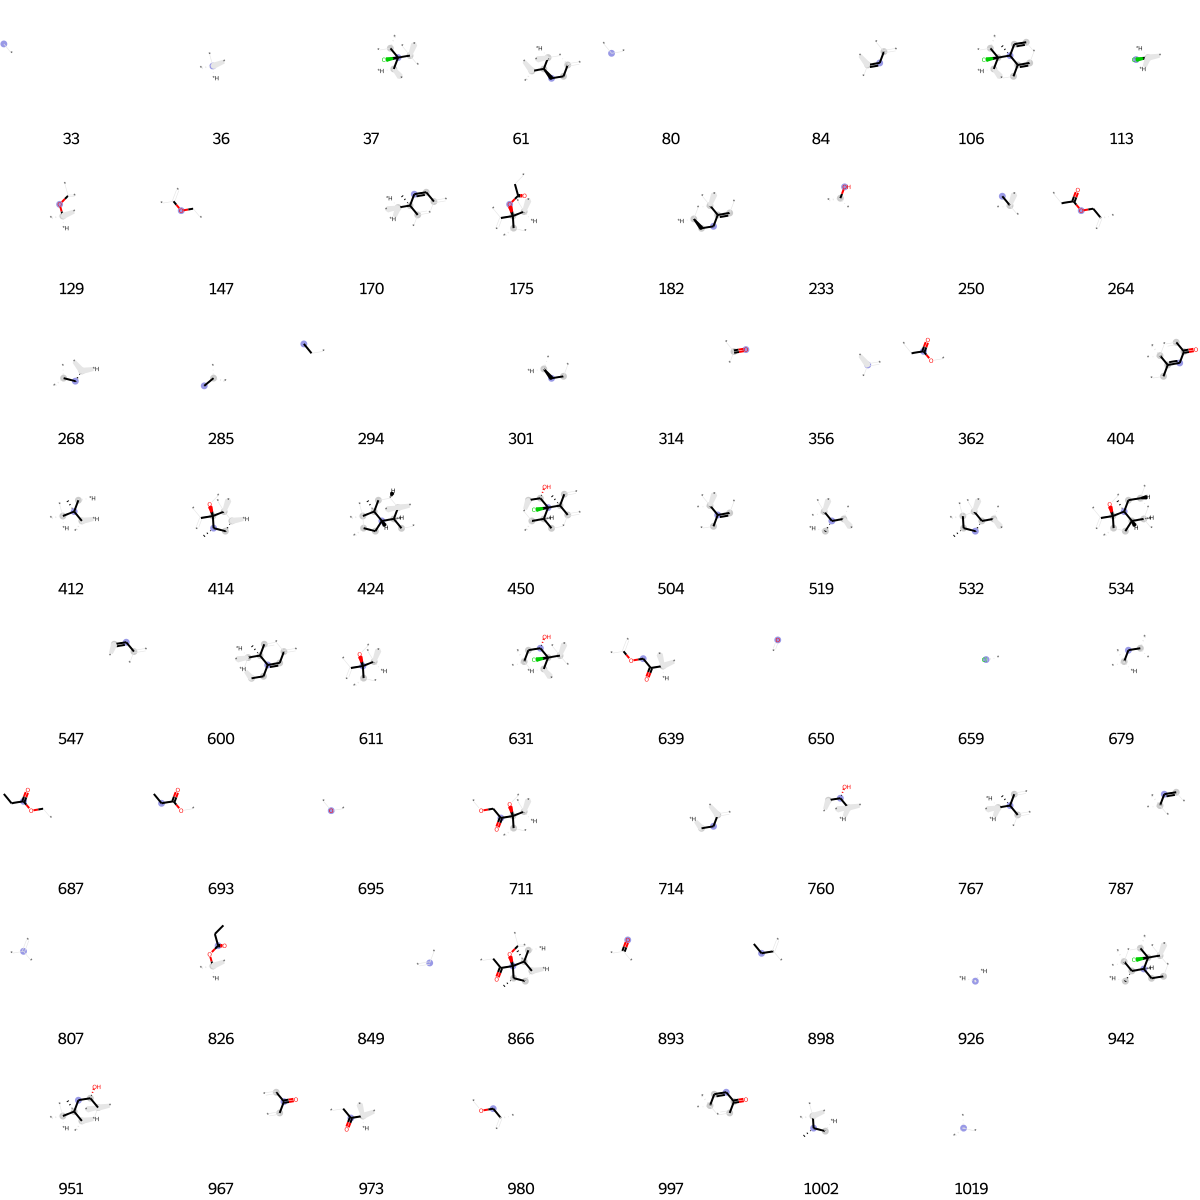

In [555]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [556]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 80,
 86,
 119,
 243,
 263,
 294,
 389,
 420,
 540,
 591,
 650,
 713,
 794,
 807,
 887,
 893]

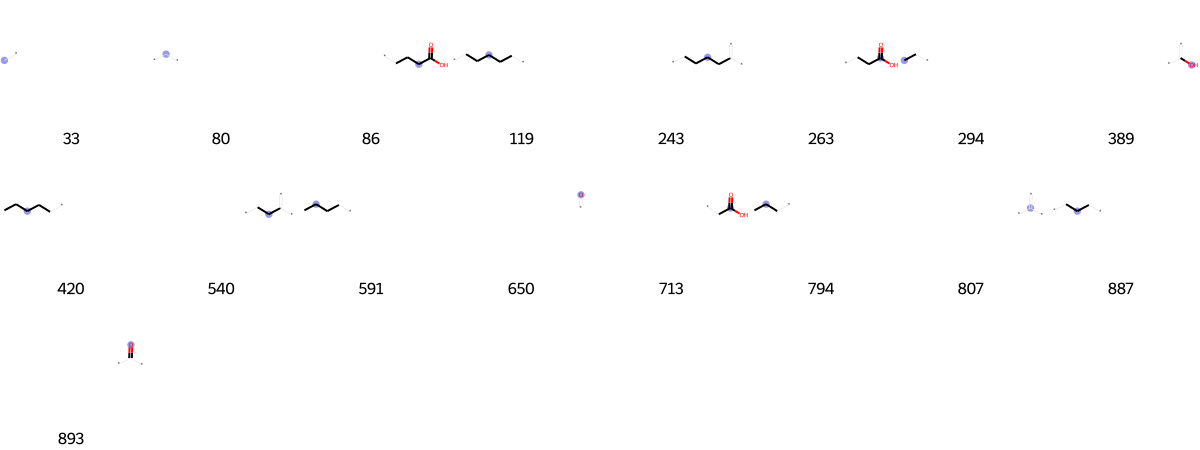

In [557]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [558]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 4,
 10,
 13,
 33,
 53,
 65,
 78,
 79,
 80,
 84,
 99,
 102,
 114,
 121,
 128,
 136,
 144,
 191,
 217,
 248,
 257,
 269,
 271,
 282,
 283,
 294,
 301,
 322,
 356,
 362,
 378,
 394,
 424,
 428,
 431,
 438,
 456,
 486,
 499,
 511,
 515,
 526,
 530,
 579,
 591,
 625,
 638,
 646,
 650,
 672,
 676,
 691,
 695,
 710,
 714,
 715,
 718,
 726,
 781,
 785,
 788,
 792,
 794,
 807,
 818,
 820,
 823,
 843,
 849,
 862,
 875,
 887,
 891,
 893,
 896,
 898,
 926,
 932,
 935,
 940,
 941,
 952,
 954,
 967,
 968]

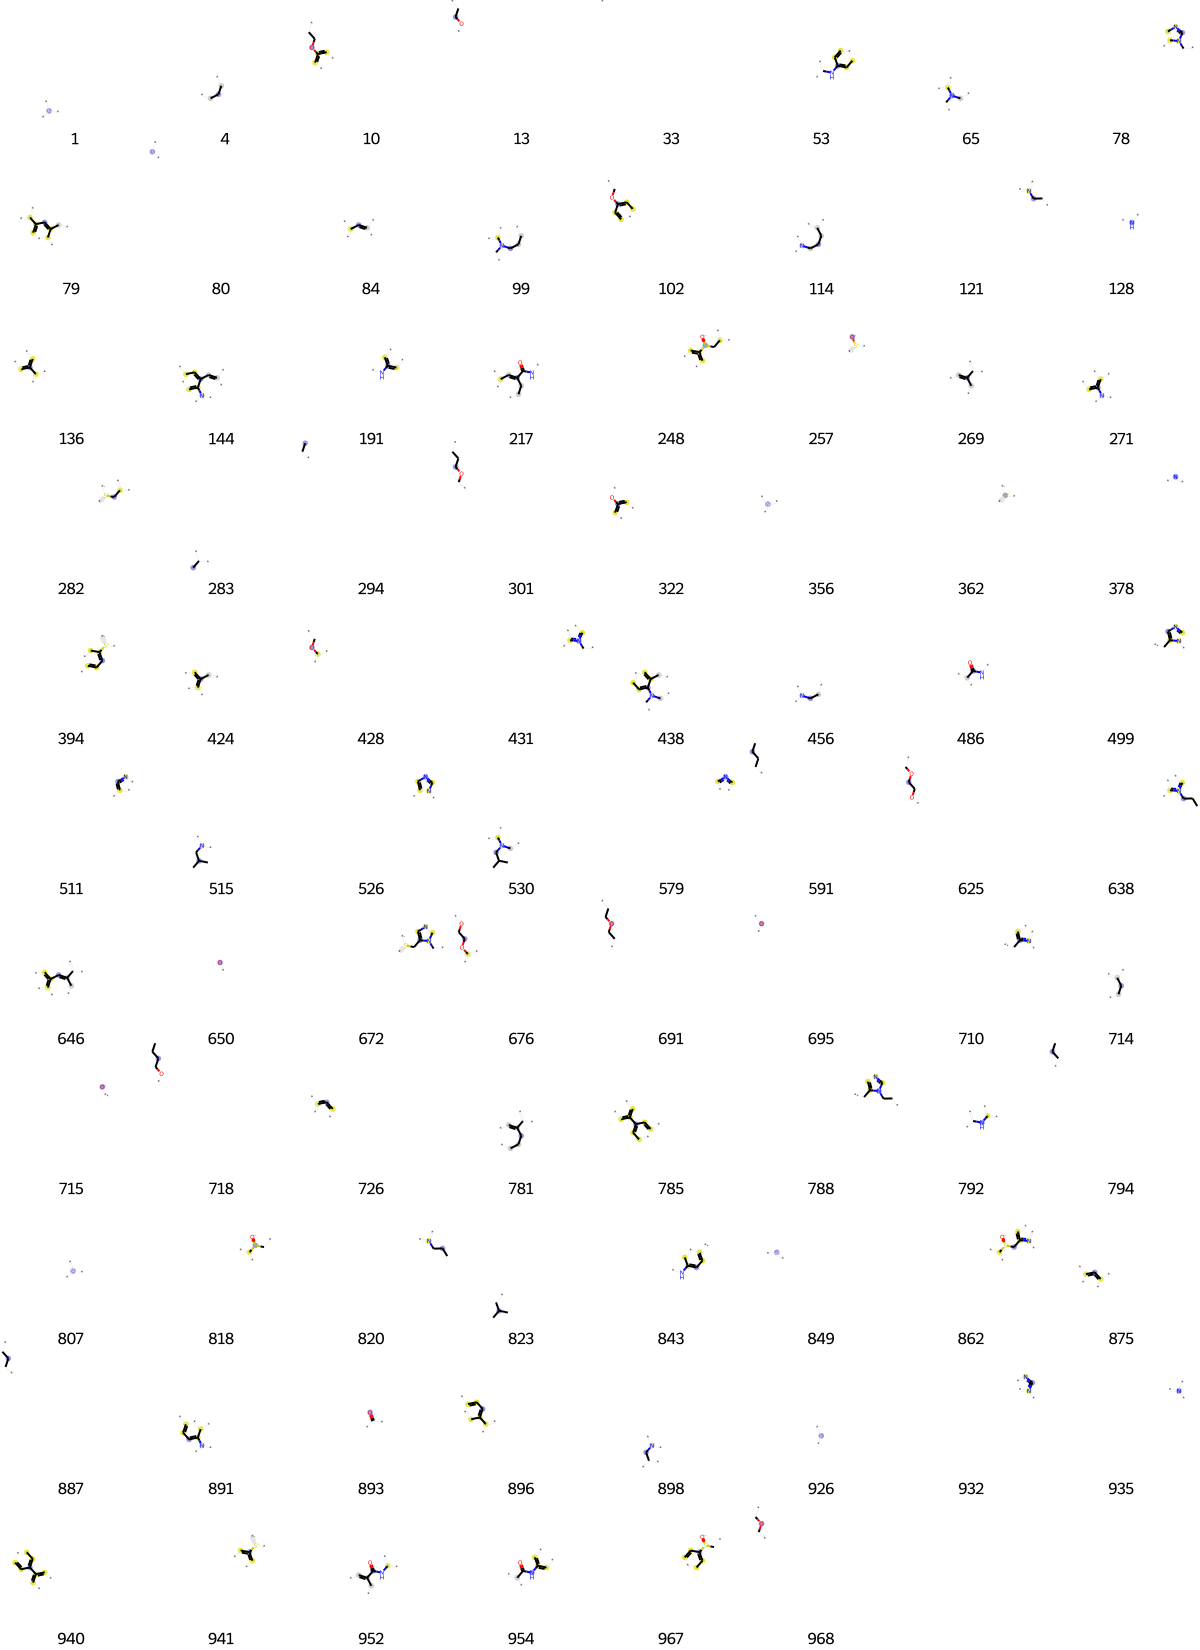

In [559]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [560]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[33,
 64,
 73,
 74,
 80,
 85,
 90,
 136,
 140,
 175,
 186,
 219,
 222,
 293,
 294,
 310,
 318,
 335,
 339,
 352,
 356,
 359,
 378,
 510,
 561,
 585,
 591,
 643,
 659,
 726,
 730,
 741,
 752,
 794,
 802,
 807,
 818,
 821,
 831,
 837,
 841,
 849,
 868,
 873,
 887,
 896,
 922,
 929,
 935,
 961,
 975,
 984]

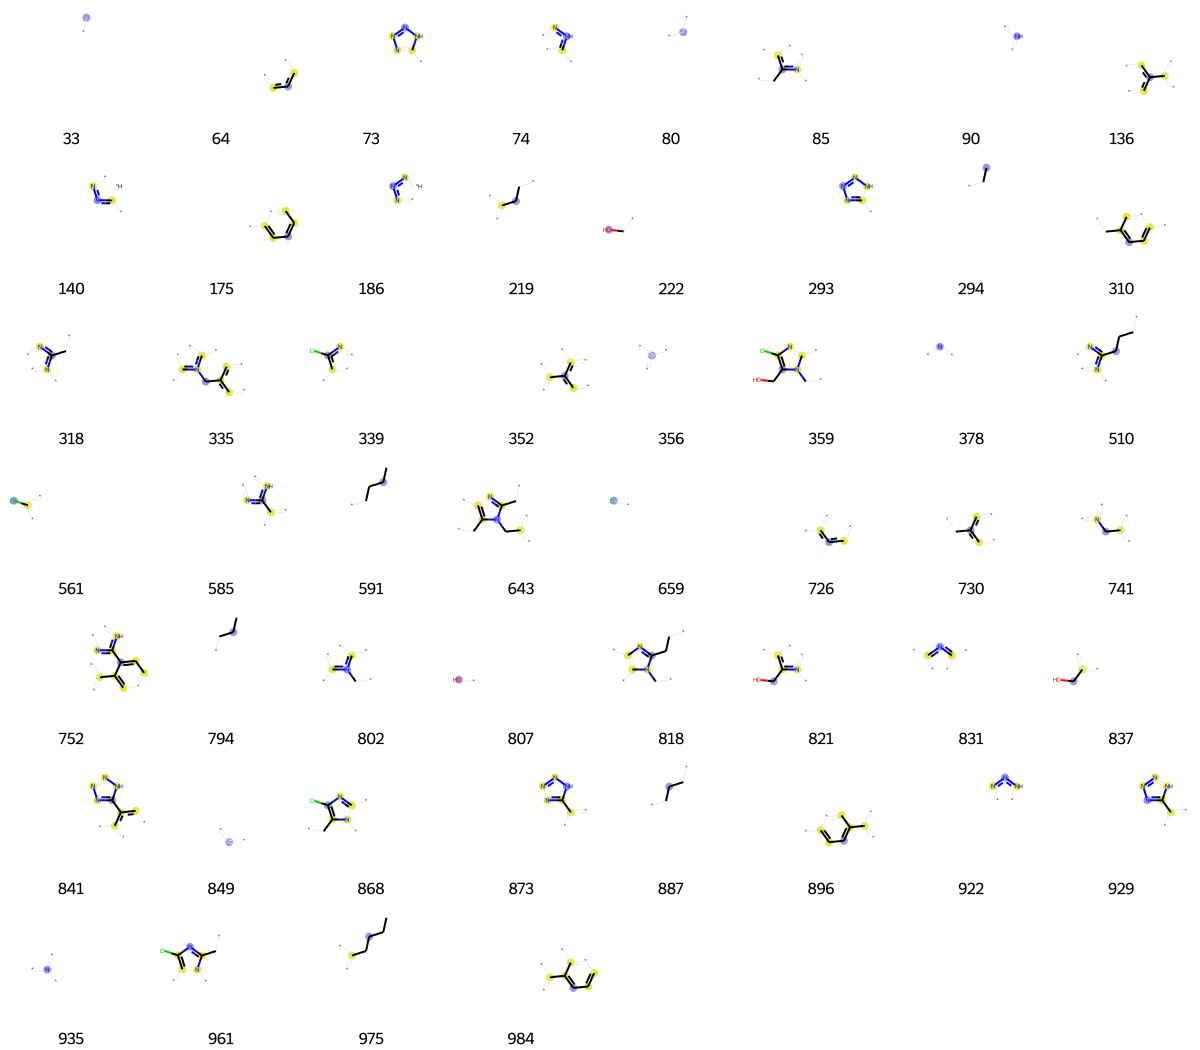

In [561]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])